# Assessment 3: Data cleansing

#### Student Name: Jiawei Su
#### Student ID: 29590183
#### Student Name: Weiwei Jin
#### Student ID: 28106946
Date: 7/10/2019

Version: 1.0

Environment: Python 3.7.1 and Jupyter notebook

Libraries used:

* pandas (for dataframe, included in Anaconda Python 3.6.5)
* re (for regular expression, included in Anaconda Python 3.6.5)
* numpy(for data array, included in Anaconda Python 3.6.5)
* datatime(for datatime object, included in Anaconda Python 3.6.5)
* math(for math functions, included in Anaconda Python 3.6.5)
* matplotlib(for visualization, included in Anaconda Python 3.6.5)



## 1. Introduction
In this assessment, the dataset anomalies have been found with EDA and other data cleaning methods. The dataset is about food delivery information coming from the three branches of the restaurant , the restaurants located around Melbourne CBD and has the same menu in three different meals in a day. All the variables are shown below.

* <font color="blue">order_id</font> : A unique id for the delivery
* <font color="blue">date</font> : Date of the departure
* <font color="blue">time</font> : Time of the order
* <font color="blue">order_items</font> : A categorical attribute for the items of delivery
* <font color="blue">order_types</font> : A categorical attribute for the type of meal
* <font color="blue">branch_code</font> : A categorical attribute for the branch code
* <font color="blue">order_price</font> : Total price of the order items
* <font color="blue">customer_lat</font> : Latitude of the destination
* <font color="blue">customer_lon</font> : Longitude of the destination
* <font color="blue">distance_to_customer_KM</font>	: Distance from the branches to customer
* <font color="blue">delivery_fee</font> : The payments of the order
* <font color="blue">customerHasloyalty?</font>	: customer ordered more than onece
* <font color="blue">delivery fee</font> : The price of the delivery

## 2. Import Libraries


In [3]:
import pandas as pd
import numpy as np
import re
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

## 3.Dirty data cleansing
In this section, the given dataset will be check and fix by using EDA and other data cleansing techinical.
### 3.1 Check the information of dataset

In [449]:
#check the basic informatiion of the first 50 lines of dataset
dirtyfile = pd.read_csv('Group067_dirty_data.csv') 
print(dirtyfile.shape)
dirtyfile.head(50)


(500, 12)


order_id        date      time order_type branch_code  \
0   ORDC05335  2018-17-12  19:39:43     Dinner          NS   
1   ORDK09269  2018-01-29  08:50:42  Breakfast          TP   
2   ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3   ORDK03843  2018-02-11  09:21:07  Breakfast          bk   
4   ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5   ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6   ORDC01761  12-11-2018  18:28:43     Dinner          NS   
7   ORDI02419  03-05-2018  12:03:22      Lunch          NS   
8   ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9   ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10  ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11  ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12  ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13  ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14  ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15  ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16  ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17  ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18  ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19  ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20  ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21  ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22  ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23  ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24  ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25  ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26  ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27  ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28  ORDB04902  11-04-2018  11:12:40  Breakfast          TP   
29  ORDJ03824  2018-03-08  10:11:49  Breakfast          ns   
30  ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31  ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32  ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33  ORDX06402  2018-15-02  09:21:07  Breakfast          BK   
34  ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35  ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36  ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37  ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38  ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39  ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40  ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41  ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42  ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43  ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44  ORDZ09616  2018-06-08  13:14:21  Breakfast          NS   
45  ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46  ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47  ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48  ORDX06934  2018-21-06  13:34:38      Lunch          BK   
49  ORDX08919  09-01-2018  08:10:08  Breakfast          BK   

                                          order_items  order_price  \
0   [('Salmon', 3), ('Shrimp', 9), ('Fish&Chips', 5)]       784.00   
1        [('Pancake', 9), ('Eggs', 9), ('Coffee', 2)]       431.25   
2   [('Pancake', 8), ('Cereal', 8), ('Coffee', 10)...       481.00   
3                       [('Eggs', 3), ('Coffee', 10)]       141.00   
4                      [('Salad', 1), ('Burger', 10)]       584.75   
5   [('Burger', 10), ('Salad', 2), ('Chicken', 8),...       612.40   
6   [('Shrimp', 6), ('Salmon', 7), ('Pasta', 1), (...       988.50   
7   [('Steak', 2), ('Chicken', 2), ('Burger', 6), ...       602.80   
8   [('Fish&Chips', 10), ('Salmon', 6), ('Shrimp',...      1164.50   
9   [('Pasta', 5), ('Shrimp', 6), ('Salmon', 7), (...       958.50   
10                     [('Pasta', 10), ('Salmon', 7)]       380.00   
11

In [450]:
#check the basic information of the dataset include the datatype and the numbers of columns
dirtyfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [451]:
dirtyfile.describe()

order_price  customer_lat  customer_lon  customerHasloyalty?  \
count     500.0000    500.000000    500.000000            500.00000   
mean      497.8226    -30.753941    143.506772              0.11400   
std       258.8346     25.337222     16.300007              0.31813   
min        53.2000    -37.829895    -37.829931              0.00000   
25%       294.9375    -37.818534    144.953512              0.00000   
50%       462.2500    -37.811749    144.965708              0.00000   
75%       670.4250    -37.804518    144.983293              0.00000   
max      1411.5000    145.001782    145.018623              1.00000   

       distance_to_customer_KM  delivery_fee  
count               500.000000    500.000000  
mean                  8.636084     13.814236  
std                   1.734470      2.418778  
min                   3.485000      4.465905  
25%                   7.685750     12.522850  
50%                   8.609000     14.041530  
75%                   9.771250     15.356119  
max                  13.675000     19.607682

In [452]:
dirtyfile.describe(include=['O'])

order_id        date      time order_type branch_code  \
count         500         500       500        500         500   
unique        500         290        72          3           6   
top     ORDJ04430  2018-06-25  13:14:21      Lunch          NS   
freq            1           5        15        171         162   

                            order_items  
count                               500  
unique                              496  
top     [('Coffee', 9), ('Pancake', 9)]  
freq                                  3

Through the info() and describe() function,we can get a deeply understand of the dataset.The dataset has 12columns and 500rows data. 

* Categorical variables:

    order_id, order_type, branch_code

* Numerical variables:
    Discrete: order_items,customer_lat, customer_lon, distance_to_customer_KM, customerHasloyalty?, delivery fee
    
    Time-based: data,time

we also can through the describe found the object's frequency ,top numbers and unique numbers

### 3.2 Identify and fix anomalies
#### 3.2.1 Check the duplicated and misspelling error

In [453]:
#check the duplicated values, it shows no duplicated values in the database
dirtyfile.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     Fal

In [454]:
#check the misspelling for branch_code
dirtyfile.branch_code.value_counts()

NS    162
TP    155
BK    152
ns     14
bk     11
tp      6
Name: branch_code, dtype: int64

In [455]:
#fix the spelling error and check again
dirtyfile.branch_code.replace({'ns':'NS', 'bk':'BK', 'tp':'TP'},inplace=True)
dirtyfile.branch_code.value_counts()

NS    176
BK    163
TP    161
Name: branch_code, dtype: int64

In [456]:
#check the order_type spelling 
dirtyfile.order_type.value_counts()

Lunch        171
Breakfast    166
Dinner       163
Name: order_type, dtype: int64

In [457]:
#check if the database has null data
dirtyfile.isnull().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

#### 3.2.2 date
The values of date should in the same format with right values. To achieve this goal, First, assume there are wrong values in this column, find them by following methods.

In [458]:
#how many data in the wrong date type
pd.to_datetime(dirtyfile["date"], infer_datetime_format=True,errors="coerce").isnull().sum()

23

In [459]:
#found the wrong datas in the wrong date format and find some glue for next step
dirtyfile.loc[pd.to_datetime(dirtyfile["date"], infer_datetime_format=True, errors="coerce").isnull(), "date"].unique()

array(['2018-17-12', '2018-15-02', '2018-21-06', '2018-30-09',
       '2018-17-10', '2018-31-08', '2018-25-01', '2018-31-07',
       '2018-16-01', '2018-29-11', '2018-25-08', '2018-15-06',
       '2018-30-01', '2018-25-10', '2018-20-08', '2018-27-07',
       '2018-20-10', '2018-18-06', '2018-22-04', '2018-20-07',
       '2018-20-05', '2018-16-05', '2018-14-05'], dtype=object)

We got the 23 wrong data wich in the wrong date formate:year-day-month.Next step, will try to fix the problem to the correct date formate:
year-month-day.

The next step will be: 
1. split the year,month day in the date data.
2. check the unique value of years,month and date.
3. check the wrong value and classification the wrong data
4. put the wrong position data back to the correct position of the date
5. check and change the original values in the csv files.

In [460]:
#seplit the year,month,day in the date column 
temp_date = dirtyfile["date"].apply(lambda s: pd.Series({'Year': s.split("-")[0].strip(),
                            'Month':s.split("-")[1].strip(), 'Day':s.split("-")[2].strip()}))

In [461]:
#check the year values
temp_date.Year.unique()

array(['2018', '12', '03', '11', '09', '05', '02', '07', '08', '06', '10'],
      dtype=object)

In [462]:
temp_date.Month.unique()

array(['17', '01', '04', '02', '07', '06', '11', '05', '12', '10', '09',
       '08', '03', '15', '21', '30', '31', '25', '16', '29', '20', '27',
       '18', '22', '14'], dtype=object)

In [463]:
temp_date.Day.unique()

array(['12', '29', '15', '11', '21', '2018', '24', '19', '07', '22', '10',
       '03', '17', '08', '13', '23', '09', '01', '02', '26', '30', '06',
       '27', '14', '28', '20', '18', '16', '31', '05', '25', '04'],
      dtype=object)

In [464]:
# analyse the month value and creat the invalid list
invalid_month = [i for i in temp_date.Month.unique() if int(i) > 12]
invalid_month

['17', '15', '21', '30', '31', '25', '16', '29', '20', '27', '18', '22', '14']

In [465]:
temp_date.loc[temp_date.Month.isin(invalid_month), ["Month", "Day"]]

Month Day
0      17  12
33     15  02
48     21  06
77     30  09
97     17  10
103    31  08
111    25  01
134    31  07
155    16  01
161    29  11
188    25  08
192    15  06
288    30  01
304    25  10
349    20  08
365    27  07
371    20  10
372    18  06
399    22  04
401    20  07
402    20  05
404    16  05
450    14  05

In [466]:
#change the month and day position to get the correct date formate
temp_date.loc[temp_date.Month.isin(invalid_month),["Month", "Day"]] = temp_date.loc[temp_date.Month.isin(invalid_month), ["Day", "Month"]].values

In [467]:
temp_date

Year Month   Day
0    2018    12    17
1    2018    01    29
2    2018    04    15
3    2018    02    11
4    2018    07    21
5    2018    06    12
6      12    11  2018
7      03    05  2018
8    2018    12    24
9    2018    10    19
10   2018    10    07
11   2018    01    11
12   2018    09    07
13   2018    06    22
14   2018    06    22
15   2018    02    10
16   2018    07    03
17   2018    09    17
18   2018    05    08
19   2018    08    13
20   2018    05    23
21   2018    04    19
22   2018    12    03
23   2018    12    09
24   2018    05    12
25   2018    07    10
26   2018    05    03
27   2018    04    01
28     11    04  2018
29   2018    03    08
30   2018    01    11
31   2018    12    24
32   2018    06    10
33   2018    02    15
34   2018    08    15
35   2018    02    09
36   2018    07    26
37   2018    12    30
38   2018    10    29
39   2018    11    06
40   2018    01    27
41   2018    02    01
42   2018    11    02
43   2018    04    14
44   2018    06    08
45   2018    04    28
46   2018    06    17
47   2018    10    20
48   2018    06    21
49     09    01  2018
50   2018    05    06
51   2018    11    21
52   2018    01    29
53   2018    08    18
54   2018    07    26
55   2018    07    16
56   2018    11    16
57   2018    01    17
58   2018    09    13
59   2018    09    08
60   2018    08    31
61   2018    01    29
62   2018    12    23
63   2018    09    16
64     05    04  2018
65   2018    07    28
66   2018    04    15
67   2018    08    05
68   2018    10    12
69   2018    02    25
70   2018    01    31
71   2018    11    01
72   2018    04    20
73   2018    04    11
74   2018    12    23
75   2018    07    10
76   2018    03    12
77   2018    09    30
78   2018    08    03
79   2018    05    14
80   2018    05    18
81   2018    01    11
82   2018    08    14
83   2018    08    10
84     02    01  2018
85   2018    04    21
86   2018    05    28
87   2018    03    12
88   2018    11    29
89   2018    09    07
90   2018    12    15
91   2018    05    01
92   2018    06    07
93   2018    06    11
94   2018    03    04
95   2018    10    25
96   2018    07    13
97   2018    10    17
98   2018    04    27
99   2018    03    14
100  2018    12    12
101  2018    10    18
102  2018    07    24
103  2018    08    31
104  2018    07    22
105  2018    07    24
106  2018    09    03
107  2018    11    15
108  2018    03    21
109  2018    10    04
110  2018    12    29
111  2018    01    25
112  2018    03    27
113  2018    04    03
114  2018    01    27
115  2018    07    19
116  2018    03    14
117  2018    03    23
118  2018    03    24
119  2018    03    11
120  2018    07    29
121  2018    06    06
122  2018    09    11
123  2018    04    13
124  2018    07    24
125  2018    08    31
126  2018    06    16
127  2018    07    27
128  2018    04    06
129  2018    08    04
130  2018    12    07
131  2018    01    27
132  2018    09    13
133  2018    08    07
134  2018    07    31
135  2018    06    01
136  2018    02    07
137  2018    10    25
138  2018    07    23
139  2018    04    23
140  2018    03    04
141  2018    06    09
142  2018    12    05
143  2018    01    16
144  2018    07    07
145  2018    08    05
146  2018    03    13
147  2018    05    06
148  2018    09    18
149  2018    09    27
150  2018    07    17
151  2018    07    04
152  2018    03    13
153  2018    04    28
154  2018    09    25
155  2018    01    16
156  2018    07    31
157  2018    12    27
158  2018    05    27
159  2018    11    30
160  2018    10    29
161  2018    11    29
162  2018    07    07
163  2018    08    01
164  2018    09    20
165  2018    03    16
166  2018    02    14
167  2018    03    03
168  2018    12    12
169  2018    02    15
170  2018    10    05
171  2018    07    12
172  2018    01    18
173  2018    03    23
174  2018    04    02
175  2018    11    16
176  2018    02    11
177  2018    02    21
178  2018    10    03
179  2018    05    06
180  2018    02    04
1

In [468]:
#check the invalid year and do the samething as last step 
invalid_year = [i for i in temp_date.Year.unique() if int(i) !=2018]
invalid_year

['12', '03', '11', '09', '05', '02', '07', '08', '06', '10']

In [469]:
temp_date.loc[temp_date.Year.isin(invalid_year), ["Year", "Day"]] 

Year   Day
6     12  2018
7     03  2018
28    11  2018
49    09  2018
64    05  2018
84    02  2018
194   07  2018
262   08  2018
302   12  2018
335   06  2018
340   02  2018
391   09  2018
432   10  2018
467   08  2018

In [470]:
temp_date.loc[temp_date.Year.isin(invalid_year),["Year", "Day"]] = temp_date.loc[temp_date.Year.isin(invalid_year), ["Day", "Year"]].values

In [471]:
temp_date

Year Month Day
0    2018    12  17
1    2018    01  29
2    2018    04  15
3    2018    02  11
4    2018    07  21
5    2018    06  12
6    2018    11  12
7    2018    05  03
8    2018    12  24
9    2018    10  19
10   2018    10  07
11   2018    01  11
12   2018    09  07
13   2018    06  22
14   2018    06  22
15   2018    02  10
16   2018    07  03
17   2018    09  17
18   2018    05  08
19   2018    08  13
20   2018    05  23
21   2018    04  19
22   2018    12  03
23   2018    12  09
24   2018    05  12
25   2018    07  10
26   2018    05  03
27   2018    04  01
28   2018    04  11
29   2018    03  08
30   2018    01  11
31   2018    12  24
32   2018    06  10
33   2018    02  15
34   2018    08  15
35   2018    02  09
36   2018    07  26
37   2018    12  30
38   2018    10  29
39   2018    11  06
40   2018    01  27
41   2018    02  01
42   2018    11  02
43   2018    04  14
44   2018    06  08
45   2018    04  28
46   2018    06  17
47   2018    10  20
48   2018    06  21
49   2018    01  09
50   2018    05  06
51   2018    11  21
52   2018    01  29
53   2018    08  18
54   2018    07  26
55   2018    07  16
56   2018    11  16
57   2018    01  17
58   2018    09  13
59   2018    09  08
60   2018    08  31
61   2018    01  29
62   2018    12  23
63   2018    09  16
64   2018    04  05
65   2018    07  28
66   2018    04  15
67   2018    08  05
68   2018    10  12
69   2018    02  25
70   2018    01  31
71   2018    11  01
72   2018    04  20
73   2018    04  11
74   2018    12  23
75   2018    07  10
76   2018    03  12
77   2018    09  30
78   2018    08  03
79   2018    05  14
80   2018    05  18
81   2018    01  11
82   2018    08  14
83   2018    08  10
84   2018    01  02
85   2018    04  21
86   2018    05  28
87   2018    03  12
88   2018    11  29
89   2018    09  07
90   2018    12  15
91   2018    05  01
92   2018    06  07
93   2018    06  11
94   2018    03  04
95   2018    10  25
96   2018    07  13
97   2018    10  17
98   2018    04  27
99   2018    03  14
100  2018    12  12
101  2018    10  18
102  2018    07  24
103  2018    08  31
104  2018    07  22
105  2018    07  24
106  2018    09  03
107  2018    11  15
108  2018    03  21
109  2018    10  04
110  2018    12  29
111  2018    01  25
112  2018    03  27
113  2018    04  03
114  2018    01  27
115  2018    07  19
116  2018    03  14
117  2018    03  23
118  2018    03  24
119  2018    03  11
120  2018    07  29
121  2018    06  06
122  2018    09  11
123  2018    04  13
124  2018    07  24
125  2018    08  31
126  2018    06  16
127  2018    07  27
128  2018    04  06
129  2018    08  04
130  2018    12  07
131  2018    01  27
132  2018    09  13
133  2018    08  07
134  2018    07  31
135  2018    06  01
136  2018    02  07
137  2018    10  25
138  2018    07  23
139  2018    04  23
140  2018    03  04
141  2018    06  09
142  2018    12  05
143  2018    01  16
144  2018    07  07
145  2018    08  05
146  2018    03  13
147  2018    05  06
148  2018    09  18
149  2018    09  27
150  2018    07  17
151  2018    07  04
152  2018    03  13
153  2018    04  28
154  2018    09  25
155  2018    01  16
156  2018    07  31
157  2018    12  27
158  2018    05  27
159  2018    11  30
160  2018    10  29
161  2018    11  29
162  2018    07  07
163  2018    08  01
164  2018    09  20
165  2018    03  16
166  2018    02  14
167  2018    03  03
168  2018    12  12
169  2018    02  15
170  2018    10  05
171  2018    07  12
172  2018    01  18
173  2018    03  23
174  2018    04  02
175  2018    11  16
176  2018    02  11
177  2018    02  21
178  2018    10  03
179  2018    05  06
180  2018    02  04
181  2018    11  11
182  2018    01  01
183  2018    08  25
184  2018    03  29
185  2018    11  18
186  2018    05  19
187  2018    09  17
188  2018    08  25
189  2018    11  20
190  2018    02  17
191  2018    03  03
192  2018    06  15
193  2018    06  10
194  2018    06  07
195  2018    05  24
196  2018    07  04
197  2018    01  03
198  2018    02  28
199  

In [472]:
#put all the correct format data back as year-month-day
temp_date["Date"] = temp_date["Year"] +'-' + temp_date["Month"] +'-'+ temp_date["Day"]

In [473]:
temp_date['Date']

0      2018-12-17
1      2018-01-29
2      2018-04-15
3      2018-02-11
4      2018-07-21
5      2018-06-12
6      2018-11-12
7      2018-05-03
8      2018-12-24
9      2018-10-19
10     2018-10-07
11     2018-01-11
12     2018-09-07
13     2018-06-22
14     2018-06-22
15     2018-02-10
16     2018-07-03
17     2018-09-17
18     2018-05-08
19     2018-08-13
20     2018-05-23
21     2018-04-19
22     2018-12-03
23     2018-12-09
24     2018-05-12
25     2018-07-10
26     2018-05-03
27     2018-04-01
28     2018-04-11
29     2018-03-08
30     2018-01-11
31     2018-12-24
32     2018-06-10
33     2018-02-15
34     2018-08-15
35     2018-02-09
36     2018-07-26
37     2018-12-30
38     2018-10-29
39     2018-11-06
40     2018-01-27
41     2018-02-01
42     2018-11-02
43     2018-04-14
44     2018-06-08
45     2018-04-28
46     2018-06-17
47     2018-10-20
48     2018-06-21
49     2018-01-09
50     2018-05-06
51     2018-11-21
52     2018-01-29
53     2018-08-18
54     2018-07-26
55     201

In [474]:
dirtyfile['date']=temp_date['Date']

#### 3.2.3 branch_code
branch_code has two type of errors, one is the spelling error, which already fix in the prevous section. The other one is the order_id with the wrong branch_code. Because of the order_id is unique for each branch_code, we can through the irder_id to fix the problem.
The step will be:
1. found the rule between order_id and branch_code.
2. pick up the wrong branch_code rows with order_id.
3. change the branch_code. 

In [475]:
#pick up the rows with NS and analysis the order_id
branch = dirtyfile[['order_id','branch_code']] 
branch_ns =branch.loc[branch.branch_code=='NS',['order_id','branch_code']]
branch_ns

order_id branch_code
0    ORDC05335          NS
6    ORDC01761          NS
7    ORDI02419          NS
9    ORDZ09364          NS
13   ORDC07501          NS
14   ORDI03152          NS
17   ORDC01992          NS
20   ORDC09401          NS
22   ORDI06905          NS
23   ORDZ10945          NS
24   ORDZ04772          NS
26   ORDC04719          NS
29   ORDJ03824          NS
37   ORDC02304          NS
40   ORDC08355          NS
42   ORDC05142          NS
44   ORDZ09616          NS
52   ORDZ01852          NS
54   ORDI08238          NS
58   ORDZ04217          NS
61   ORDC03796          NS
62   ORDI04519          NS
67   ORDI09324          NS
68   ORDC07033          NS
69   ORDI05160          NS
71   ORDZ04918          NS
73   ORDA09762          NS
76   ORDI10508          NS
78   ORDI10004          NS
83   ORDC02477          NS
84   ORDI05625          NS
92   ORDI08945          NS
94   ORDC02208          NS
95   ORDZ03545          NS
97   ORDI04070          NS
98   ORDI03240          NS
102  ORDI03313          NS
104  ORDI10380          NS
107  ORDC10534          NS
110  ORDZ02629          NS
114  ORDI02312          NS
116  ORDC04084          NS
117  ORDJ09384          NS
119  ORDI06359          NS
125  ORDZ07732          NS
129  ORDZ08988          NS
133  ORDZ02043          NS
137  ORDZ03939          NS
138  ORDC08181          NS
142  ORDI10998          NS
143  ORDX04016          NS
149  ORDZ09675          NS
150  ORDZ00873          NS
152  ORDC09231          NS
153  ORDI04902          NS
156  ORDI00871          NS
157  ORDC05815          NS
159  ORDC07412          NS
160  ORDI05575          NS
161  ORDC09391          NS
164  ORDI04555          NS
167  ORDC02778          NS
174  ORDI08657          NS
177  ORDC09082          NS
178  ORDI10683          NS
179  ORDC07380          NS
184  ORDZ03897          NS
185  ORDC05135          NS
188  ORDC03055          NS
191  ORDZ01660          NS
193  ORDI08280          NS
197  ORDZ06390          NS
201  ORDZ03873          NS
202  ORDI08403          NS
204  ORDZ05417          NS
209  ORDI06040          NS
218  ORDC07229          NS
219  ORDC00601          NS
221  ORDI02186          NS
227  ORDI03093          NS
228  ORDZ10875          NS
229  ORDI06317          NS
230  ORDI04144          NS
232  ORDZ09984          NS
240  ORDZ05903          NS
242  ORDI02382          NS
243  ORDC00079          NS
244  ORDC03071          NS
251  ORDI02776          NS
252  ORDX02393          NS
262  ORDI03264          NS
264  ORDI06340          NS
268  ORDC01163          NS
274  ORDI08205          NS
275  ORDC03709          NS
280  ORDC00958          NS
282  ORDI02750          NS
284  ORDI01139          NS
285  ORDZ05274          NS
286  ORDI06776          NS
287  ORDI09350          NS
288  ORDI03149          NS
289  ORDC04340          NS
292  ORDC01961          NS
297  ORDZ06711          NS
298  ORDZ00456          NS
300  ORDC08134          NS
302  ORDI05769          NS
305  ORDZ03579          NS
309  ORDC00960          NS
312  ORDZ10926          NS
318  ORDI08837          NS
320  ORDC03057          NS
321  ORDC05354          NS
322  ORDZ05050          NS
323  ORDZ01394          NS
328  ORDI01565          NS
333  ORDI10789          NS
334  ORDX03889          NS
336  ORDI07975          NS
341  ORDZ09495          NS
344  ORDI03486          NS
346  ORDZ09104          NS
349  ORDZ02194          NS
352  ORDI06950          NS
353  ORDI00560          NS
356  ORDC01570          NS
357  ORDI03340          NS
358  ORDC07756          NS
360  ORDZ00990          NS
361  ORDI07850          NS
362  ORDC05893          NS
364  ORDI05429          NS
367  ORDI02035          NS
369  ORDC00682          NS
372  ORDI07250          NS
376  ORDZ04045          NS
377  ORDC07497          NS
378  ORDC04419          NS
379  ORDC03723          NS
380  ORDC04404          NS
385  ORDC01298          NS
389  ORDK00372          NS
391  ORDC07622          NS
394  ORDZ10807          NS
398  ORDI07759          NS
401  ORDI01705          NS
409  ORDI0

In [476]:
#analysis the differences in the order_id
pd.options.display.max_rows = None
branch_ns['order_id']

0      ORDC05335
6      ORDC01761
7      ORDI02419
9      ORDZ09364
13     ORDC07501
14     ORDI03152
17     ORDC01992
20     ORDC09401
22     ORDI06905
23     ORDZ10945
24     ORDZ04772
26     ORDC04719
29     ORDJ03824
37     ORDC02304
40     ORDC08355
42     ORDC05142
44     ORDZ09616
52     ORDZ01852
54     ORDI08238
58     ORDZ04217
61     ORDC03796
62     ORDI04519
67     ORDI09324
68     ORDC07033
69     ORDI05160
71     ORDZ04918
73     ORDA09762
76     ORDI10508
78     ORDI10004
83     ORDC02477
84     ORDI05625
92     ORDI08945
94     ORDC02208
95     ORDZ03545
97     ORDI04070
98     ORDI03240
102    ORDI03313
104    ORDI10380
107    ORDC10534
110    ORDZ02629
114    ORDI02312
116    ORDC04084
117    ORDJ09384
119    ORDI06359
125    ORDZ07732
129    ORDZ08988
133    ORDZ02043
137    ORDZ03939
138    ORDC08181
142    ORDI10998
143    ORDX04016
149    ORDZ09675
150    ORDZ00873
152    ORDC09231
153    ORDI04902
156    ORDI00871
157    ORDC05815
159    ORDC07412
160    ORDI055

In [477]:
# use the  regular expression to found the wrong branch_code and show the order_id
patten_branch =re.compile(r'(ORDJ\w{5})')
branch_list1=patten_branch.findall(str(branch_ns['order_id']))
branch_list1

['ORDJ03824', 'ORDJ09384']

In [478]:
# pick out the wrong rows with the index
branch_ns.loc[branch.order_id.isin(branch_list1),['order_id','branch_code']]

order_id branch_code
29   ORDJ03824          NS
117  ORDJ09384          NS

In [479]:
patten_branch =re.compile(r'(ORDA\w{5})')
branch_list2=patten_branch.findall(str(branch_ns['order_id']))
branch_list2

['ORDA09762']

In [480]:
branch_ns.loc[branch.order_id.isin(branch_list2),['order_id','branch_code']]

order_id branch_code
73  ORDA09762          NS

In [481]:
patten_branch =re.compile(r'(ORDK\w{5})')
branch_list2=patten_branch.findall(str(branch_ns['order_id']))
branch_list2

['ORDK00372']

In [482]:
patten_branch =re.compile(r'(ORDX\w{5})')
branch_list3=patten_branch.findall(str(branch_ns['order_id']))
branch_list3

['ORDX04016', 'ORDX02393', 'ORDX03889']

In [495]:
branch_ns.loc[branch.order_id.isin(branch_list2)|branch.order_id.isin(branch_list3),['order_id','branch_code']]

order_id branch_code
143  ORDX04016          NS
252  ORDX02393          NS
334  ORDX03889          NS
389  ORDK00372          NS

In [496]:
#change to the correct branch_code with index
dirtyfile.loc[29,'branch_code'] ='TP'
dirtyfile.loc[117,'branch_code'] ='TP'
dirtyfile.loc[73,'branch_code'] ='BK'
dirtyfile.loc[143,'branch_code'] ='BK'
dirtyfile.loc[252,'branch_code'] ='BK'
dirtyfile.loc[334,'branch_code'] ='BK'
dirtyfile.loc[389,'branch_code'] ='BK'

dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          TP   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21  Breakfast          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          TP   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21     Dinner          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02  Breakfast          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42      Lunch          NS   
62   ORDI04519  2018-12-23  19:49:51 

In [497]:
branch_tp=branch.loc[branch.branch_code=='TP',['order_id','branch_code']]
branch_tp

order_id branch_code
1    ORDK09269          TP
8    ORDB07845          TP
10   ORDY07104          TP
11   ORDY00570          TP
19   ORDB09623          TP
28   ORDB04902          TP
30   ORDJ05278          TP
31   ORDB10078          TP
32   ORDJ10193          TP
35   ORDJ04559          TP
38   ORDJ05518          TP
39   ORDJ06131          TP
41   ORDB05832          TP
47   ORDB06804          TP
50   ORDB10873          TP
51   ORDB01949          TP
53   ORDX05633          TP
56   ORDY10332          TP
57   ORDB03661          TP
59   ORDY01110          TP
60   ORDB07075          TP
64   ORDJ06882          TP
65   ORDB07910          TP
66   ORDJ04792          TP
72   ORDJ05936          TP
74   ORDB07648          TP
75   ORDB08711          TP
77   ORDB06844          TP
79   ORDB09867          TP
80   ORDJ01901          TP
85   ORDJ08459          TP
86   ORDY10960          TP
87   ORDY00644          TP
88   ORDJ00412          TP
89   ORDB04147          TP
90   ORDJ03796          TP
91   ORDY06457          TP
96   ORDY01371          TP
100  ORDB05423          TP
101  ORDY10209          TP
105  ORDY08793          TP
111  ORDB07736          TP
112  ORDY10150          TP
113  ORDY00285          TP
118  ORDY07118          TP
120  ORDJ01822          TP
121  ORDY06003          TP
126  ORDY08667          TP
128  ORDB10493          TP
131  ORDY09927          TP
132  ORDY02308          TP
135  ORDJ03632          TP
136  ORDB03837          TP
139  ORDY07952          TP
140  ORDB00565          TP
144  ORDJ02294          TP
146  ORDJ09592          TP
148  ORDY03892          TP
158  ORDJ06987          TP
165  ORDJ09111          TP
171  ORDJ04430          TP
176  ORDB08389          TP
181  ORDY09664          TP
186  ORDB08244          TP
189  ORDB03830          TP
190  ORDY04801          TP
192  ORDJ05012          TP
207  ORDJ09295          TP
208  ORDI06154          TP
211  ORDY08077          TP
212  ORDJ01525          TP
213  ORDB00679          TP
215  ORDB05900          TP
216  ORDB05450          TP
217  ORDB03665          TP
222  ORDY02448          TP
223  ORDJ07997          TP
231  ORDB09654          TP
233  ORDJ07241          TP
236  ORDA09533          TP
237  ORDB08467          TP
239  ORDY01605          TP
245  ORDJ02309          TP
246  ORDY02154          TP
247  ORDJ06087          TP
250  ORDJ08260          TP
253  ORDB04859          TP
258  ORDB01426          TP
259  ORDJ05773          TP
263  ORDB04415          TP
266  ORDB05815          TP
281  ORDY00930          TP
294  ORDB05568          TP
295  ORDB05076          TP
296  ORDY08865          TP
299  ORDY02255          TP
301  ORDY06783          TP
306  ORDJ07471          TP
307  ORDJ03988          TP
311  ORDB09408          TP
314  ORDY02081          TP
315  ORDB00512          TP
319  ORDY08070          TP
324  ORDB04398          TP
326  ORDB09096          TP
327  ORDB01702          TP
329  ORDB07589          TP
330  ORDB00133          TP
332  ORDB11009          TP
339  ORDJ07177          TP
340  ORDY08202          TP
342  ORDJ05997          TP
345  ORDB02147          TP
348  ORDB01072          TP
350  ORDJ02140          TP
351  ORDB01530          TP
355  ORDJ09635          TP
370  ORDJ01734          TP
371  ORDJ10390          TP
375  ORDB04585          TP
381  ORDY01893          TP
382  ORDJ05564          TP
383  ORDB06427          TP
384  ORDB02031          TP
386  ORDY07570          TP
395  ORDB03909          TP
396  ORDJ01398          TP
397  ORDJ05349          TP
400  ORDB02382          TP
410  ORDY07432          TP
411  ORDJ08195          TP
412  ORDJ07929          TP
419  ORDY04373          TP
420  ORDJ05236          TP
422  ORDY08626          TP
426  ORDY03628          TP
433  ORDB09684          TP
438  ORDY05540          TP
441  ORDC01710          TP
442  ORDJ08874          TP
444  ORDY02892          TP
450  ORDB06656          TP
453  ORDB10373          TP
454  ORDB08118          TP
457  ORDJ07318          TP
459  ORDY09790          TP
460  ORDJ10926          TP
466  ORDX0

In [498]:
pd.options.display.max_rows = None
branch_tp['order_id']

1      ORDK09269
8      ORDB07845
10     ORDY07104
11     ORDY00570
19     ORDB09623
28     ORDB04902
30     ORDJ05278
31     ORDB10078
32     ORDJ10193
35     ORDJ04559
38     ORDJ05518
39     ORDJ06131
41     ORDB05832
47     ORDB06804
50     ORDB10873
51     ORDB01949
53     ORDX05633
56     ORDY10332
57     ORDB03661
59     ORDY01110
60     ORDB07075
64     ORDJ06882
65     ORDB07910
66     ORDJ04792
72     ORDJ05936
74     ORDB07648
75     ORDB08711
77     ORDB06844
79     ORDB09867
80     ORDJ01901
85     ORDJ08459
86     ORDY10960
87     ORDY00644
88     ORDJ00412
89     ORDB04147
90     ORDJ03796
91     ORDY06457
96     ORDY01371
100    ORDB05423
101    ORDY10209
105    ORDY08793
111    ORDB07736
112    ORDY10150
113    ORDY00285
118    ORDY07118
120    ORDJ01822
121    ORDY06003
126    ORDY08667
128    ORDB10493
131    ORDY09927
132    ORDY02308
135    ORDJ03632
136    ORDB03837
139    ORDY07952
140    ORDB00565
144    ORDJ02294
146    ORDJ09592
148    ORDY03892
158    ORDJ069

In [499]:
patten_branch =re.compile(r'(ORDK\w{5})')
branch_list_t=patten_branch.findall(str(branch_tp['order_id']))
branch_list_t

['ORDK09269']

In [500]:
branch_tp.loc[branch.order_id.isin(branch_list_t),['order_id','branch_code']]

order_id branch_code
1  ORDK09269          TP

In [501]:
patten_branch =re.compile(r'(ORDX\w{5})')
branch_list_t1=patten_branch.findall(str(branch_tp['order_id']))
branch_list_t1

['ORDX05633', 'ORDX02339']

In [502]:
branch_tp.loc[branch.order_id.isin(branch_list_t1),['order_id','branch_code']]

order_id branch_code
53   ORDX05633          TP
466  ORDX02339          TP

In [517]:
patten_branch =re.compile(r'(ORDA\w{5})')
branch_list_t2=patten_branch.findall(str(branch_tp['order_id']))
branch_list_t2

['ORDA09533']

In [518]:
patten_branch =re.compile(r'(ORDC\w{5})')
branch_list_t3=patten_branch.findall(str(branch_tp['order_id']))
branch_list_t3

['ORDC01710']

In [519]:
patten_branch =re.compile(r'(ORDI\w{5})')
branch_list_t4=patten_branch.findall(str(branch_tp['order_id']))
branch_list_t4

['ORDI06154']

In [522]:
branch_tp.loc[branch.order_id.isin(branch_list_t2)|branch.order_id.isin(branch_list_t3)|branch.order_id.isin(branch_list_t4),['order_id','branch_code']]

order_id branch_code
208  ORDI06154          TP
236  ORDA09533          TP
441  ORDC01710          TP

In [523]:
dirtyfile.loc[1,'branch_code'] = 'BK'
dirtyfile.loc[53,'branch_code'] = 'BK'
dirtyfile.loc[466,'branch_code'] = 'BK'
dirtyfile.loc[208,'branch_code'] = 'NS'
dirtyfile.loc[236,'branch_code'] = 'NS'
dirtyfile.loc[441,'branch_code'] = 'NS'
dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21  Breakfast          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          BK   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21     Dinner          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02  Breakfast          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42      Lunch          NS   
62   ORDI04519  2018-12-23  19:49:51 

In [400]:
branch_bk=branch.loc[branch.branch_code=='BK',['order_id','branch_code']]
branch_bk

order_id branch_code
2    ORDX01872          BK
3    ORDK03843          BK
4    ORDX09910          BK
5    ORDA03711          BK
12   ORDK05276          BK
15   ORDX00791          BK
16   ORDX07636          BK
18   ORDX08850          BK
21   ORDX08310          BK
25   ORDX08885          BK
27   ORDA02433          BK
33   ORDX06402          BK
34   ORDK00314          BK
36   ORDK06446          BK
43   ORDX04215          BK
45   ORDX00435          BK
46   ORDA05838          BK
48   ORDX06934          BK
49   ORDX08919          BK
55   ORDK10172          BK
63   ORDK05114          BK
70   ORDX06823          BK
81   ORDK03871          BK
82   ORDK01611          BK
93   ORDA06248          BK
99   ORDK02488          BK
103  ORDX02686          BK
106  ORDK07311          BK
108  ORDK03678          BK
109  ORDA04698          BK
115  ORDC00679          BK
122  ORDK10564          BK
123  ORDC07476          BK
124  ORDX10608          BK
127  ORDX09836          BK
130  ORDX00934          BK
134  ORDK02576          BK
141  ORDK03959          BK
145  ORDK03710          BK
147  ORDA09971          BK
151  ORDA07564          BK
154  ORDK09816          BK
155  ORDK10911          BK
162  ORDY02450          BK
163  ORDA08075          BK
166  ORDK03937          BK
168  ORDA03118          BK
169  ORDK06025          BK
170  ORDX05204          BK
172  ORDX03759          BK
173  ORDX03838          BK
175  ORDA08380          BK
180  ORDK03485          BK
182  ORDA03330          BK
183  ORDK11071          BK
187  ORDX02575          BK
194  ORDA03948          BK
195  ORDK05465          BK
196  ORDA04026          BK
198  ORDX06970          BK
199  ORDK01777          BK
200  ORDX09178          BK
203  ORDA00454          BK
205  ORDA06686          BK
206  ORDA00052          BK
210  ORDK10640          BK
214  ORDX04278          BK
220  ORDX03906          BK
224  ORDX10725          BK
225  ORDA05626          BK
226  ORDA02892          BK
234  ORDA10638          BK
235  ORDZ02722          BK
238  ORDA07851          BK
241  ORDX08701          BK
248  ORDZ02709          BK
249  ORDX09721          BK
254  ORDA05222          BK
255  ORDK10626          BK
256  ORDK10491          BK
257  ORDC06164          BK
260  ORDA01532          BK
261  ORDA08990          BK
265  ORDX05924          BK
267  ORDA01878          BK
269  ORDX03211          BK
270  ORDA06931          BK
271  ORDA04681          BK
272  ORDK06217          BK
273  ORDJ07297          BK
276  ORDK03626          BK
277  ORDX09162          BK
278  ORDK01421          BK
279  ORDK06461          BK
283  ORDX04668          BK
290  ORDX09994          BK
291  ORDA04294          BK
293  ORDX08577          BK
303  ORDX05530          BK
304  ORDK01284          BK
308  ORDX05960          BK
310  ORDA00978          BK
313  ORDX00685          BK
316  ORDA10434          BK
317  ORDX09349          BK
325  ORDX09968          BK
331  ORDK09004          BK
335  ORDK00669          BK
337  ORDK09129          BK
338  ORDK06154          BK
343  ORDK00621          BK
347  ORDI00299          BK
354  ORDK01159          BK
359  ORDK08015          BK
363  ORDX03984          BK
365  ORDA06602          BK
366  ORDK07456          BK
368  ORDX07842          BK
373  ORDX02828          BK
374  ORDA02902          BK
387  ORDK09063          BK
388  ORDX06571          BK
390  ORDK06796          BK
392  ORDA00606          BK
393  ORDX04006          BK
399  ORDK05948          BK
402  ORDA02976          BK
403  ORDA01042          BK
404  ORDK07445          BK
405  ORDA01551          BK
406  ORDX09673          BK
407  ORDX08065          BK
408  ORDX00511          BK
415  ORDK10385          BK
416  ORDK02678          BK
417  ORDK03760          BK
423  ORDX07487          BK
425  ORDX07424          BK
427  ORDA05257          BK
428  ORDA02426          BK
429  ORDA04803          BK
435  ORDX10100          BK
439  ORDK07754          BK
446  ORDA09536          BK
447  ORDA10041          BK
451  ORDA10665          BK
455  ORDK06973          BK
461  ORDK0

In [401]:
pd.options.display.max_rows = None
branch_bk['order_id']

2      ORDX01872
3      ORDK03843
4      ORDX09910
5      ORDA03711
12     ORDK05276
15     ORDX00791
16     ORDX07636
18     ORDX08850
21     ORDX08310
25     ORDX08885
27     ORDA02433
33     ORDX06402
34     ORDK00314
36     ORDK06446
43     ORDX04215
45     ORDX00435
46     ORDA05838
48     ORDX06934
49     ORDX08919
55     ORDK10172
63     ORDK05114
70     ORDX06823
81     ORDK03871
82     ORDK01611
93     ORDA06248
99     ORDK02488
103    ORDX02686
106    ORDK07311
108    ORDK03678
109    ORDA04698
115    ORDC00679
122    ORDK10564
123    ORDC07476
124    ORDX10608
127    ORDX09836
130    ORDX00934
134    ORDK02576
141    ORDK03959
145    ORDK03710
147    ORDA09971
151    ORDA07564
154    ORDK09816
155    ORDK10911
162    ORDY02450
163    ORDA08075
166    ORDK03937
168    ORDA03118
169    ORDK06025
170    ORDX05204
172    ORDX03759
173    ORDX03838
175    ORDA08380
180    ORDK03485
182    ORDA03330
183    ORDK11071
187    ORDX02575
194    ORDA03948
195    ORDK05465
196    ORDA040

In [402]:
patten_branch=re.compile(r'(ORDC\w{5})')
branch_list_b=patten_branch.findall(str(branch_bk['order_id']))
branch_list_b

['ORDC00679', 'ORDC07476', 'ORDC06164', 'ORDC03775']

In [201]:
branch_bk.loc[branch.order_id.isin(branch_list_b),['order_id','branch_code']]

order_id branch_code
115  ORDC00679          BK
123  ORDC07476          BK
257  ORDC06164          BK
464  ORDC03775          BK

In [408]:
patten_branch=re.compile(r'(ORDJ\w{5})')
branch_list_b1=patten_branch.findall(str(branch_bk['order_id']))
branch_list_b1

['ORDJ07297']

In [409]:
branch_bk.loc[branch.order_id.isin(branch_list_b1),['order_id','branch_code']]

order_id branch_code
273  ORDJ07297          BK

In [414]:
patten_branch=re.compile(r'(ORDI\w{5})')
branch_list_b2=patten_branch.findall(str(branch_bk['order_id']))
branch_list_b2

['ORDI00299']

In [415]:
branch_bk.loc[branch.order_id.isin(branch_list_b2),['order_id','branch_code']]

order_id branch_code
347  ORDI00299          BK

In [419]:
patten_branch=re.compile(r'(ORDZ\w{5})')
branch_list_b3=patten_branch.findall(str(branch_bk['order_id']))
branch_list_b3

['ORDZ02722', 'ORDZ02709']

In [420]:
branch_bk.loc[branch.order_id.isin(branch_list_b3),['order_id','branch_code']]

order_id branch_code
235  ORDZ02722          BK
248  ORDZ02709          BK

In [434]:
patten_branch=re.compile(r'(ORDY\w{5})')
branch_list_b4=patten_branch.findall(str(branch_bk['order_id']))
branch_list_b4

['ORDY02450']

In [435]:
branch_bk.loc[branch.order_id.isin(branch_list_b4),['order_id','branch_code']]

order_id branch_code
162  ORDY02450          BK

In [436]:
dirtyfile.loc[115,'branch_code'] = 'NS'
dirtyfile.loc[123,'branch_code'] = 'NS'
dirtyfile.loc[257,'branch_code'] = 'NS'
dirtyfile.loc[464,'branch_code'] = 'NS'
dirtyfile.loc[235,'branch_code'] = 'NS'
dirtyfile.loc[248,'branch_code'] = 'NS'
dirtyfile.loc[162,'branch_code'] = 'NS'

dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21  Breakfast          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          BK   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21     Dinner          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02  Breakfast          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42      Lunch          NS   
62   ORDI04519  2018-12-23  19:49:51 

#### 3.2.4 order_type
The cleansing process of order_type is samilar as the process for the date and branch_code columns.
1. split the time column to hour,minutes and seconds.
The reason for this step is to found the correct time sections for each meal.
2. pick all the same order_type to a new table to compare with the time period .
3. change the wrong order_type with the time period.


In [203]:
#split the time column
temp_time = dirtyfile["time"].apply(lambda s: pd.Series({'hour': s.split(":")[0].strip(),
                            'minutes':s.split(":")[1].strip(), 'seconds':s.split(":")[2].strip()}))
temp_time.hour.unique()

array(['19', '08', '11', '09', '14', '13', '18', '12', '17', '16', '15',
       '10', '20'], dtype=object)

In [204]:
temp_time.seconds.unique()

array(['43', '42', '49', '07', '29', '30', '22', '51', '01', '44', '16',
       '54', '47', '38', '59', '04', '10', '31', '11', '56', '57', '17',
       '26', '12', '23', '40', '21', '00', '18', '35', '50', '27', '14',
       '08', '20', '52', '25', '02', '37', '32', '46', '53', '24', '39',
       '48', '03', '05', '09', '34', '13', '41', '58', '45', '06', '36',
       '33', '15', '19', '28', '55'], dtype=object)

In [205]:
temp_time.minutes.unique()

array(['39', '50', '22', '21', '35', '24', '28', '03', '49', '38', '17',
       '20', '16', '44', '34', '10', '05', '37', '13', '26', '43', '32',
       '09', '19', '15', '52', '12', '11', '14', '45', '00', '58', '18',
       '08', '53', '36', '25', '30', '27', '56', '02', '55', '41', '57',
       '23', '33', '54', '59', '29', '04', '01', '48', '06', '07', '40',
       '42', '47', '46', '31', '51'], dtype=object)

In [206]:
#the hour <12 is breakfast time
breakfast_t = [i for i in temp_time.hour.unique() if int(i) < 12]
breakfast_t

['08', '11', '09', '10']

In [207]:
# pick all the rows, order_type is breakfast
time_type = dirtyfile[['time','order_type']]
time_type.loc[time_type.order_type=='Breakfast',['time','order_type']]

time order_type
1    08:50:42  Breakfast
2    11:22:49  Breakfast
3    09:21:07  Breakfast
11   08:20:16  Breakfast
15   09:10:59  Breakfast
21   11:32:57  Breakfast
27   10:52:23  Breakfast
28   11:12:40  Breakfast
29   10:11:49  Breakfast
30   08:20:16  Breakfast
33   09:21:07  Breakfast
35   09:10:59  Breakfast
40   08:50:42  Breakfast
41   09:00:50  Breakfast
43   11:22:49  Breakfast
44   13:14:21  Breakfast
45   11:53:14  Breakfast
49   08:10:08  Breakfast
52   08:50:42  Breakfast
57   08:30:25  Breakfast
58   16:27:02  Breakfast
64   11:02:32  Breakfast
66   11:22:49  Breakfast
67   15:05:54  Breakfast
70   09:00:50  Breakfast
72   11:32:57  Breakfast
73   11:12:40  Breakfast
76   10:11:49  Breakfast
81   08:20:16  Breakfast
84   08:00:00  Breakfast
85   11:32:57  Breakfast
87   10:11:49  Breakfast
91   11:53:14  Breakfast
94   10:01:41  Breakfast
98   11:43:05  Breakfast
108  10:32:06  Breakfast
111  08:40:33  Breakfast
112  10:42:15  Breakfast
113  11:02:32  Breakfast
114  08:50:42  Breakfast
116  10:21:58  Breakfast
117  10:42:15  Breakfast
119  10:11:49  Breakfast
123  11:22:49  Breakfast
128  11:02:32  Breakfast
131  08:50:42  Breakfast
136  09:10:59  Breakfast
139  11:43:05  Breakfast
140  10:01:41  Breakfast
143  08:30:25  Breakfast
146  10:21:58  Breakfast
152  10:21:58  Breakfast
153  11:53:14  Breakfast
155  08:30:25  Breakfast
163  14:55:46  Breakfast
165  10:21:58  Breakfast
166  09:21:07  Breakfast
167  10:01:41  Breakfast
169  09:21:07  Breakfast
172  08:30:25  Breakfast
173  10:42:15  Breakfast
174  11:02:32  Breakfast
176  09:21:07  Breakfast
177  09:41:24  Breakfast
180  09:00:50  Breakfast
182  08:00:00  Breakfast
184  10:52:23  Breakfast
190  09:31:16  Breakfast
191  10:01:41  Breakfast
193  13:14:21  Breakfast
197  08:00:00  Breakfast
198  09:51:32  Breakfast
199  12:13:31  Breakfast
200  11:32:57  Breakfast
208  08:40:33  Breakfast
215  08:50:42  Breakfast
221  09:31:16  Breakfast
222  11:02:32  Breakfast
223  09:31:16  Breakfast
224  09:00:50  Breakfast
226  08:40:33  Breakfast
227  08:00:00  Breakfast
229  14:05:04  Breakfast
233  08:00:00  Breakfast
241  09:41:24  Breakfast
244  10:32:06  Breakfast
246  11:53:14  Breakfast
247  09:10:59  Breakfast
248  08:30:25  Breakfast
254  09:41:24  Breakfast
256  08:50:42  Breakfast
260  16:47:19  Breakfast
273  11:32:57  Breakfast
276  08:40:33  Breakfast
277  08:50:42  Breakfast
279  10:42:15  Breakfast
282  11:12:40  Breakfast
288  08:50:42  Breakfast
290  08:40:33  Breakfast
291  09:51:32  Breakfast
292  08:50:42  Breakfast
297  11:43:05  Breakfast
306  10:32:06  Breakfast
308  10:52:23  Breakfast
311  10:32:06  Breakfast
314  10:42:15  Breakfast
315  09:51:32  Breakfast
319  08:30:25  Breakfast
321  13:34:38  Breakfast
322  11:22:49  Breakfast
324  09:10:59  Breakfast
326  11:22:49  Breakfast
329  09:21:07  Breakfast
334  08:20:16  Breakfast
340  09:51:32  Breakfast
343  10:52:23  Breakfast
344  09:10:59  Breakfast
350  11:43:05  Breakfast
354  09:10:59  Breakfast
355  08:50:42  Breakfast
360  11:43:05  Breakfast
363  08:00:00  Breakfast
367  11:22:49  Breakfast
378  08:30:25  Breakfast
381  10:52:23  Breakfast
382  10:42:15  Breakfast
389  10:01:41  Breakfast
390  10:32:06  Breakfast
391  09:10:59  Breakfast
394  09:41:24  Breakfast
397  08:20:16  Breakfast
399  11:32:57  Breakfast
403  10:11:49  Breakfast
407  10:21:58  Breakfast
408  09:21:07  Breakfast
415  08:50:42  Breakfast
418  09:31:16  Breakfast
421  10:42:15  Breakfast
426  09:31:16  Breakfast
427  10:11:49  Breakfast
429  11:12:40  Breakfast
434  10:01:41  Breakfast
435  09:31:16  Breakfast
436  09:00:50  Breakfast
438  09:10:59  Breakfast
440  17:48:10  Breakfast
442  10:32:06  Breakfast
443  11:02:32  Breakfast
451  09:21:07  Breakfast
455  11:02:32  Breakfast
457  10:52:23  Breakfast
458  09:51:32  Breakfast
465  17:17:44  Breakfast
466  11:22:49  Breakfast
467  09:10:59  Breakfast
470  08:00:00  Breakfast
472  11:53:14  Breakfast
473  11:53:14  Breakfast
475  08:50:42  Breakfast
478  08:0

In [208]:
# find the rows which time in the breakfast period but the order_type is not breakfast
breakfast_f = time_type.loc[temp_time.hour.isin(breakfast_t),
              ['time','order_type']]
breakfast_f1 = breakfast_f.loc[breakfast_f.order_type != 'Breakfast',['time','order_type']]
breakfast_f1

time order_type
61   08:50:42      Lunch
69   09:41:24      Lunch
99   10:21:58      Lunch
118  10:42:15      Lunch
204  09:31:16      Lunch
278  10:42:15     Dinner
283  09:21:07      Lunch
287  09:31:16      Lunch
361  09:51:32      Lunch
376  09:10:59      Lunch
380  10:11:49     Dinner
383  09:51:32      Lunch
456  09:21:07     Dinner

In [209]:
#found these rows' index
dirtyfile.loc[breakfast_f1.order_type.index]
#breakfast_f1.order_type.replace({'Lunch':'Breakfast', 'Dinner':'Breakfast'},inplace=True)
#breakfast_f1

order_id        date      time order_type branch_code  \
61   ORDC03796  2018-01-29  08:50:42      Lunch          NS   
69   ORDI05160  2018-02-25  09:41:24      Lunch          NS   
99   ORDK02488  2018-03-14  10:21:58      Lunch          BK   
118  ORDY07118  2018-03-24  10:42:15      Lunch          TP   
204  ORDZ05417  2018-02-18  09:31:16      Lunch          NS   
278  ORDK01421  2018-03-23  10:42:15     Dinner          BK   
283  ORDX04668  2018-02-11  09:21:07      Lunch          BK   
287  ORDI09350  2018-02-19  09:31:16      Lunch          NS   
361  ORDI07850  2018-02-28  09:51:32      Lunch          NS   
376  ORDZ04045  2018-02-07  09:10:59      Lunch          NS   
380  ORDC04404  2018-03-08  10:11:49     Dinner          NS   
383  ORDB06427  2018-03-01  09:51:32      Lunch          TP   
456  ORDC07961  2018-02-13  09:21:07     Dinner          NS   

                                           order_items  order_price  \
61                       [('Pancake', 2), ('Eggs', 4)]       136.50   
69         [('Eggs', 9), ('Cereal', 4), ('Coffee', 2)]       297.00   
99   [('Cereal', 2), ('Pancake', 8), ('Coffee', 3),...       280.50   
118                    [('Coffee', 6), ('Pancake', 9)]       263.25   
204     [('Coffee', 4), ('Cereal', 7), ('Pancake', 4)]       274.00   
278  [('Pancake', 2), ('Cereal', 8), ('Coffee', 2),...       429.50   
283                       [('Coffee', 8), ('Eggs', 6)]       192.00   
287  [('Eggs', 7), ('Cereal', 2), ('Coffee', 8), ('...       425.75   
361                       [('Coffee', 2), ('Eggs', 3)]        81.00   
376                       [('Eggs', 1), ('Cereal', 2)]        64.00   
380  [('Cereal', 6), ('Eggs', 8), ('Pancake', 1), (...       371.25   
383                    [('Pancake', 6), ('Cereal', 6)]       271.50   
456      [('Pancake', 3), ('Coffee', 10), ('Eggs', 2)]       191.75   

     customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
61     -37.824574    144.935742                    0                   11.017   
69     -37.814591    144.961684                    0                    8.214   
99     -37.813008    144.952117                    0                    8.599   
118    -37.820062    145.013224                    0                   11.774   
204    -37.808268    144.943818                    0                    9.242   
278    -37.812647    144.983116                    0                    5.901   
283    -37.813813    144.968733                    0                    7.279   
287    -37.826167    144.985125                    0                    9.643   
361    -37.819763    144.998942                    0                   10.177   
376    -37.800350    144.979644                    0                    7.055   
380    -37.817797    144.965865                    0                    8.448   
383    -37.815067    144.974785                    0                    8.457   
456    -37.824947    144.992286                    0                    9.802   

     delivery_fee  
61      15.804239  
69      15.067203  
99      13.531685  
118     15.369785  
204     16.459611  
278     10.671202  
283     14.431640  
287     14.518091  
361     15.224248  
376     12.350669  
380     13.742869  
383     11.840682  
456     14.277830

In [210]:
#change the order_type name
dirtyfile['order_type'].loc[breakfast_f1.order_type.index]=dirtyfile.loc[breakfast_f1.order_type.index].order_type.replace({'Lunch':'Breakfast','Dinner':'Breakfast'})

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [211]:
pd.options.display.max_rows = None
dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21  Breakfast          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          TP   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21     Dinner          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02  Breakfast          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42  Breakfast          NS   
62   ORDI04519  2018-12-23  19:49:51 

In [212]:
lunch_t = [i for i in temp_time.hour.unique() if 12<= int(i) < 16]
lunch_t

['14', '13', '12', '15']

In [213]:
lunch_f = time_type.loc[temp_time.hour.isin(lunch_t),['time','order_type']]
lunch_f.loc[lunch_f.order_type != 'Lunch',['time','order_type']]

time order_type
44   13:14:21  Breakfast
55   14:25:21     Dinner
67   15:05:54  Breakfast
121  13:04:13     Dinner
163  14:55:46  Breakfast
193  13:14:21  Breakfast
199  12:13:31  Breakfast
210  12:33:48     Dinner
229  14:05:04  Breakfast
307  13:44:47     Dinner
321  13:34:38  Breakfast
416  15:05:54     Dinner
425  14:45:38     Dinner

In [214]:
dirtyfile['order_type'].loc[lunch_f.order_type.index]=dirtyfile.loc[lunch_f.order_type.index].order_type.replace({'Breakfast':'Lunch','Dinner':'Lunch'})

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [215]:
dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00      Lunch          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21      Lunch          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          TP   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21      Lunch          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02  Breakfast          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42  Breakfast          NS   
62   ORDI04519  2018-12-23  19:49:51 

In [216]:
dinner_t = [i for i in temp_time.hour.unique() if 16<= int(i)]
dinner_t

['19', '18', '17', '16', '20']

In [217]:
dinner_f = time_type.loc[temp_time.hour.isin(dinner_t),['time','order_type']]
dinner_f.loc[dinner_f.order_type != 'Dinner',['time','order_type']]

time order_type
37   20:00:00      Lunch
58   16:27:02  Breakfast
238  18:28:43      Lunch
260  16:47:19  Breakfast
301  17:27:53      Lunch
342  17:27:53      Lunch
440  17:48:10  Breakfast
444  17:48:10      Lunch
465  17:17:44  Breakfast
474  18:38:52      Lunch
479  19:19:26      Lunch

In [218]:
dirtyfile['order_type'].loc[dinner_f.order_type.index]=dirtyfile.loc[dinner_f.order_type.index].order_type.replace({'Breakfast':'Dinner','Lunch':'Dinner'})

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [219]:
dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00     Dinner          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21      Lunch          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          TP   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21      Lunch          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02     Dinner          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42  Breakfast          NS   
62   ORDI04519  2018-12-23  19:49:51 

In [220]:
# check if has the middle period time,for example:12:00:00 and 16:00:00
hour_t = time_type.loc[temp_time.minutes=='00',['time','order_type']]
hour_t

time order_type
37   20:00:00      Lunch
41   09:00:50  Breakfast
70   09:00:50  Breakfast
84   08:00:00  Breakfast
110  20:00:00     Dinner
157  20:00:00     Dinner
180  09:00:50  Breakfast
182  08:00:00  Breakfast
197  08:00:00  Breakfast
224  09:00:50  Breakfast
227  08:00:00  Breakfast
233  08:00:00  Breakfast
255  20:00:00     Dinner
293  20:00:00     Dinner
330  20:00:00     Dinner
363  08:00:00  Breakfast
428  20:00:00     Dinner
436  09:00:50  Breakfast
463  20:00:00     Dinner
470  08:00:00  Breakfast
478  08:00:00  Breakfast

#### 3.2.5 order_items

order_item has build up by different items, and has the close connection with order_price, there has multiple things need to do in this section.
1. split the items 
2. found the rules for diffrent meal meanu
3. caculate the correct price of the different foods
4. check the corrects of the order items
##### 1 Get the meals menu

In [221]:
#split the items
food_df = dirtyfile['order_items'].apply(lambda x: pd.Series(x.split(',')))
food_df.rename(columns={0:'item1',2:'item2',4:'item3',6:'item4',8:'item5'},inplace=True)
food_df

item1     1           item2      3           item3      5  \
0        [('Salmon'    3)       ('Shrimp'     9)   ('Fish&Chips'    5)]   
1       [('Pancake'    9)         ('Eggs'     9)       ('Coffee'    2)]   
2       [('Pancake'    8)       ('Cereal'     8)       ('Coffee'    10)   
3          [('Eggs'    3)       ('Coffee'   10)]             NaN    NaN   
4         [('Salad'    1)       ('Burger'   10)]             NaN    NaN   
5        [('Burger'   10)        ('Salad'     2)      ('Chicken'     8)   
6        [('Shrimp'    6)       ('Salmon'     7)        ('Pasta'     1)   
7         [('Steak'    2)      ('Chicken'     2)       ('Burger'     6)   
8    [('Fish&Chips'   10)       ('Salmon'     6)       ('Shrimp'     9)   
9         [('Pasta'    5)       ('Shrimp'     6)       ('Salmon'     7)   
10        [('Pasta'   10)       ('Salmon'    7)]             NaN    NaN   
11       [('Coffee'    1)       ('Cereal'    4)]             NaN    NaN   
12        [('Pasta'   10)       ('Salmon'    8)]             NaN    NaN   
13        [('Fries'    3)        ('Steak'     4)      ('Chicken'    9)]   
14       [('Burger'    7)        ('Fries'     9)        ('Salad'    7)]   
15      [('Pancake'    9)         ('Eggs'    4)]             NaN    NaN   
16        [('Salad'    4)       ('Burger'     2)        ('Fries'     9)   
17        [('Pasta'    5)   ('Fish&Chips'    8)]             NaN    NaN   
18        [('Salad'    2)      ('Chicken'     1)        ('Steak'     2)   
19      [('Chicken'    3)        ('Fries'     2)        ('Salad'     2)   
20      [('Chicken'    3)        ('Steak'     8)        ('Salad'   10)]   
21      [('Pancake'   10)       ('Cereal'     4)       ('Coffee'    1)]   
22        [('Pasta'    7)       ('Shrimp'     7)   ('Fish&Chips'     6)   
23   [('Fish&Chips'    7)       ('Salmon'    4)]             NaN    NaN   
24        [('Salad'    3)       ('Burger'    2)]             NaN    NaN   
25        [('Salad'    5)        ('Fries'     9)      ('Chicken'     3)   
26        [('Fries'    4)       ('Burger'     2)        ('Steak'     9)   
27       [('Cereal'    9)      ('Pancake'     4)         ('Eggs'    4)]   
28       [('Cereal'    7)       ('Coffee'    3)]             NaN    NaN   
29       [('Coffee'    8)       ('Cereal'     8)         ('Eggs'     5)   
30         [('Eggs'    6)       ('Coffee'     9)      ('Pancake'    4)]   
31   [('Fish&Chips'    6)        ('Pasta'     8)       ('Shrimp'     3)   
32       [('Burger'    9)        ('Fries'     2)        ('Steak'     3)   
33       [('Coffee'    9)      ('Pancake'    9)]             NaN    NaN   
34       [('Burger'    3)      ('Chicken'     2)        ('Fries'     4)   
35       [('Coffee'    6)         ('Eggs'     4)       ('Cereal'    2)]   
36        [('Salad'    2)        ('Steak'    10)       ('Burger'    4)]   
37   [('Fish&Chips'    5)       ('Salmon'    7)]             NaN    NaN   
38   [('Fish&Chips'    9)       ('Salmon'    8)]             NaN    NaN   
39   [('Fish&Chips'   10)       ('Salmon'    10)        ('Pasta'     9)   
40       [('Coffee'   10)       ('Cereal'     2)      ('Pancake'     6)   
41         [('Eggs'    7)      ('Pancake'    5)]             NaN    NaN   
42   [('Fish&Chips'    3)       ('Salmon'     8)        ('Pasta'     3)   
43       [('Cereal'   10)       ('Coffee'     4)      ('Pancake'   10)]   
44      [('Chicken'    7)        ('Fries'     9)       ('Burger'    8)]   
45      [('Pancake'   10)         ('Eggs'    10)       ('Cereal'     8)   
46      [('Chicken'    9)       ('Burger'     8)        ('Steak'     1)   
47   [('Fish&Chips'   10)       ('Shrimp'     3)       ('Salmon'    6)]   
48      [('Chicken'    7)        ('Steak'    7)]             NaN    NaN   
49       [('Coffee'    2)         ('Eggs'     7)      ('Pancake'    1)]   
50        [('Fries'    4)        ('Salad'     9)      ('Chicken'     6)   
51       [('Salmon'    7)       ('Shrimp'    2)]             NaN    NaN   
52       [('Cereal'    6)       ('Coffe

In [222]:
#to shape the items
item1=food_df['item1'].str.strip('[(')

In [223]:
item2=food_df['item2'].str.replace('(','')

In [224]:
item3=food_df['item3'].str.replace('(','')

In [225]:
item4=food_df['item4'].str.replace('(','')

In [226]:
item5=food_df['item5'].str.replace('(','')

In [227]:
frames = [item1,item2,item3,item4,item5]
items = pd.concat(frames,axis=1)
items

item1          item2          item3          item4       item5
0        'Salmon'       'Shrimp'   'Fish&Chips'            NaN         NaN
1       'Pancake'         'Eggs'       'Coffee'            NaN         NaN
2       'Pancake'       'Cereal'       'Coffee'         'Eggs'         NaN
3          'Eggs'       'Coffee'            NaN            NaN         NaN
4         'Salad'       'Burger'            NaN            NaN         NaN
5        'Burger'        'Salad'      'Chicken'        'Fries'         NaN
6        'Shrimp'       'Salmon'        'Pasta'   'Fish&Chips'         NaN
7         'Steak'      'Chicken'       'Burger'        'Fries'     'Salad'
8    'Fish&Chips'       'Salmon'       'Shrimp'        'Pasta'         NaN
9         'Pasta'       'Shrimp'       'Salmon'   'Fish&Chips'         NaN
10        'Pasta'       'Salmon'            NaN            NaN         NaN
11       'Coffee'       'Cereal'            NaN            NaN         NaN
12        'Pasta'       'Salmon'            NaN            NaN         NaN
13        'Fries'        'Steak'      'Chicken'            NaN         NaN
14       'Burger'        'Fries'        'Salad'            NaN         NaN
15      'Pancake'         'Eggs'            NaN            NaN         NaN
16        'Salad'       'Burger'        'Fries'      'Chicken'         NaN
17        'Pasta'   'Fish&Chips'            NaN            NaN         NaN
18        'Salad'      'Chicken'        'Steak'       'Burger'         NaN
19      'Chicken'        'Fries'        'Salad'        'Steak'    'Burger'
20      'Chicken'        'Steak'        'Salad'            NaN         NaN
21      'Pancake'       'Cereal'       'Coffee'            NaN         NaN
22        'Pasta'       'Shrimp'   'Fish&Chips'       'Salmon'         NaN
23   'Fish&Chips'       'Salmon'            NaN            NaN         NaN
24        'Salad'       'Burger'            NaN            NaN         NaN
25        'Salad'        'Fries'      'Chicken'        'Steak'    'Burger'
26        'Fries'       'Burger'        'Steak'        'Salad'         NaN
27       'Cereal'      'Pancake'         'Eggs'            NaN         NaN
28       'Cereal'       'Coffee'            NaN            NaN         NaN
29       'Coffee'       'Cereal'         'Eggs'      'Pancake'         NaN
30         'Eggs'       'Coffee'      'Pancake'            NaN         NaN
31   'Fish&Chips'        'Pasta'       'Shrimp'       'Salmon'         NaN
32       'Burger'        'Fries'        'Steak'      'Chicken'     'Salad'
33       'Coffee'      'Pancake'            NaN            NaN         NaN
34       'Burger'      'Chicken'        'Fries'        'Steak'     'Salad'
35       'Coffee'         'Eggs'       'Cereal'            NaN         NaN
36        'Salad'        'Steak'       'Burger'            NaN         NaN
37   'Fish&Chips'       'Salmon'            NaN            NaN         NaN
38   'Fish&Chips'       'Salmon'            NaN            NaN         NaN
39   'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'         NaN
40       'Coffee'       'Cereal'      'Pancake'         'Eggs'         NaN
41         'Eggs'      'Pancake'            NaN            NaN         NaN
42   'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'         NaN
43       'Cereal'       'Coffee'      'Pancake'            NaN         NaN
44      'Chicken'        'Fries'       'Burger'            NaN         NaN
45      'Pancake'         'Eggs'       'Cereal'       'Coffee'         NaN
46      'Chicken'       'Burger'        'Steak'        'Fries'     'Salad'
47   'Fish&Chips'       'Shrimp'       'Salmon'            NaN         NaN
48      'Chicken'        'Steak'            NaN            NaN         NaN
49       'Coffee'         'Eggs'      'Pancake'            NaN         NaN
50        'Fries'        'Salad'      'Chicken'       'Burger'     'Steak'
51       'Salmon'       'Shrimp'            NaN            NaN         NaN
52       'Cereal'       'Coffee'     

In [228]:
# composite table with items and order_type
food_total= pd.concat([dirtyfile['order_type'],items], axis=1)
food_total

order_type         item1          item2          item3          item4  \
0       Dinner      'Salmon'       'Shrimp'   'Fish&Chips'            NaN   
1    Breakfast     'Pancake'         'Eggs'       'Coffee'            NaN   
2    Breakfast     'Pancake'       'Cereal'       'Coffee'         'Eggs'   
3    Breakfast        'Eggs'       'Coffee'            NaN            NaN   
4        Lunch       'Salad'       'Burger'            NaN            NaN   
5        Lunch      'Burger'        'Salad'      'Chicken'        'Fries'   
6       Dinner      'Shrimp'       'Salmon'        'Pasta'   'Fish&Chips'   
7        Lunch       'Steak'      'Chicken'       'Burger'        'Fries'   
8       Dinner  'Fish&Chips'       'Salmon'       'Shrimp'        'Pasta'   
9       Dinner       'Pasta'       'Shrimp'       'Salmon'   'Fish&Chips'   
10      Dinner       'Pasta'       'Salmon'            NaN            NaN   
11   Breakfast      'Coffee'       'Cereal'            NaN            NaN   
12      Dinner       'Pasta'       'Salmon'            NaN            NaN   
13       Lunch       'Fries'        'Steak'      'Chicken'            NaN   
14       Lunch      'Burger'        'Fries'        'Salad'            NaN   
15   Breakfast     'Pancake'         'Eggs'            NaN            NaN   
16       Lunch       'Salad'       'Burger'        'Fries'      'Chicken'   
17      Dinner       'Pasta'   'Fish&Chips'            NaN            NaN   
18       Lunch       'Salad'      'Chicken'        'Steak'       'Burger'   
19       Lunch     'Chicken'        'Fries'        'Salad'        'Steak'   
20       Lunch     'Chicken'        'Steak'        'Salad'            NaN   
21   Breakfast     'Pancake'       'Cereal'       'Coffee'            NaN   
22      Dinner       'Pasta'       'Shrimp'   'Fish&Chips'       'Salmon'   
23      Dinner  'Fish&Chips'       'Salmon'            NaN            NaN   
24       Lunch       'Salad'       'Burger'            NaN            NaN   
25       Lunch       'Salad'        'Fries'      'Chicken'        'Steak'   
26       Lunch       'Fries'       'Burger'        'Steak'        'Salad'   
27   Breakfast      'Cereal'      'Pancake'         'Eggs'            NaN   
28   Breakfast      'Cereal'       'Coffee'            NaN            NaN   
29   Breakfast      'Coffee'       'Cereal'         'Eggs'      'Pancake'   
30   Breakfast        'Eggs'       'Coffee'      'Pancake'            NaN   
31      Dinner  'Fish&Chips'        'Pasta'       'Shrimp'       'Salmon'   
32       Lunch      'Burger'        'Fries'        'Steak'      'Chicken'   
33   Breakfast      'Coffee'      'Pancake'            NaN            NaN   
34       Lunch      'Burger'      'Chicken'        'Fries'        'Steak'   
35   Breakfast      'Coffee'         'Eggs'       'Cereal'            NaN   
36       Lunch       'Salad'        'Steak'       'Burger'            NaN   
37      Dinner  'Fish&Chips'       'Salmon'            NaN            NaN   
38      Dinner  'Fish&Chips'       'Salmon'            NaN            NaN   
39      Dinner  'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'   
40   Breakfast      'Coffee'       'Cereal'      'Pancake'         'Eggs'   
41   Breakfast        'Eggs'      'Pancake'            NaN            NaN   
42      Dinner  'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'   
43   Breakfast      'Cereal'       'Coffee'      'Pancake'            NaN   
44       Lunch     'Chicken'        'Fries'       'Burger'            NaN   
45   Breakfast     'Pancake'         'Eggs'       'Cereal'       'Coffee'   
46       Lunch     'Chicken'       'Burger'        'Steak'        'Fries'   
47      Dinner  'Fish&Chips'       'Shrimp'       'Salmon'            NaN   
48       Lunch     'Chicken'        'Steak'            NaN            NaN   
49   Breakfast      'Coffee'         'Eggs'      'Pancake'            NaN   
50       Lunch       'Fries'        'Salad'      'Chicken'       'Burger'   


In [229]:
# select the breakfast type item rows
foods_b=food_total.loc[food_total.order_type == 'Breakfast',['item1','item2','item3','item4','item5','order_type']]
foods_b

item1          item2       item3       item4 item5 order_type
1    'Pancake'         'Eggs'    'Coffee'         NaN   NaN  Breakfast
2    'Pancake'       'Cereal'    'Coffee'      'Eggs'   NaN  Breakfast
3       'Eggs'       'Coffee'         NaN         NaN   NaN  Breakfast
11    'Coffee'       'Cereal'         NaN         NaN   NaN  Breakfast
15   'Pancake'         'Eggs'         NaN         NaN   NaN  Breakfast
21   'Pancake'       'Cereal'    'Coffee'         NaN   NaN  Breakfast
27    'Cereal'      'Pancake'      'Eggs'         NaN   NaN  Breakfast
28    'Cereal'       'Coffee'         NaN         NaN   NaN  Breakfast
29    'Coffee'       'Cereal'      'Eggs'   'Pancake'   NaN  Breakfast
30      'Eggs'       'Coffee'   'Pancake'         NaN   NaN  Breakfast
33    'Coffee'      'Pancake'         NaN         NaN   NaN  Breakfast
35    'Coffee'         'Eggs'    'Cereal'         NaN   NaN  Breakfast
40    'Coffee'       'Cereal'   'Pancake'      'Eggs'   NaN  Breakfast
41      'Eggs'      'Pancake'         NaN         NaN   NaN  Breakfast
43    'Cereal'       'Coffee'   'Pancake'         NaN   NaN  Breakfast
45   'Pancake'         'Eggs'    'Cereal'    'Coffee'   NaN  Breakfast
49    'Coffee'         'Eggs'   'Pancake'         NaN   NaN  Breakfast
52    'Cereal'       'Coffee'   'Pancake'      'Eggs'   NaN  Breakfast
57    'Coffee'         'Eggs'   'Pancake'    'Cereal'   NaN  Breakfast
61   'Pancake'         'Eggs'         NaN         NaN   NaN  Breakfast
64    'Coffee'         'Eggs'         NaN         NaN   NaN  Breakfast
66    'Coffee'       'Cereal'         NaN         NaN   NaN  Breakfast
69      'Eggs'       'Cereal'    'Coffee'         NaN   NaN  Breakfast
70      'Eggs'       'Coffee'   'Pancake'         NaN   NaN  Breakfast
72    'Cereal'         'Eggs'         NaN         NaN   NaN  Breakfast
73      'Eggs'       'Cereal'   'Pancake'         NaN   NaN  Breakfast
76    'Cereal'      'Pancake'    'Coffee'         NaN   NaN  Breakfast
81    'Cereal'         'Eggs'   'Pancake'    'Coffee'   NaN  Breakfast
84   'Pancake'         'Eggs'    'Coffee'    'Cereal'   NaN  Breakfast
85    'Cereal'         'Eggs'    'Coffee'   'Pancake'   NaN  Breakfast
87    'Coffee'       'Cereal'      'Eggs'         NaN   NaN  Breakfast
91      'Eggs'       'Cereal'    'Coffee'   'Pancake'   NaN  Breakfast
94    'Coffee'        'Steak'         NaN         NaN   NaN  Breakfast
98      'Eggs'       'Coffee'         NaN         NaN   NaN  Breakfast
99    'Cereal'      'Pancake'    'Coffee'      'Eggs'   NaN  Breakfast
108     'Eggs'       'Cereal'         NaN         NaN   NaN  Breakfast
111     'Eggs'       'Coffee'    'Cereal'   'Pancake'   NaN  Breakfast
112   'Salmon'       'Coffee'         NaN         NaN   NaN  Breakfast
113  'Pancake'       'Cereal'         NaN         NaN   NaN  Breakfast
114  'Pancake'         'Eggs'    'Cereal'         NaN   NaN  Breakfast
116   'Coffee'       'Cereal'   'Pancake'         NaN   NaN  Breakfast
117   'Cereal'      'Pancake'         NaN         NaN   NaN  Breakfast
118   'Coffee'      'Pancake'         NaN         NaN   NaN  Breakfast
119     'Eggs'       'Coffee'    'Cereal'         NaN   NaN  Breakfast
123  'Pancake'       'Cereal'    'Coffee'         NaN   NaN  Breakfast
128  'Pancake'       'Cereal'      'Eggs'    'Coffee'   NaN  Breakfast
131   'Coffee'         'Eggs'         NaN         NaN   NaN  Breakfast
136     'Eggs'      'Pancake'    'Cereal'    'Coffee'   NaN  Breakfast
139     'Eggs'      'Pancake'    'Cereal'    'Coffee'   NaN  Breakfast
140  'Pancake'   'Fish&Chips'         NaN         NaN   NaN  Breakfast
143     'Eggs'       'Coffee'    'Cereal'   'Pancake'   NaN  Breakfast
146     'Eggs'       'Coffee'    'Cereal'   'Pancake'   NaN  Breakfast
152   'Cereal'         'Eggs'    'Coffee'         NaN   NaN  Breakfast
153     'Eggs'       'Cereal'         NaN         NaN   NaN  Breakfast
155     'Eggs'       'Coffee'         NaN         NaN   NaN  Breakfast
165  'Pancake'       'Cereal'    

In [230]:
# count the foods requency
foods_b.item1.value_counts()

'Eggs'       49
'Coffee'     44
'Cereal'     38
'Pancake'    32
'Steak'       2
'Salmon'      1
'Pasta'       1
'Shrimp'      1
Name: item1, dtype: int64

In [231]:
foods_b.item2.value_counts()

 'Coffee'        45
 'Cereal'        45
 'Eggs'          39
 'Pancake'       35
 'Fries'          1
 'Fish&Chips'     1
 'Steak'          1
 'Salad'          1
Name: item2, dtype: int64

In [232]:
foods_b.item3.value_counts()

 'Pancake'    31
 'Coffee'     26
 'Eggs'       25
 'Cereal'     25
 'Salad'       1
Name: item3, dtype: int64

In [233]:
foods_b.item4.value_counts()

 'Pancake'    25
 'Coffee'     13
 'Eggs'       12
 'Cereal'     11
Name: item4, dtype: int64

In [234]:
foods_b.item5.value_counts()

Series([], Name: item5, dtype: int64)

Through the frequency, it can be caculate that:
* Breakfast : Egg,cofee,cereal,pancake 

In [235]:
foods_l=food_total.loc[food_total.order_type == 'Lunch',['item1','item2','item3','item4','item5','order_type']]
foods_l

item1       item2       item3       item4       item5 order_type
4      'Salad'    'Burger'         NaN         NaN         NaN      Lunch
5     'Burger'     'Salad'   'Chicken'     'Fries'         NaN      Lunch
7      'Steak'   'Chicken'    'Burger'     'Fries'     'Salad'      Lunch
13     'Fries'     'Steak'   'Chicken'         NaN         NaN      Lunch
14    'Burger'     'Fries'     'Salad'         NaN         NaN      Lunch
16     'Salad'    'Burger'     'Fries'   'Chicken'         NaN      Lunch
18     'Salad'   'Chicken'     'Steak'    'Burger'         NaN      Lunch
19   'Chicken'     'Fries'     'Salad'     'Steak'    'Burger'      Lunch
20   'Chicken'     'Steak'     'Salad'         NaN         NaN      Lunch
24     'Salad'    'Burger'         NaN         NaN         NaN      Lunch
25     'Salad'     'Fries'   'Chicken'     'Steak'    'Burger'      Lunch
26     'Fries'    'Burger'     'Steak'     'Salad'         NaN      Lunch
32    'Burger'     'Fries'     'Steak'   'Chicken'     'Salad'      Lunch
34    'Burger'   'Chicken'     'Fries'     'Steak'     'Salad'      Lunch
36     'Salad'     'Steak'    'Burger'         NaN         NaN      Lunch
44   'Chicken'     'Fries'    'Burger'         NaN         NaN      Lunch
46   'Chicken'    'Burger'     'Steak'     'Fries'     'Salad'      Lunch
48   'Chicken'     'Steak'         NaN         NaN         NaN      Lunch
50     'Fries'     'Salad'   'Chicken'    'Burger'     'Steak'      Lunch
53     'Fries'     'Salad'         NaN         NaN         NaN      Lunch
54    'Burger'   'Chicken'     'Salad'     'Fries'         NaN      Lunch
55     'Steak'     'Fries'   'Chicken'         NaN         NaN      Lunch
60    'Burger'     'Fries'   'Chicken'     'Salad'         NaN      Lunch
65   'Chicken'     'Fries'     'Salad'         NaN         NaN      Lunch
67     'Salad'     'Fries'   'Chicken'    'Burger'     'Steak'      Lunch
75    'Burger'     'Fries'   'Chicken'     'Salad'     'Steak'      Lunch
78    'Burger'   'Chicken'     'Salad'     'Steak'     'Fries'      Lunch
79     'Fries'    'Burger'     'Steak'   'Chicken'         NaN      Lunch
80     'Fries'    'Burger'   'Chicken'     'Salad'     'Steak'      Lunch
82     'Fries'     'Salad'         NaN         NaN         NaN      Lunch
83    'Burger'     'Salad'     'Steak'         NaN         NaN      Lunch
86   'Chicken'     'Steak'         NaN         NaN         NaN      Lunch
92    'Burger'     'Steak'   'Chicken'     'Salad'         NaN      Lunch
93   'Chicken'    'Burger'     'Fries'     'Steak'         NaN      Lunch
96     'Salad'    'Burger'     'Fries'     'Steak'   'Chicken'      Lunch
102    'Steak'     'Salad'    'Burger'     'Fries'   'Chicken'      Lunch
103  'Chicken'     'Steak'    'Burger'         NaN         NaN      Lunch
104    'Salad'    'Salmon'   'Chicken'         NaN         NaN      Lunch
105   'Burger'   'Chicken'     'Steak'         NaN         NaN      Lunch
115  'Chicken'     'Fries'         NaN         NaN         NaN      Lunch
120    'Steak'    'Burger'   'Chicken'         NaN         NaN      Lunch
121    'Fries'    'Burger'     'Steak'   'Chicken'         NaN      Lunch
124    'Steak'   'Chicken'     'Fries'    'Burger'         NaN      Lunch
125    'Steak'    'Burger'         NaN         NaN         NaN      Lunch
126  'Chicken'    'Burger'         NaN         NaN         NaN      Lunch
127    'Salad'     'Fries'         NaN         NaN         NaN      Lunch
129    'Fries'    'Shrimp'         NaN         NaN         NaN      Lunch
133    'Fries'     'Steak'   'Chicken'         NaN         NaN      Lunch
134    'Steak'     'Salad'   'Chicken'         NaN         NaN      Lunch
135    'Salad'    'Burger'     'Fries'   'Chicken'         NaN      Lunch
138    'Fries'   'Chicken'     'Steak'    'Burger'         NaN      Lunch
141   'Burger'     'Fries'     'Pasta'     'Steak'     'Salad'      Lunch
144   'Burger'     'Salad'     'Fries'         NaN         NaN      Lunch
145  'Chicken

In [236]:
foods_l.item1.value_counts()

'Chicken'    43
'Salad'      35
'Burger'     33
'Fries'      27
'Steak'      26
'Coffee'      1
'Eggs'        1
'Pasta'       1
Name: item1, dtype: int64

In [237]:
foods_l.item2.value_counts()

 'Burger'     39
 'Salad'      36
 'Fries'      35
 'Steak'      28
 'Chicken'    24
 'Shrimp'      2
 'Pancake'     1
 'Salmon'      1
 'Pasta'       1
Name: item2, dtype: int64

In [238]:
foods_l.item3.value_counts()

 'Chicken'    34
 'Steak'      28
 'Fries'      23
 'Burger'     22
 'Salad'      19
 'Shrimp'      1
 'Pancake'     1
 'Coffee'      1
 'Salmon'      1
 'Pasta'       1
Name: item3, dtype: int64

In [239]:
foods_l.item4.value_counts()

 'Fries'      22
 'Steak'      20
 'Burger'     16
 'Salad'      14
 'Chicken'    13
Name: item4, dtype: int64

In [240]:
foods_l.item5.value_counts()

 'Salad'      13
 'Burger'      9
 'Steak'       9
 'Chicken'     8
 'Fries'       5
 'Pancake'     2
Name: item5, dtype: int64

In [241]:
foods_d=food_total.loc[food_total.order_type == 'Dinner',['item1','item2','item3','item4','item5','order_type']]
foods_d

item1          item2          item3          item4 item5  \
0        'Salmon'       'Shrimp'   'Fish&Chips'            NaN   NaN   
6        'Shrimp'       'Salmon'        'Pasta'   'Fish&Chips'   NaN   
8    'Fish&Chips'       'Salmon'       'Shrimp'        'Pasta'   NaN   
9         'Pasta'       'Shrimp'       'Salmon'   'Fish&Chips'   NaN   
10        'Pasta'       'Salmon'            NaN            NaN   NaN   
12        'Pasta'       'Salmon'            NaN            NaN   NaN   
17        'Pasta'   'Fish&Chips'            NaN            NaN   NaN   
22        'Pasta'       'Shrimp'   'Fish&Chips'       'Salmon'   NaN   
23   'Fish&Chips'       'Salmon'            NaN            NaN   NaN   
31   'Fish&Chips'        'Pasta'       'Shrimp'       'Salmon'   NaN   
37   'Fish&Chips'       'Salmon'            NaN            NaN   NaN   
38   'Fish&Chips'       'Salmon'            NaN            NaN   NaN   
39   'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'   NaN   
42   'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'   NaN   
47   'Fish&Chips'       'Shrimp'       'Salmon'            NaN   NaN   
51       'Salmon'       'Shrimp'            NaN            NaN   NaN   
56   'Fish&Chips'        'Pasta'       'Shrimp'            NaN   NaN   
58        'Pasta'       'Shrimp'   'Fish&Chips'       'Salmon'   NaN   
59       'Shrimp'       'Salmon'            NaN            NaN   NaN   
62   'Fish&Chips'       'Salmon'       'Shrimp'        'Pasta'   NaN   
63       'Shrimp'        'Pasta'   'Fish&Chips'            NaN   NaN   
68        'Pasta'       'Shrimp'            NaN            NaN   NaN   
71   'Fish&Chips'       'Cereal'            NaN            NaN   NaN   
74       'Shrimp'       'Salmon'            NaN            NaN   NaN   
77        'Pasta'   'Fish&Chips'       'Shrimp'       'Salmon'   NaN   
88        'Pasta'   'Fish&Chips'            NaN            NaN   NaN   
89       'Shrimp'       'Salmon'   'Fish&Chips'            NaN   NaN   
90       'Cereal'        'Pasta'       'Salmon'            NaN   NaN   
95       'Coffee'       'Shrimp'            NaN            NaN   NaN   
97        'Pasta'       'Shrimp'   'Fish&Chips'            NaN   NaN   
100      'Shrimp'       'Salmon'            NaN            NaN   NaN   
101       'Pasta'       'Salmon'   'Fish&Chips'       'Shrimp'   NaN   
106  'Fish&Chips'        'Pasta'       'Shrimp'            NaN   NaN   
107      'Shrimp'       'Salmon'        'Pasta'            NaN   NaN   
109      'Salmon'       'Shrimp'        'Pasta'   'Fish&Chips'   NaN   
110       'Pasta'       'Salmon'   'Fish&Chips'       'Shrimp'   NaN   
122  'Fish&Chips'        'Pasta'       'Shrimp'            NaN   NaN   
130      'Salmon'   'Fish&Chips'       'Shrimp'            NaN   NaN   
132       'Pasta'   'Fish&Chips'            NaN            NaN   NaN   
137  'Fish&Chips'       'Salmon'            NaN            NaN   NaN   
142       'Pasta'       'Salmon'            NaN            NaN   NaN   
148      'Salmon'   'Fish&Chips'       'Shrimp'            NaN   NaN   
149  'Fish&Chips'       'Salmon'            NaN            NaN   NaN   
154       'Pasta'   'Fish&Chips'            NaN            NaN   NaN   
157      'Salmon'   'Fish&Chips'            NaN            NaN   NaN   
159  'Fish&Chips'       'Salmon'        'Pasta'       'Shrimp'   NaN   
160  'Fish&Chips'        'Pasta'            NaN            NaN   NaN   
161      'Salmon'        'Pasta'       'Shrimp'            NaN   NaN   
164      'Salmon'       'Shrimp'   'Fish&Chips'            NaN   NaN   
168      'Salmon'       'Shrimp'   'Fish&Chips'        'Pasta'   NaN   
170      'Salmon'   'Fish&Chips'            NaN            NaN   NaN   
175      'Shrimp'   'Fish&Chips'            NaN            NaN   NaN   
178       'Pasta'       'Salmon'            NaN            NaN   NaN   
181       'Pasta'       'Salmon'       'Shrimp'            NaN   NaN   
185      'Salmon'   'Fish&Chips'       'Shrimp'     

In [242]:
foods_d.item1.value_counts()

'Fish&Chips'    49
'Pasta'         44
'Salmon'        33
'Shrimp'        33
'Salad'          2
'Chicken'        1
'Pancake'        1
'Coffee'         1
'Cereal'         1
Name: item1, dtype: int64

In [243]:
foods_d.item2.value_counts()

 'Salmon'        51
 'Pasta'         39
 'Fish&Chips'    37
 'Shrimp'        35
 'Cereal'         2
 'Pancake'        1
Name: item2, dtype: int64

In [244]:
foods_d.item3.value_counts()

 'Pasta'         31
 'Shrimp'        30
 'Fish&Chips'    25
 'Salmon'        22
 'Pancake'        1
 'Cereal'         1
Name: item3, dtype: int64

In [245]:
foods_d.item4.value_counts()

 'Salmon'        15
 'Shrimp'        15
 'Pasta'          9
 'Fish&Chips'     8
 'Chicken'        1
Name: item4, dtype: int64

In [246]:
foods_d.item5.value_counts()

Series([], Name: item5, dtype: int64)

The same as breakfast,the lunch and dinner list will be:
* Lunch : Chicken,Salad,Burger,Fries,Steak
* Dinner : Fish&Chips,Pasta,Salmon,Shrimp

In [247]:
breakfast_list=['Eggs','Coffee','Cereal','Pancake']
lunch_list=['Chicken','Salad','Burger','Fries','Steak']
dinner_list=['Fish&Chips','Pasta','Salmon','Shrimp']

#####  2.Caculate the item price
Now, we begin to caculate the item prices, to achieve this goal, we should to now the each correct prices.
The steps has show as below:
1. pick up all the items with price.
2. caculate with numpy.linalg 
3. check the price correct or not

In [249]:
food_test = dirtyfile['order_items'].apply(lambda x: pd.Series(x.split(',')))
food_test.rename(columns={0:'item1',2:'item2',4:'item3',6:'item4',8:'item5',1:'number1',3:'number2',5:'number3',7:'number4',9:'number5'},inplace=True)
food_test

item1 number1           item2 number2           item3 number3  \
0        [('Salmon'      3)       ('Shrimp'      9)   ('Fish&Chips'     5)]   
1       [('Pancake'      9)         ('Eggs'      9)       ('Coffee'     2)]   
2       [('Pancake'      8)       ('Cereal'      8)       ('Coffee'     10)   
3          [('Eggs'      3)       ('Coffee'    10)]             NaN     NaN   
4         [('Salad'      1)       ('Burger'    10)]             NaN     NaN   
5        [('Burger'     10)        ('Salad'      2)      ('Chicken'      8)   
6        [('Shrimp'      6)       ('Salmon'      7)        ('Pasta'      1)   
7         [('Steak'      2)      ('Chicken'      2)       ('Burger'      6)   
8    [('Fish&Chips'     10)       ('Salmon'      6)       ('Shrimp'      9)   
9         [('Pasta'      5)       ('Shrimp'      6)       ('Salmon'      7)   
10        [('Pasta'     10)       ('Salmon'     7)]             NaN     NaN   
11       [('Coffee'      1)       ('Cereal'     4)]             NaN     NaN   
12        [('Pasta'     10)       ('Salmon'     8)]             NaN     NaN   
13        [('Fries'      3)        ('Steak'      4)      ('Chicken'     9)]   
14       [('Burger'      7)        ('Fries'      9)        ('Salad'     7)]   
15      [('Pancake'      9)         ('Eggs'     4)]             NaN     NaN   
16        [('Salad'      4)       ('Burger'      2)        ('Fries'      9)   
17        [('Pasta'      5)   ('Fish&Chips'     8)]             NaN     NaN   
18        [('Salad'      2)      ('Chicken'      1)        ('Steak'      2)   
19      [('Chicken'      3)        ('Fries'      2)        ('Salad'      2)   
20      [('Chicken'      3)        ('Steak'      8)        ('Salad'    10)]   
21      [('Pancake'     10)       ('Cereal'      4)       ('Coffee'     1)]   
22        [('Pasta'      7)       ('Shrimp'      7)   ('Fish&Chips'      6)   
23   [('Fish&Chips'      7)       ('Salmon'     4)]             NaN     NaN   
24        [('Salad'      3)       ('Burger'     2)]             NaN     NaN   
25        [('Salad'      5)        ('Fries'      9)      ('Chicken'      3)   
26        [('Fries'      4)       ('Burger'      2)        ('Steak'      9)   
27       [('Cereal'      9)      ('Pancake'      4)         ('Eggs'     4)]   
28       [('Cereal'      7)       ('Coffee'     3)]             NaN     NaN   
29       [('Coffee'      8)       ('Cereal'      8)         ('Eggs'      5)   
30         [('Eggs'      6)       ('Coffee'      9)      ('Pancake'     4)]   
31   [('Fish&Chips'      6)        ('Pasta'      8)       ('Shrimp'      3)   
32       [('Burger'      9)        ('Fries'      2)        ('Steak'      3)   
33       [('Coffee'      9)      ('Pancake'     9)]             NaN     NaN   
34       [('Burger'      3)      ('Chicken'      2)        ('Fries'      4)   
35       [('Coffee'      6)         ('Eggs'      4)       ('Cereal'     2)]   
36        [('Salad'      2)        ('Steak'     10)       ('Burger'     4)]   
37   [('Fish&Chips'      5)       ('Salmon'     7)]             NaN     NaN   
38   [('Fish&Chips'      9)       ('Salmon'     8)]             NaN     NaN   
39   [('Fish&Chips'     10)       ('Salmon'     10)        ('Pasta'      9)   
40       [('Coffee'     10)       ('Cereal'      2)      ('Pancake'      6)   
41         [('Eggs'      7)      ('Pancake'     5)]             NaN     NaN   
42   [('Fish&Chips'      3)       ('Salmon'      8)        ('Pasta'      3)   
43       [('Cereal'     10)       ('Coffee'      4)      ('Pancake'    10)]   
44      [('Chicken'      7)        ('Fries'      9)       ('Burger'     8)]   
45      [('Pancake'     10)         ('Eggs'     10)       ('Cereal'      8)   
46      [('Chicken'      9)       ('Burger'      8)        ('Steak'      1)   
47   [('Fish&Chips'     10)       ('Shrimp'      3)       ('Salmon'     6)]   
48      [('Chicken'      7)        ('Steak'     7)]             NaN     NaN   
49       [('Coffee'      2)         ('Eggs'      7)      ('Panca

In [250]:
item1=food_test['item1'].str.strip('[(')
item2=food_test['item2'].str.replace('(','')
item3=food_test['item3'].str.replace('(','')
item4=food_test['item4'].str.replace('(','')
item5=food_test['item5'].str.replace('(','')
number1=food_test['number1'].str.strip(')')
number2=food_test['number2'].str.replace(']',')').str.strip(')')
number3=food_test['number3'].str.replace(']',')').str.strip(')')
number4=food_test['number4'].str.replace(']',')').str.strip(')')
number5=food_test['number5'].str.replace(']',')').str.strip(')')

In [251]:
p1 = [item1,number1,item2,number2,item3,number3,item4,number4,item5,number5]
p2 = pd.concat(p1,axis=1)
p2

item1 number1          item2 number2          item3 number3  \
0        'Salmon'       3       'Shrimp'       9   'Fish&Chips'       5   
1       'Pancake'       9         'Eggs'       9       'Coffee'       2   
2       'Pancake'       8       'Cereal'       8       'Coffee'      10   
3          'Eggs'       3       'Coffee'      10            NaN     NaN   
4         'Salad'       1       'Burger'      10            NaN     NaN   
5        'Burger'      10        'Salad'       2      'Chicken'       8   
6        'Shrimp'       6       'Salmon'       7        'Pasta'       1   
7         'Steak'       2      'Chicken'       2       'Burger'       6   
8    'Fish&Chips'      10       'Salmon'       6       'Shrimp'       9   
9         'Pasta'       5       'Shrimp'       6       'Salmon'       7   
10        'Pasta'      10       'Salmon'       7            NaN     NaN   
11       'Coffee'       1       'Cereal'       4            NaN     NaN   
12        'Pasta'      10       'Salmon'       8            NaN     NaN   
13        'Fries'       3        'Steak'       4      'Chicken'       9   
14       'Burger'       7        'Fries'       9        'Salad'       7   
15      'Pancake'       9         'Eggs'       4            NaN     NaN   
16        'Salad'       4       'Burger'       2        'Fries'       9   
17        'Pasta'       5   'Fish&Chips'       8            NaN     NaN   
18        'Salad'       2      'Chicken'       1        'Steak'       2   
19      'Chicken'       3        'Fries'       2        'Salad'       2   
20      'Chicken'       3        'Steak'       8        'Salad'      10   
21      'Pancake'      10       'Cereal'       4       'Coffee'       1   
22        'Pasta'       7       'Shrimp'       7   'Fish&Chips'       6   
23   'Fish&Chips'       7       'Salmon'       4            NaN     NaN   
24        'Salad'       3       'Burger'       2            NaN     NaN   
25        'Salad'       5        'Fries'       9      'Chicken'       3   
26        'Fries'       4       'Burger'       2        'Steak'       9   
27       'Cereal'       9      'Pancake'       4         'Eggs'       4   
28       'Cereal'       7       'Coffee'       3            NaN     NaN   
29       'Coffee'       8       'Cereal'       8         'Eggs'       5   
30         'Eggs'       6       'Coffee'       9      'Pancake'       4   
31   'Fish&Chips'       6        'Pasta'       8       'Shrimp'       3   
32       'Burger'       9        'Fries'       2        'Steak'       3   
33       'Coffee'       9      'Pancake'       9            NaN     NaN   
34       'Burger'       3      'Chicken'       2        'Fries'       4   
35       'Coffee'       6         'Eggs'       4       'Cereal'       2   
36        'Salad'       2        'Steak'      10       'Burger'       4   
37   'Fish&Chips'       5       'Salmon'       7            NaN     NaN   
38   'Fish&Chips'       9       'Salmon'       8            NaN     NaN   
39   'Fish&Chips'      10       'Salmon'      10        'Pasta'       9   
40       'Coffee'      10       'Cereal'       2      'Pancake'       6   
41         'Eggs'       7      'Pancake'       5            NaN     NaN   
42   'Fish&Chips'       3       'Salmon'       8        'Pasta'       3   
43       'Cereal'      10       'Coffee'       4      'Pancake'      10   
44      'Chicken'       7        'Fries'       9       'Burger'       8   
45      'Pancake'      10         'Eggs'      10       'Cereal'       8   
46      'Chicken'       9       'Burger'       8        'Steak'       1   
47   'Fish&Chips'      10       'Shrimp'       3       'Salmon'       6   
48      'Chicken'       7        'Steak'       7            NaN     NaN   
49       'Coffee'       2         'Eggs'       7      'Pancake'       1   
50        'Fries'       4        'Salad'       9      'Chicken'       6   
51       'Salmon'       7       'Shrimp'       2            NaN     NaN   
52       'Cereal'       6       'Coff

###### 1)Caculate for the breakfast menu

In [252]:
# check all the breakfast item with their price
t_p = pd.concat([dirtyfile['order_type'],dirtyfile['order_price'],p2],axis=1)
t_p1=t_p.loc[t_p.order_type == 'Breakfast',['item1','number1','item2','number2','item3','number3','item4','number4','item5','number5','order_price','order_type']]
t_p1

item1 number1          item2 number2       item3 number3       item4  \
1    'Pancake'       9         'Eggs'       9    'Coffee'       2         NaN   
2    'Pancake'       8       'Cereal'       8    'Coffee'      10      'Eggs'   
3       'Eggs'       3       'Coffee'      10         NaN     NaN         NaN   
11    'Coffee'       1       'Cereal'       4         NaN     NaN         NaN   
15   'Pancake'       9         'Eggs'       4         NaN     NaN         NaN   
21   'Pancake'      10       'Cereal'       4    'Coffee'       1         NaN   
27    'Cereal'       9      'Pancake'       4      'Eggs'       4         NaN   
28    'Cereal'       7       'Coffee'       3         NaN     NaN         NaN   
29    'Coffee'       8       'Cereal'       8      'Eggs'       5   'Pancake'   
30      'Eggs'       6       'Coffee'       9   'Pancake'       4         NaN   
33    'Coffee'       9      'Pancake'       9         NaN     NaN         NaN   
35    'Coffee'       6         'Eggs'       4    'Cereal'       2         NaN   
40    'Coffee'      10       'Cereal'       2   'Pancake'       6      'Eggs'   
41      'Eggs'       7      'Pancake'       5         NaN     NaN         NaN   
43    'Cereal'      10       'Coffee'       4   'Pancake'      10         NaN   
45   'Pancake'      10         'Eggs'      10    'Cereal'       8    'Coffee'   
49    'Coffee'       2         'Eggs'       7   'Pancake'       1         NaN   
52    'Cereal'       6       'Coffee'       3   'Pancake'       7      'Eggs'   
57    'Coffee'      10         'Eggs'       4   'Pancake'       9    'Cereal'   
61   'Pancake'       2         'Eggs'       4         NaN     NaN         NaN   
64    'Coffee'       5         'Eggs'       2         NaN     NaN         NaN   
66    'Coffee'      10       'Cereal'       7         NaN     NaN         NaN   
69      'Eggs'       9       'Cereal'       4    'Coffee'       2         NaN   
70      'Eggs'       5       'Coffee'       2   'Pancake'       7         NaN   
72    'Cereal'       5         'Eggs'       4         NaN     NaN         NaN   
73      'Eggs'       4       'Cereal'       6   'Pancake'       4         NaN   
76    'Cereal'       6      'Pancake'      10    'Coffee'       8         NaN   
81    'Cereal'       6         'Eggs'       8   'Pancake'      10    'Coffee'   
84   'Pancake'       9         'Eggs'       5    'Coffee'       4    'Cereal'   
85    'Cereal'       7         'Eggs'       8    'Coffee'       4   'Pancake'   
87    'Coffee'      10       'Cereal'       2      'Eggs'       6         NaN   
91      'Eggs'       8       'Cereal'       8    'Coffee'       3   'Pancake'   
94    'Coffee'       9        'Steak'       6         NaN     NaN         NaN   
98      'Eggs'      10       'Coffee'       8         NaN     NaN         NaN   
99    'Cereal'       2      'Pancake'       8    'Coffee'       3      'Eggs'   
108     'Eggs'       7       'Cereal'       9         NaN     NaN         NaN   
111     'Eggs'       1       'Coffee'       5    'Cereal'       8   'Pancake'   
112   'Salmon'       9       'Coffee'      10         NaN     NaN         NaN   
113  'Pancake'       1       'Cereal'       2         NaN     NaN         NaN   
114  'Pancake'       6         'Eggs'       3    'Cereal'       5         NaN   
116   'Coffee'       1       'Cereal'       8   'Pancake'       3         NaN   
117   'Cereal'       7      'Pancake'      10         NaN     NaN         NaN   
118   'Coffee'       6      'Pancake'       9         NaN     NaN         NaN   
119     'Eggs'       2       'Coffee'       8    'Cereal'       6         NaN   
123  'Pancake'       1       'Cereal'       3    'Coffee'       9         NaN   
128  'Pancake'       9       'Cereal'       4      'Eggs'       1    'Coffee'   
131   'Coffee'       2         'Eggs'       5         NaN     NaN         NaN   
136     'Eggs'       6      'Pancake'       2    'Cereal'       2    'Coffee'   
139     'Eggs'       9      'Pancake'   

In [253]:
# just get two column items to caculate the binary equation
t_p1.loc[((t_p1.item1 =="'Coffee'")&(t_p1.item3.isnull())&(t_p1.item4.isnull())&(t_p1.item5.isnull()))]

item1 number1       item2 number2 item3 number3 item4 number4 item5  \
11   'Coffee'       1    'Cereal'       4   NaN     NaN   NaN     NaN   NaN   
33   'Coffee'       9   'Pancake'       9   NaN     NaN   NaN     NaN   NaN   
64   'Coffee'       5      'Eggs'       2   NaN     NaN   NaN     NaN   NaN   
66   'Coffee'      10    'Cereal'       7   NaN     NaN   NaN     NaN   NaN   
94   'Coffee'       9     'Steak'       6   NaN     NaN   NaN     NaN   NaN   
118  'Coffee'       6   'Pancake'       9   NaN     NaN   NaN     NaN   NaN   
131  'Coffee'       2      'Eggs'       5   NaN     NaN   NaN     NaN   NaN   
174  'Coffee'       9    'Cereal'       9   NaN     NaN   NaN     NaN   NaN   
198  'Coffee'       5    'Cereal'       2   NaN     NaN   NaN     NaN   NaN   
256  'Coffee'       9   'Pancake'       9   NaN     NaN   NaN     NaN   NaN   
283  'Coffee'       8      'Eggs'       6   NaN     NaN   NaN     NaN   NaN   
361  'Coffee'       2      'Eggs'       3   NaN     NaN   NaN     NaN   NaN   
363  'Coffee'       5    'Cereal'       2   NaN     NaN   NaN     NaN   NaN   
389  'Coffee'       6    'Cereal'      10   NaN     NaN   NaN     NaN   NaN   
434  'Coffee'       5    'Cereal'      10   NaN     NaN   NaN     NaN   NaN   
442  'Coffee'       2   'Pancake'       7   NaN     NaN   NaN     NaN   NaN   
455  'Coffee'       2   'Pancake'       3   NaN     NaN   NaN     NaN   NaN   
467  'Coffee'       9   'Pancake'       9   NaN     NaN   NaN     NaN   NaN   

    number5  order_price order_type  
11      NaN        91.50  Breakfast  
33      NaN       285.75  Breakfast  
64      NaN        81.50  Breakfast  
66      NaN       222.00  Breakfast  
94      NaN       193.50  Breakfast  
118     NaN       263.25  Breakfast  
131     NaN       125.00  Breakfast  
174     NaN       256.50  Breakfast  
198     NaN        79.50  Breakfast  
256     NaN       285.75  Breakfast  
283     NaN       192.00  Breakfast  
361     NaN        81.00  Breakfast  
363     NaN        79.50  Breakfast  
389     NaN       255.00  Breakfast  
434     NaN       247.50  Breakfast  
442     NaN       184.75  Breakfast  
455     NaN        87.75  Breakfast  
467     NaN       285.75  Breakfast

In [299]:
# caculate coffee and eggs 
X= [[5,2],[8,6]]
X=np.array(X)
P= np.array([81.5,192.00])
R_BE1= np.linalg.solve(X,P)
R_BE1

array([ 7.5, 22. ])

In [300]:
#caculate coffee and eggs for other value to check
X= [[2,5],[8,6]]
X=np.array(X)
P= np.array([125,192.00])
R_BE2= np.linalg.solve(X,P)
R_BE2

array([ 7.5, 22. ])

In [301]:
Coffee=R_BE2[0]
Eggs=R_BE2[1]
Coffee

7.5

In [302]:
# caculate pancack with item and order price
R_BP1=285.75/9-Coffee
R_BP1

24.25

In [303]:
R_BP2=(184.75-2*Coffee)/7
R_BP2

24.25

In [304]:
Pancake = R_BP2

In [305]:
#caculate cereal price
R_BC1=(255-6*Coffee)/10
R_BC1

21.0

In [306]:
R_BC2=(247.5-5*Coffee)/10
R_BC2

21.0

In [307]:
Cereal=R_BC2

In [308]:
# got the breakfast menu with price
breakfast_menue={'Coffee':Coffee,'Pancake':Pancake,'Cereal':Cereal,'Eggs':Eggs}
breakfast_menue

{'Coffee': 7.5, 'Pancake': 24.25, 'Cereal': 21.0, 'Eggs': 22.0}

###### 2)Caculate for the lunch menu

In [264]:
t_p2=t_p.loc[t_p.order_type == 'Lunch',['item1','number1','item2','number2','item3','number3','item4','number4','item5','number5','order_price','order_type']]
t_p2

item1 number1       item2 number2       item3 number3       item4  \
4      'Salad'       1    'Burger'      10         NaN     NaN         NaN   
5     'Burger'      10     'Salad'       2   'Chicken'       8     'Fries'   
7      'Steak'       2   'Chicken'       2    'Burger'       6     'Fries'   
13     'Fries'       3     'Steak'       4   'Chicken'       9         NaN   
14    'Burger'       7     'Fries'       9     'Salad'       7         NaN   
16     'Salad'       4    'Burger'       2     'Fries'       9   'Chicken'   
18     'Salad'       2   'Chicken'       1     'Steak'       2    'Burger'   
19   'Chicken'       3     'Fries'       2     'Salad'       2     'Steak'   
20   'Chicken'       3     'Steak'       8     'Salad'      10         NaN   
24     'Salad'       3    'Burger'       2         NaN     NaN         NaN   
25     'Salad'       5     'Fries'       9   'Chicken'       3     'Steak'   
26     'Fries'       4    'Burger'       2     'Steak'       9     'Salad'   
32    'Burger'       9     'Fries'       2     'Steak'       3   'Chicken'   
34    'Burger'       3   'Chicken'       2     'Fries'       4     'Steak'   
36     'Salad'       2     'Steak'      10    'Burger'       4         NaN   
44   'Chicken'       7     'Fries'       9    'Burger'       8         NaN   
46   'Chicken'       9    'Burger'       8     'Steak'       1     'Fries'   
48   'Chicken'       7     'Steak'       7         NaN     NaN         NaN   
50     'Fries'       4     'Salad'       9   'Chicken'       6    'Burger'   
53     'Fries'      10     'Salad'       2         NaN     NaN         NaN   
54    'Burger'      10   'Chicken'       4     'Salad'      10     'Fries'   
55     'Steak'       1     'Fries'       4   'Chicken'       6         NaN   
60    'Burger'       2     'Fries'       4   'Chicken'       7     'Salad'   
65   'Chicken'       9     'Fries'       8     'Salad'       1         NaN   
67     'Salad'       6     'Fries'       8   'Chicken'       8    'Burger'   
75    'Burger'       9     'Fries'       8   'Chicken'       6     'Salad'   
78    'Burger'      10   'Chicken'       3     'Salad'       5     'Steak'   
79     'Fries'       7    'Burger'       9     'Steak'      10   'Chicken'   
80     'Fries'       4    'Burger'       4   'Chicken'       6     'Salad'   
82     'Fries'       2     'Salad'       8         NaN     NaN         NaN   
83    'Burger'       1     'Salad'       5     'Steak'       8         NaN   
86   'Chicken'       7     'Steak'      10         NaN     NaN         NaN   
92    'Burger'       7     'Steak'       7   'Chicken'       9     'Salad'   
93   'Chicken'      10    'Burger'       5     'Fries'       3     'Steak'   
96     'Salad'      10    'Burger'       2     'Fries'       6     'Steak'   
102    'Steak'       6     'Salad'       8    'Burger'       7     'Fries'   
103  'Chicken'       5     'Steak'       8    'Burger'       3         NaN   
104    'Salad'      10    'Salmon'       8   'Chicken'       5         NaN   
105   'Burger'      10   'Chicken'       3     'Steak'       2         NaN   
115  'Chicken'       3     'Fries'      10         NaN     NaN         NaN   
120    'Steak'       7    'Burger'       2   'Chicken'       6         NaN   
121    'Fries'       4    'Burger'       6     'Steak'       5   'Chicken'   
124    'Steak'       7   'Chicken'       4     'Fries'       7    'Burger'   
125    'Steak'       8    'Burger'       5         NaN     NaN         NaN   
126  'Chicken'       7    'Burger'       6         NaN     NaN         NaN   
127    'Salad'       1     'Fries'       3         NaN     NaN         NaN   
129    'Fries'       6    'Shrimp'       2         NaN     NaN         NaN   
133    'Fries'      10     'Steak'       6   'Chicken'       2         NaN   
134    'Steak'       7     'Salad'       1   'Chicken'       1         NaN   
135    'Salad'       1    'Burger'       5     'Fries'      10   'Chicken'   
138    'Fries'       6   'Chick

In [265]:
t_p2.loc[((t_p2.item1 =="'Chicken'")&(t_p2.item3.isnull())&(t_p2.item4.isnull())&(t_p2.item5.isnull()))]

item1 number1      item2 number2 item3 number3 item4 number4 item5  \
48   'Chicken'       7    'Steak'       7   NaN     NaN   NaN     NaN   NaN   
86   'Chicken'       7    'Steak'      10   NaN     NaN   NaN     NaN   NaN   
115  'Chicken'       3    'Fries'      10   NaN     NaN   NaN     NaN   NaN   
126  'Chicken'       7   'Burger'       6   NaN     NaN   NaN     NaN   NaN   
186  'Chicken'       2   'Burger'       5   NaN     NaN   NaN     NaN   NaN   
385  'Chicken'       7    'Fries'       9   NaN     NaN   NaN     NaN   NaN   
413  'Chicken'       3    'Steak'       6   NaN     NaN   NaN     NaN   NaN   
496  'Chicken'       3    'Salad'       6   NaN     NaN   NaN     NaN   NaN   

    number5  order_price order_type  
48      NaN        539.0      Lunch  
86      NaN        674.0      Lunch  
115     NaN        216.0      Lunch  
126     NaN        410.0      Lunch  
186     NaN        219.0      Lunch  
385     NaN        332.0      Lunch  
413     NaN        366.0      Lunch  
496     NaN        199.2      Lunch

In [266]:
X= [[7,7],[7,10]]
X=np.array(X)
P= np.array([539.0,674.0])
R_L1= np.linalg.solve(X,P)
R_L1


#chicken,steak

array([32., 45.])

In [267]:
X= [[3,10],[7,9]]
X=np.array(X)
P= np.array([216.0,332.0])
R_L2= np.linalg.solve(X,P)
R_L2
#chicken,fries

array([32., 12.])

In [268]:
X= [[7,6],[2,5]]
X=np.array(X)
P= np.array([410.0,219.0])
R_L3= np.linalg.solve(X,P)
R_L3
#chicken,burger

array([32., 31.])

In [269]:
t_p2.loc[((t_p2.item1 =="'Burger'")&(t_p2.item3.isnull())&(t_p2.item4.isnull())&(t_p2.item5.isnull()))]

item1 number1       item2 number2 item3 number3 item4 number4 item5  \
253  'Burger'       3     'Pasta'       2   NaN     NaN   NaN     NaN   NaN   
303  'Burger'       9     'Fries'       6   NaN     NaN   NaN     NaN   NaN   
310  'Burger'       4     'Salad'       1   NaN     NaN   NaN     NaN   NaN   
365  'Burger'       9   'Chicken'       9   NaN     NaN   NaN     NaN   NaN   

    number5  order_price order_type  
253     NaN        127.4      Lunch  
303     NaN        351.0      Lunch  
310     NaN        871.6      Lunch  
365     NaN        567.0      Lunch

In [270]:
test1=9*R_L3[0]+9*R_L3[1]
test1
#chicken=32,burgurger=31

567.0

In [309]:
Burger=31.0
Chicken=32.0

In [317]:
#caculate result and compare with the order_price for double check
test2=9*Burger+6*R_L2[1]
t_p2.loc[303,['order_price']]
if test2==float(t_p2.loc[303,['order_price']]):
    Fries=R_L2[1]
else:
    print('wrong value')

In [311]:
t_p2.loc[((t_p2.item1 =="'Salad'")&(t_p2.item3.isnull())&(t_p2.item4.isnull())&(t_p2.item5.isnull()))]

item1 number1       item2 number2 item3 number3 item4 number4 item5  \
4    'Salad'       1    'Burger'      10   NaN     NaN   NaN     NaN   NaN   
24   'Salad'       3    'Burger'       2   NaN     NaN   NaN     NaN   NaN   
127  'Salad'       1     'Fries'       3   NaN     NaN   NaN     NaN   NaN   
162  'Salad'       2   'Chicken'       7   NaN     NaN   NaN     NaN   NaN   
183  'Salad'       8    'Burger'       1   NaN     NaN   NaN     NaN   NaN   
195  'Salad'       5     'Fries'       2   NaN     NaN   NaN     NaN   NaN   
216  'Salad'       7    'Burger'       6   NaN     NaN   NaN     NaN   NaN   
323  'Salad'       9     'Steak'       9   NaN     NaN   NaN     NaN   NaN   
372  'Salad'       4     'Fries'       4   NaN     NaN   NaN     NaN   NaN   
404  'Salad'       4    'Burger'      10   NaN     NaN   NaN     NaN   NaN   
416  'Salad'       6     'Steak'       6   NaN     NaN   NaN     NaN   NaN   
431  'Salad'       3     'Fries'       5   NaN     NaN   NaN     NaN   NaN   
468  'Salad'       8     'Steak'       3   NaN     NaN   NaN     NaN   NaN   

    number5  order_price order_type  
4       NaN       584.75      Lunch  
24      NaN       113.60      Lunch  
127     NaN        53.20      Lunch  
162     NaN       258.40      Lunch  
183     NaN       168.60      Lunch  
195     NaN       110.00      Lunch  
216     NaN       306.40      Lunch  
323     NaN       559.80      Lunch  
372     NaN       116.80      Lunch  
404     NaN       378.80      Lunch  
416     NaN       373.20      Lunch  
431     NaN       111.60      Lunch  
468     NaN       272.60      Lunch

In [312]:
#caculate salad,steak
X= [[6,6],[8,3]]
X=np.array(X)
P= np.array([373.20,272.60])
R_L4= np.linalg.solve(X,P)
R_L4
s1=format(R_L4[0], '0.1f')
s2=format(R_L4[1], '0.1f')
float(s1)

17.2

In [313]:
#salad
test3=4*float(s1)+10*Burger
if test3==float(t_p2.loc[404,['order_price']]):
    Salad=s1
else:
    print('wrong value')
Salad

'17.2'

In [314]:
test4=10*float(s2)+7*Chicken
if test4==float(t_p2.loc[86,['order_price']]):
    Steak=s2
else:
    print('wrong value')

In [315]:
test5=6*float(s2)+3*Chicken
if test5==float(t_p2.loc[413,['order_price']]):
        Steak=s2
else:
       print('wrong value')
Steak

'45.0'

In [318]:
# got the lunch meanue with price
lunch_menue={'Chicken':Chicken,'Salad':Salad,'Fries':Fries,'Steak':Steak,'Burger':Burger}
lunch_menue

{'Chicken': 32.0,
 'Salad': '17.2',
 'Fries': 12.0,
 'Steak': '45.0',
 'Burger': 31.0}

###### 3)Caculate for the dinner menu

In [279]:
t_p3=t_p.loc[t_p.order_type == 'Dinner',['item1','number1','item2','number2','item3','number3','item4','number4','item5','number5','order_price','order_type']]
t_p3

item1 number1          item2 number2          item3 number3  \
0        'Salmon'       3       'Shrimp'       9   'Fish&Chips'       5   
6        'Shrimp'       6       'Salmon'       7        'Pasta'       1   
8    'Fish&Chips'      10       'Salmon'       6       'Shrimp'       9   
9         'Pasta'       5       'Shrimp'       6       'Salmon'       7   
10        'Pasta'      10       'Salmon'       7            NaN     NaN   
12        'Pasta'      10       'Salmon'       8            NaN     NaN   
17        'Pasta'       5   'Fish&Chips'       8            NaN     NaN   
22        'Pasta'       7       'Shrimp'       7   'Fish&Chips'       6   
23   'Fish&Chips'       7       'Salmon'       4            NaN     NaN   
31   'Fish&Chips'       6        'Pasta'       8       'Shrimp'       3   
37   'Fish&Chips'       5       'Salmon'       7            NaN     NaN   
38   'Fish&Chips'       9       'Salmon'       8            NaN     NaN   
39   'Fish&Chips'      10       'Salmon'      10        'Pasta'       9   
42   'Fish&Chips'       3       'Salmon'       8        'Pasta'       3   
47   'Fish&Chips'      10       'Shrimp'       3       'Salmon'       6   
51       'Salmon'       7       'Shrimp'       2            NaN     NaN   
56   'Fish&Chips'       9        'Pasta'       2       'Shrimp'      10   
58        'Pasta'       9       'Shrimp'      10   'Fish&Chips'       4   
59       'Shrimp'       7       'Salmon'      10            NaN     NaN   
62   'Fish&Chips'       1       'Salmon'       3       'Shrimp'       9   
63       'Shrimp'       2        'Pasta'       5   'Fish&Chips'       2   
68        'Pasta'       5       'Shrimp'       7            NaN     NaN   
71   'Fish&Chips'       4       'Cereal'       7            NaN     NaN   
74       'Shrimp'       6       'Salmon'       2            NaN     NaN   
77        'Pasta'       9   'Fish&Chips'       6       'Shrimp'       5   
88        'Pasta'       5   'Fish&Chips'       1            NaN     NaN   
89       'Shrimp'       3       'Salmon'       4   'Fish&Chips'       7   
90       'Cereal'       1        'Pasta'       9       'Salmon'       3   
95       'Coffee'       3       'Shrimp'       1            NaN     NaN   
97        'Pasta'       6       'Shrimp'       2   'Fish&Chips'       9   
100      'Shrimp'       6       'Salmon'       1            NaN     NaN   
101       'Pasta'       7       'Salmon'       9   'Fish&Chips'       7   
106  'Fish&Chips'       2        'Pasta'       3       'Shrimp'      10   
107      'Shrimp'       4       'Salmon'       5        'Pasta'       3   
109      'Salmon'       4       'Shrimp'       2        'Pasta'       3   
110       'Pasta'      10       'Salmon'       2   'Fish&Chips'       9   
122  'Fish&Chips'       8        'Pasta'       8       'Shrimp'       8   
130      'Salmon'       3   'Fish&Chips'       8       'Shrimp'       6   
132       'Pasta'       3   'Fish&Chips'       2            NaN     NaN   
137  'Fish&Chips'       7       'Salmon'       1            NaN     NaN   
142       'Pasta'       6       'Salmon'       2            NaN     NaN   
148      'Salmon'      10   'Fish&Chips'       5       'Shrimp'       4   
149  'Fish&Chips'      10       'Salmon'       6            NaN     NaN   
154       'Pasta'      10   'Fish&Chips'       2            NaN     NaN   
157      'Salmon'       7   'Fish&Chips'       7            NaN     NaN   
159  'Fish&Chips'      10       'Salmon'      10        'Pasta'       2   
160  'Fish&Chips'       8        'Pasta'       4            NaN     NaN   
161      'Salmon'      10        'Pasta'       5       'Shrimp'       1   
164      'Salmon'       6       'Shrimp'      10   'Fish&Chips'       2   
168      'Salmon'       3       'Shrimp'       5   'Fish&Chips'       1   
170      'Salmon'       6   'Fish&Chips'       1            NaN     NaN   
175      'Shrimp'       5   'Fish&Chips'      10            NaN     NaN   
178       'Pasta'       9       'Salm

In [280]:
t_p3.loc[((t_p3.item1 =="'Fish&Chips'")&(t_p3.item3.isnull())&(t_p3.item4.isnull())&(t_p3.item5.isnull()))]

item1 number1      item2 number2 item3 number3 item4 number4  \
23   'Fish&Chips'       7   'Salmon'       4   NaN     NaN   NaN     NaN   
37   'Fish&Chips'       5   'Salmon'       7   NaN     NaN   NaN     NaN   
38   'Fish&Chips'       9   'Salmon'       8   NaN     NaN   NaN     NaN   
71   'Fish&Chips'       4   'Cereal'       7   NaN     NaN   NaN     NaN   
137  'Fish&Chips'       7   'Salmon'       1   NaN     NaN   NaN     NaN   
149  'Fish&Chips'      10   'Salmon'       6   NaN     NaN   NaN     NaN   
160  'Fish&Chips'       8    'Pasta'       4   NaN     NaN   NaN     NaN   
203  'Fish&Chips'       9    'Pasta'       1   NaN     NaN   NaN     NaN   
205  'Fish&Chips'       6    'Pasta'       3   NaN     NaN   NaN     NaN   
236  'Fish&Chips'       6   'Shrimp'       2   NaN     NaN   NaN     NaN   
238  'Fish&Chips'       1    'Pasta'       8   NaN     NaN   NaN     NaN   
255  'Fish&Chips'       1   'Shrimp'       8   NaN     NaN   NaN     NaN   
272  'Fish&Chips'       7   'Salmon'       3   NaN     NaN   NaN     NaN   
301  'Fish&Chips'       7   'Salmon'       1   NaN     NaN   NaN     NaN   
317  'Fish&Chips'       6    'Pasta'       7   NaN     NaN   NaN     NaN   
335  'Fish&Chips'       6    'Pasta'       2   NaN     NaN   NaN     NaN   
358  'Fish&Chips'       7   'Salmon'       8   NaN     NaN   NaN     NaN   

    item5 number5  order_price order_type  
23    NaN     NaN       262.25     Dinner  
37    NaN     NaN       462.00     Dinner  
38    NaN     NaN       255.00     Dinner  
71    NaN     NaN       332.50     Dinner  
137   NaN     NaN       286.00     Dinner  
149   NaN     NaN       596.00     Dinner  
160   NaN     NaN       390.00     Dinner  
203   NaN     NaN       342.50     Dinner  
205   NaN     NaN       292.50     Dinner  
236   NaN     NaN       318.00     Dinner  
238   NaN     NaN       255.00     Dinner  
255   NaN     NaN       467.00     Dinner  
272   NaN     NaN       368.00     Dinner  
301   NaN     NaN       286.00     Dinner  
317   NaN     NaN       762.00     Dinner  
335   NaN     NaN       265.00     Dinner  
358   NaN     NaN       573.00     Dinner

In [281]:
# caculate fish&chips,salmon, and from the result the value is wrong.
X= [[7,4],[5,7]]
X=np.array(X)
P= np.array([262.25,462.1])
R_D1= np.linalg.solve(X,P)
R_D1

array([-0.4362069 , 66.32586207])

In [282]:
X= [[5,7],[7,3]]
X=np.array(X)
P= np.array([462.0,368])
R_D2= np.linalg.solve(X,P)
R_D2
#fish&chips,salmon

array([35., 41.])

In [283]:
X= [[6,2],[1,8]]
X=np.array(X)
P= np.array([318.0,467.0])
R_D3= np.linalg.solve(X,P)
R_D3
#fish&chips,shrimp

array([35., 54.])

In [284]:
X= [[8,4],[9,1]]
X=np.array(X)
P= np.array([390.0,342.5])
R_D4= np.linalg.solve(X,P)
R_D4
#fish&chips,pasta

array([35. , 27.5])

In [321]:
if R_D2[0]==R_D3[0]:
    Fish_Chips=R_D2[0]
Fish_Chips

35.0

In [286]:
t_p3.loc[((t_p3.item1 =="'Salmon'")&(t_p3.item3.isnull())&(t_p3.item4.isnull())&(t_p3.item5.isnull()))]

item1 number1          item2 number2 item3 number3 item4 number4  \
51   'Salmon'       7       'Shrimp'       2   NaN     NaN   NaN     NaN   
157  'Salmon'       7   'Fish&Chips'       7   NaN     NaN   NaN     NaN   
170  'Salmon'       6   'Fish&Chips'       1   NaN     NaN   NaN     NaN   
213  'Salmon'       7        'Pasta'       4   NaN     NaN   NaN     NaN   
219  'Salmon'       7   'Fish&Chips'       2   NaN     NaN   NaN     NaN   
281  'Salmon'       1        'Pasta'       3   NaN     NaN   NaN     NaN   
379  'Salmon'       3   'Fish&Chips'       6   NaN     NaN   NaN     NaN   
453  'Salmon'       6   'Fish&Chips'       2   NaN     NaN   NaN     NaN   
460  'Salmon'       2        'Pasta'       5   NaN     NaN   NaN     NaN   
462  'Salmon'       1   'Fish&Chips'       5   NaN     NaN   NaN     NaN   

    item5 number5  order_price order_type  
51    NaN     NaN        395.0     Dinner  
157   NaN     NaN        532.0     Dinner  
170   NaN     NaN        281.0     Dinner  
213   NaN     NaN        588.0     Dinner  
219   NaN     NaN        357.0     Dinner  
281   NaN     NaN        123.5     Dinner  
379   NaN     NaN        333.0     Dinner  
453   NaN     NaN        316.0     Dinner  
460   NaN     NaN        219.5     Dinner  
462   NaN     NaN        216.0     Dinner

In [287]:
test6=7*R_D2[1]+7*fish_chips
if test6==float(t_p3.loc[157,['order_price']]):
    salmon=R_D2[1]
else:
    print('wrong value')
salmon

41.0

In [288]:
test7=7*salmon+2*R_D3[1]
if test7==float(t_p3.loc[51,['order_price']]):
    shrimp=R_D3[1]
else:
    print('wrong value')
shrimp

54.0

In [289]:
test8=1*salmon+3*float(format(R_D4[1],'0.1f'))
#test8_mat
if test8==float(t_p3.loc[281,['order_price']]):
    pasta=format(R_D4[1],'0.1f')
else:
    print('wrong value')
pasta

'27.5'

In [290]:
test9=2*salmon+5*float(format(R_D4[1],'0.1f'))
if test9==float(t_p3.loc[460,['order_price']]):
    print(pasta)
else:
    print('wrong value')


27.5


In [291]:
#got the dinner_menu
dinner_menu={'Fish&Chips':fish_chips,'Pasta':pasta,'Salmon':salmon,'Shrimp':shrimp}
dinner_menu

{'Fish&Chips': 35.0, 'Pasta': '27.5', 'Salmon': 41.0, 'Shrimp': 54.0}

In [292]:
lunch_menue

{'Chicken': 32.0,
 'Salad': '17.2',
 'Fries': 12.0,
 'Steak': '45.0',
 'Burger': 31.0}

In [293]:
breakfast_menue

{'Coffee': 7.5, 'Pancake': 24.25, 'Cereal': 21.0, 'Eggs': 22.0}

In [294]:
t_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_type     500 non-null object
order_price    500 non-null float64
item1          500 non-null object
number1        500 non-null object
item2          500 non-null object
number2        500 non-null object
item3          349 non-null object
number3        349 non-null object
item4          194 non-null object
number4        194 non-null object
item5          46 non-null object
number5        46 non-null object
dtypes: float64(1), object(11)
memory usage: 47.0+ KB


In [297]:
t_p['number1'].astype('int')

0       3
1       9
2       8
3       3
4       1
5      10
6       6
7       2
8      10
9       5
10     10
11      1
12     10
13      3
14      7
15      9
16      4
17      5
18      2
19      3
20      3
21     10
22      7
23      7
24      3
25      5
26      4
27      9
28      7
29      8
30      6
31      6
32      9
33      9
34      3
35      6
36      2
37      5
38      9
39     10
40     10
41      7
42      3
43     10
44      7
45     10
46      9
47     10
48      7
49      2
50      4
51      7
52      6
53     10
54     10
55      1
56      9
57     10
58      9
59      7
60      2
61      2
62      1
63      2
64      5
65      9
66     10
67      6
68      5
69      9
70      5
71      4
72      5
73      4
74      6
75      9
76      6
77      9
78     10
79      7
80      4
81      6
82      2
83      1
84      9
85      7
86      7
87     10
88      5
89      3
90      1
91      8
92      7
93     10
94      9
95      3
96     10
97      6
98     10
99      2


In [298]:
a=t_p['item1'][0].strip("''")
eval(a)

NameError: name 'Salmon' is not defined

#### 3.2.6 customer_lat & customer_lon
customer_lat and customer_lon has two types of error.
* first is the wrong data type:the positive nunmber was wrriten by negative number.
* Second is the mix values between customer_lat and customer_lon.
For these value, we will process as below:
1. determine the positive and negative
2. change the wrong valuse
3. determine the mixed error value
4. fix the mixed errors

In [495]:
pd.options.display.max_rows = None
node_c=dirtyfile[['customer_lat','customer_lon']]
node_c

customer_lat  customer_lon
0      -37.808112    144.950939
1      -37.824950    144.933345
2      -37.807141    144.971197
3      -37.812096    144.970431
4      -37.807841    144.938431
5      -37.803285    144.946133
6      -37.803789    144.978021
7      -37.810508    144.963722
8      -37.819245    145.005222
9      -37.818518    144.967095
10     -37.806468    144.955863
11     -37.815235    144.963547
12     -37.803663    144.962674
13     -37.803468    144.962735
14     -37.806166    144.999539
15     -37.806431    144.959592
16      37.809670    144.963707
17     -37.819384    145.008360
18     -37.822379    144.934047
19     -37.810313    144.988383
20     -37.815117    144.984088
21     -37.813141    144.973893
22     -37.817196    145.014375
23     -37.820423    144.990999
24     -37.802655    144.965166
25     -37.821435    144.998667
26     -37.806776    144.958325
27     -37.817049    144.953438
28     -37.795157    144.936671
29     -37.807906    144.973036
30     -37.814198    144.963228
31     -37.822921    144.987480
32     -37.821503    144.986350
33     -37.811883    144.969565
34     -37.808929    144.982569
35     -37.799949    144.958862
36     -37.804303    144.967342
37     -37.806507    144.961494
38     -37.819565    144.969116
39      37.814210    144.962998
40     -37.822825    144.957949
41     -37.825505    144.980390
42     -37.827659    144.985885
43      37.817948    144.993468
44     -37.804856    144.951306
45     -37.806470    144.963006
46     -37.806196    144.958304
47     -37.823207    144.969989
48     -37.813927    145.007855
49     -37.814454    144.954894
50     -37.807829    144.934073
51     -37.803039    144.929727
52     -37.804996    144.967637
53     -37.809846    145.002896
54     -37.804278    144.968936
55     -37.805645    144.995251
56     -37.821333    144.983479
57      37.812071    145.015661
58     -37.807472    144.942177
59     -37.808485    144.925964
60      37.803436    144.962712
61     -37.824574    144.935742
62     -37.818350    145.003852
63     -37.814807    144.972660
64     -37.818971    144.951994
65     -37.811572    144.959062
66     -37.804830    144.946052
67     -37.813025    144.952163
68     -37.818009    144.966849
69     -37.814591    144.961684
70     -37.824676    144.989046
71     -37.825336    144.981650
72     -37.818398    144.968555
73     -37.826438    144.951938
74     -37.800392    144.960967
75     -37.799192    144.986573
76     -37.822527    144.983484
77     -37.815093    144.941289
78     -37.818676    144.967167
79     -37.800062    145.005235
80     -37.815090    144.956310
81     -37.799322    144.983837
82     -37.806231    144.939527
83     -37.799095    144.963295
84     -37.815159    144.936463
85     -37.819707    144.972140
86     -37.814475    144.973791
87      37.824160    144.980343
88     -37.810772    144.956633
89     -37.820056    144.976839
90     -37.809469    144.972652
91     -37.808664    144.950732
92      37.803608    144.949386
93     144.947473    -37.823794
94     -37.814791    144.934286
95     -37.805661    144.971469
96     -37.818709    145.000779
97     -37.802445    144.950196
98     -37.812297    145.004958
99     -37.813008    144.952117
100    -37.820849    144.955155
101    -37.802181    144.948735
102    -37.800041    144.963650
103    -37.808571    144.961219
104    -37.821937    144.952093
105    -37.803487    144.949819
106    -37.807261    144.978143
107    -37.809920    144.978401
108     37.813957    144.960152
109    -37.808225    144.939888
110    -37.815959    144.938084
111    -37.812342    144.962212
112    -37.818252    145.001559
113    -37.805358    144.973603
114    -37.809783    144.935871
115    -37.805724    144.977201
116    -37.799166    144.994469
117    -37.820241    144.985496
118    -37.820062    145.013224
119    -37.804525    144.963275
120    -37.815075    144.945114
121    -37.803421    144.949117
122     37.808308    144.968676
123    -37.817850    144.974605
124  

In [497]:
#customer_lat should be the negative numbers,change all the positive numbers to negative
node_c[['customer_lat']] = node_c[['customer_lat']].applymap(lambda x: x if x < 0 else -x)

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [500]:
# pick out the mixed error values beteen customer_lat and customer_lon
node_a=node_c.loc[node_c.customer_lat<int(-100),['customer_lat','customer_lon']]
node_a

customer_lat  customer_lon
93    -144.947473    -37.823794
146   -144.980720    -37.810161
254   -144.971226    -37.829931
259   -145.001782    -37.818813

In [501]:
node_a[['customer_lat','customer_lon']]=node_a[['customer_lon','customer_lat']].values
node_a

customer_lat  customer_lon
93     -37.823794   -144.947473
146    -37.810161   -144.980720
254    -37.829931   -144.971226
259    -37.818813   -145.001782

In [502]:
node_c.loc[node_a.index,['customer_lat','customer_lon']]=node_a[['customer_lat','customer_lon']].values

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [503]:
node_c[['customer_lon']] = node_c[['customer_lon']].applymap(lambda x: x if x > 0 else -x)

/Users/Jin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [504]:
node_c

customer_lat  customer_lon
0      -37.808112    144.950939
1      -37.824950    144.933345
2      -37.807141    144.971197
3      -37.812096    144.970431
4      -37.807841    144.938431
5      -37.803285    144.946133
6      -37.803789    144.978021
7      -37.810508    144.963722
8      -37.819245    145.005222
9      -37.818518    144.967095
10     -37.806468    144.955863
11     -37.815235    144.963547
12     -37.803663    144.962674
13     -37.803468    144.962735
14     -37.806166    144.999539
15     -37.806431    144.959592
16     -37.809670    144.963707
17     -37.819384    145.008360
18     -37.822379    144.934047
19     -37.810313    144.988383
20     -37.815117    144.984088
21     -37.813141    144.973893
22     -37.817196    145.014375
23     -37.820423    144.990999
24     -37.802655    144.965166
25     -37.821435    144.998667
26     -37.806776    144.958325
27     -37.817049    144.953438
28     -37.795157    144.936671
29     -37.807906    144.973036
30     -37.814198    144.963228
31     -37.822921    144.987480
32     -37.821503    144.986350
33     -37.811883    144.969565
34     -37.808929    144.982569
35     -37.799949    144.958862
36     -37.804303    144.967342
37     -37.806507    144.961494
38     -37.819565    144.969116
39     -37.814210    144.962998
40     -37.822825    144.957949
41     -37.825505    144.980390
42     -37.827659    144.985885
43     -37.817948    144.993468
44     -37.804856    144.951306
45     -37.806470    144.963006
46     -37.806196    144.958304
47     -37.823207    144.969989
48     -37.813927    145.007855
49     -37.814454    144.954894
50     -37.807829    144.934073
51     -37.803039    144.929727
52     -37.804996    144.967637
53     -37.809846    145.002896
54     -37.804278    144.968936
55     -37.805645    144.995251
56     -37.821333    144.983479
57     -37.812071    145.015661
58     -37.807472    144.942177
59     -37.808485    144.925964
60     -37.803436    144.962712
61     -37.824574    144.935742
62     -37.818350    145.003852
63     -37.814807    144.972660
64     -37.818971    144.951994
65     -37.811572    144.959062
66     -37.804830    144.946052
67     -37.813025    144.952163
68     -37.818009    144.966849
69     -37.814591    144.961684
70     -37.824676    144.989046
71     -37.825336    144.981650
72     -37.818398    144.968555
73     -37.826438    144.951938
74     -37.800392    144.960967
75     -37.799192    144.986573
76     -37.822527    144.983484
77     -37.815093    144.941289
78     -37.818676    144.967167
79     -37.800062    145.005235
80     -37.815090    144.956310
81     -37.799322    144.983837
82     -37.806231    144.939527
83     -37.799095    144.963295
84     -37.815159    144.936463
85     -37.819707    144.972140
86     -37.814475    144.973791
87     -37.824160    144.980343
88     -37.810772    144.956633
89     -37.820056    144.976839
90     -37.809469    144.972652
91     -37.808664    144.950732
92     -37.803608    144.949386
93     -37.823794    144.947473
94     -37.814791    144.934286
95     -37.805661    144.971469
96     -37.818709    145.000779
97     -37.802445    144.950196
98     -37.812297    145.004958
99     -37.813008    144.952117
100    -37.820849    144.955155
101    -37.802181    144.948735
102    -37.800041    144.963650
103    -37.808571    144.961219
104    -37.821937    144.952093
105    -37.803487    144.949819
106    -37.807261    144.978143
107    -37.809920    144.978401
108    -37.813957    144.960152
109    -37.808225    144.939888
110    -37.815959    144.938084
111    -37.812342    144.962212
112    -37.818252    145.001559
113    -37.805358    144.973603
114    -37.809783    144.935871
115    -37.805724    144.977201
116    -37.799166    144.994469
117    -37.820241    144.985496
118    -37.820062    145.013224
119    -37.804525    144.963275
120    -37.815075    144.945114
121    -37.803421    144.949117
122    -37.808308    144.968676
123    -37.817850    144.974605
124  

In [505]:
dirtyfile['customer_lat']=node_c['customer_lat']

In [506]:
dirtyfile['customer_lon']=node_c['customer_lon']

In [507]:
dirtyfile

order_id        date      time order_type branch_code  \
0    ORDC05335  2018-12-17  19:39:43     Dinner          NS   
1    ORDK09269  2018-01-29  08:50:42  Breakfast          BK   
2    ORDX01872  2018-04-15  11:22:49  Breakfast          BK   
3    ORDK03843  2018-02-11  09:21:07  Breakfast          BK   
4    ORDX09910  2018-07-21  14:35:29      Lunch          BK   
5    ORDA03711  2018-06-12  13:24:30      Lunch          BK   
6    ORDC01761  2018-11-12  18:28:43     Dinner          NS   
7    ORDI02419  2018-05-03  12:03:22      Lunch          NS   
8    ORDB07845  2018-12-24  19:49:51     Dinner          TP   
9    ORDZ09364  2018-10-19  17:38:01     Dinner          NS   
10   ORDY07104  2018-10-07  17:17:44     Dinner          TP   
11   ORDY00570  2018-01-11  08:20:16  Breakfast          TP   
12   ORDK05276  2018-09-07  16:16:54     Dinner          BK   
13   ORDC07501  2018-06-22  13:44:47      Lunch          NS   
14   ORDI03152  2018-06-22  13:34:38      Lunch          NS   
15   ORDX00791  2018-02-10  09:10:59  Breakfast          BK   
16   ORDX07636  2018-07-03  14:05:04      Lunch          BK   
17   ORDC01992  2018-09-17  16:37:10     Dinner          NS   
18   ORDX08850  2018-05-08  12:13:31      Lunch          BK   
19   ORDB09623  2018-08-13  15:26:11      Lunch          TP   
20   ORDC09401  2018-05-23  12:43:56      Lunch          NS   
21   ORDX08310  2018-04-19  11:32:57  Breakfast          BK   
22   ORDI06905  2018-12-03  19:09:17     Dinner          NS   
23   ORDZ10945  2018-12-09  19:19:26     Dinner          NS   
24   ORDZ04772  2018-05-12  12:13:31      Lunch          NS   
25   ORDX08885  2018-07-10  14:15:12      Lunch          BK   
26   ORDC04719  2018-05-03  12:03:22      Lunch          NS   
27   ORDA02433  2018-04-01  10:52:23  Breakfast          BK   
28   ORDB04902  2018-04-11  11:12:40  Breakfast          TP   
29   ORDJ03824  2018-03-08  10:11:49  Breakfast          TP   
30   ORDJ05278  2018-01-11  08:20:16  Breakfast          TP   
31   ORDB10078  2018-12-24  19:49:51     Dinner          TP   
32   ORDJ10193  2018-06-10  13:14:21      Lunch          TP   
33   ORDX06402  2018-02-15  09:21:07  Breakfast          BK   
34   ORDK00314  2018-08-15  15:26:11      Lunch          BK   
35   ORDJ04559  2018-02-09  09:10:59  Breakfast          TP   
36   ORDK06446  2018-07-26  14:45:38      Lunch          BK   
37   ORDC02304  2018-12-30  20:00:00     Dinner          NS   
38   ORDJ05518  2018-10-29  17:58:18     Dinner          TP   
39   ORDJ06131  2018-11-06  18:18:35     Dinner          TP   
40   ORDC08355  2018-01-27  08:50:42  Breakfast          NS   
41   ORDB05832  2018-02-01  09:00:50  Breakfast          TP   
42   ORDC05142  2018-11-02  18:08:27     Dinner          NS   
43   ORDX04215  2018-04-14  11:22:49  Breakfast          BK   
44   ORDZ09616  2018-06-08  13:14:21      Lunch          NS   
45   ORDX00435  2018-04-28  11:53:14  Breakfast          BK   
46   ORDA05838  2018-06-17  13:34:38      Lunch          BK   
47   ORDB06804  2018-10-20  17:38:01     Dinner          TP   
48   ORDX06934  2018-06-21  13:34:38      Lunch          BK   
49   ORDX08919  2018-01-09  08:10:08  Breakfast          BK   
50   ORDB10873  2018-05-06  12:03:22      Lunch          TP   
51   ORDB01949  2018-11-21  18:49:00     Dinner          TP   
52   ORDZ01852  2018-01-29  08:50:42  Breakfast          NS   
53   ORDX05633  2018-08-18  15:36:20      Lunch          TP   
54   ORDI08238  2018-07-26  14:45:38      Lunch          NS   
55   ORDK10172  2018-07-16  14:25:21      Lunch          BK   
56   ORDY10332  2018-11-16  18:38:52     Dinner          TP   
57   ORDB03661  2018-01-17  08:30:25  Breakfast          TP   
58   ORDZ04217  2018-09-13  16:27:02     Dinner          NS   
59   ORDY01110  2018-09-08  16:16:54     Dinner          TP   
60   ORDB07075  2018-08-31  15:56:37      Lunch          TP   
61   ORDC03796  2018-01-29  08:50:42  Breakfast          NS   
62   ORDI04519  2018-12-23  19:49:51 

#### 3.2.7 distance_to_customer_KM	

## 4. Outliers
### 4.1 Import and Inspect Basic Information of the Data

In [98]:
outlier = pd.read_csv("Group067_outlier_data.csv") 

outlier.head()

order_id        date      time order_type branch_code  \
0  ORDI09344  2018-10-29  17:58:18     Dinner          NS   
1  ORDK10763  2018-12-31  20:00:00     Dinner          BK   
2  ORDJ04661  2018-04-26  11:43:05  Breakfast          TP   
3  ORDA07483  2018-10-16  17:27:53     Dinner          BK   
4  ORDA10530  2018-01-24  08:40:33  Breakfast          BK   

                                        order_items  order_price  \
0  [('Fish&Chips', 2), ('Pasta', 8), ('Shrimp', 5)]       560.00   
1                    [('Shrimp', 3), ('Salmon', 1)]       203.00   
2      [('Pancake', 1), ('Eggs', 3), ('Coffee', 5)]       127.75   
3  [('Fish&Chips', 9), ('Pasta', 7), ('Salmon', 3)]       630.50   
4                   [('Cereal', 4), ('Pancake', 5)]       205.25   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.821442    144.966559                    0                    8.854   
1    -37.805286    145.005331                    0                    5.071   
2    -37.801792    144.917105                    0                   12.488   
3    -37.823082    144.991595                    0                    5.997   
4    -37.806170    144.955022                    0                    8.179   

   delivery_fee  
0     14.916822  
1     11.844729  
2     14.261268  
3     12.953978  
4     13.462126

In [99]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


The dataset we need to deal with consists of 500 observations of 12 variables. It can be extracted from the assignment requirement that `outliers are to be found w.r.t. ​delivery_fee ​attribute`

The delivery fee depends on the following attributes: 

    weekend or weekday, time A.K.A order type, distance_to_customer_KM

Since weekend or weekday attribute is not in the table yet, initial treatment of data needs to be done.

### 4.2 Data Initial Treatment
It can be seen that `date` attribute is not in datetime64[ns] format yet, so firstly We convert the type of `date` attribute.

In [100]:
outlier['date'] =  pd.to_datetime(outlier['date'], format='%Y-%M-%d')

In [101]:
outlier.dtypes

order_id                           object
date                       datetime64[ns]
time                               object
order_type                         object
branch_code                        object
order_items                        object
order_price                       float64
customer_lat                      float64
customer_lon                      float64
customerHasloyalty?                 int64
distance_to_customer_KM           float64
delivery_fee                      float64
dtype: object

Then we add a new column called `day_of_week` to store the day of the week, and cleanse the `date` attribute.

In [102]:
outlier['day_of_week'] = outlier['date'].dt.weekday_name
outlier['date'] = pd.to_datetime(outlier['date']).dt.normalize()

Add the day of the week class value to the data.

In [103]:
def weekend_weekdays_function(day_of_week):
    if day_of_week in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 0
    else:
        return 1

In [104]:
outlier["day_of_week_type"] = outlier["day_of_week"].apply(weekend_weekdays_function)

Add the time of the day class value to the data.

In [105]:
def time_class_function(order_type):
    if order_type == 'Breakfast':
        return 0
    elif order_type == 'Lunch':
        return 1
    else:
        return 2

In [106]:
outlier["time_of_day_type"] = outlier["order_type"].apply(time_class_function)

As when a customer has loyalty, they get a 50% discount on delivery fee. To eliminate the influence on this attribute, we multiply the delivery_fee by 2 if the order is made with a loyalty card and named it original_delivery_fee.

In [107]:
outlier['original_delivery_fee'] = (outlier['customerHasloyalty?'] + 1) * outlier.delivery_fee

Remove useless columns

In [108]:
outlier = outlier[['order_id', 'date', 'day_of_week', 'day_of_week_type', 'time', 'order_type', 'time_of_day_type', 'branch_code', 'distance_to_customer_KM', 'original_delivery_fee']]

In [109]:
outlier.head()

order_id       date day_of_week  day_of_week_type      time order_type  \
0  ORDI09344 2018-01-29      Monday                 0  17:58:18     Dinner   
1  ORDK10763 2018-01-31   Wednesday                 0  20:00:00     Dinner   
2  ORDJ04661 2018-01-26      Friday                 0  11:43:05  Breakfast   
3  ORDA07483 2018-01-16     Tuesday                 0  17:27:53     Dinner   
4  ORDA10530 2018-01-24   Wednesday                 0  08:40:33  Breakfast   

   time_of_day_type branch_code  distance_to_customer_KM  \
0                 2          NS                    8.854   
1                 2          BK                    5.071   
2                 0          TP                   12.488   
3                 2          BK                    5.997   
4                 0          BK                    8.179   

   original_delivery_fee  
0              14.916822  
1              11.844729  
2              14.261268  
3              12.953978  
4              13.462126

### 4.3 Analyze outliers
Initial understanding of outliers in general

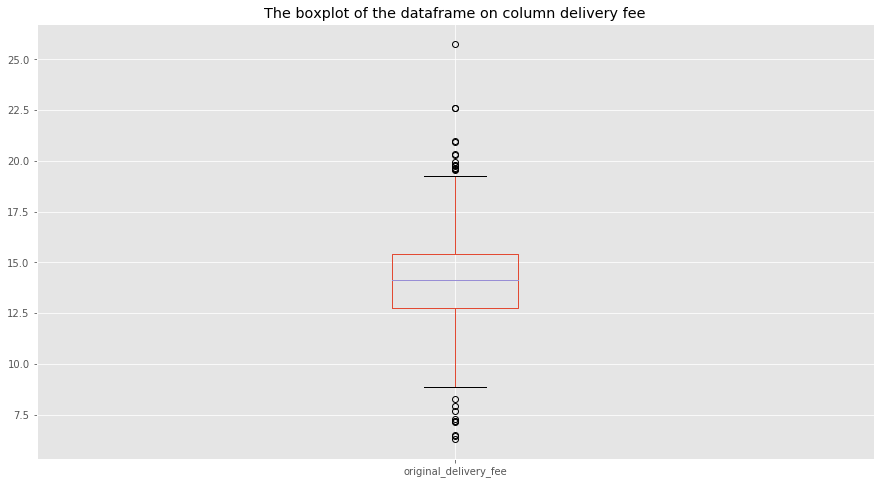

In [110]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("ggplot")

plt.figure()
outlier.boxplot(column='original_delivery_fee')
plt.title("The boxplot of the dataframe on column delivery fee")
plt.show()

Unerstanding of outliers by `branch`

<Figure size 1080x576 with 0 Axes>

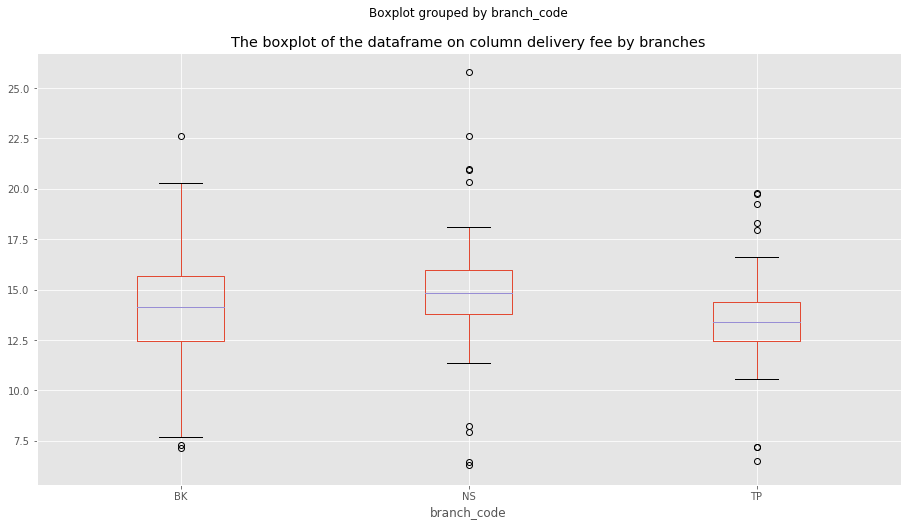

In [111]:
plt.figure()
outlier.boxplot(column='original_delivery_fee', by='branch_code')
plt.title("The boxplot of the dataframe on column delivery fee by branches")
plt.show()

As mentioned in the assignment outline, as it is already known that `original_delivery_fee` has linear relation with some of the features, We use the following plot to assure that it is true that they have relationships.

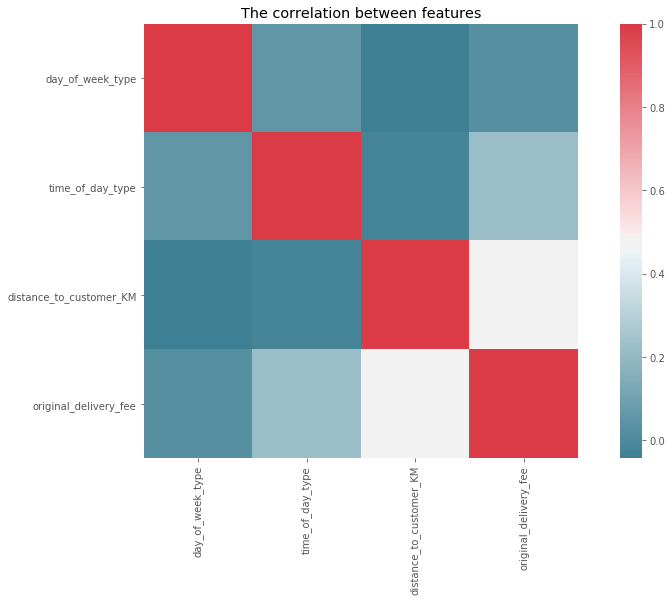

In [112]:
plt.figure()
sns.heatmap(
    outlier.corr(), square=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("The correlation between features")
plt.show()

From above correlation figure, `original_delivery_fee` is related to `day_of_week_type`, `time_of_day_type`, `distance_to_customer_KM`.

### 4.4 Spot and remove outliers
As the dependency of attributes and delivery_fee is different in different `branch`, so we need to analyze the 2 sttributes (`day_of_week_type` and `time_of_day_type`)separately based on its branches.

#### 4.4.1 Weekday morning orders

<Figure size 1080x576 with 0 Axes>

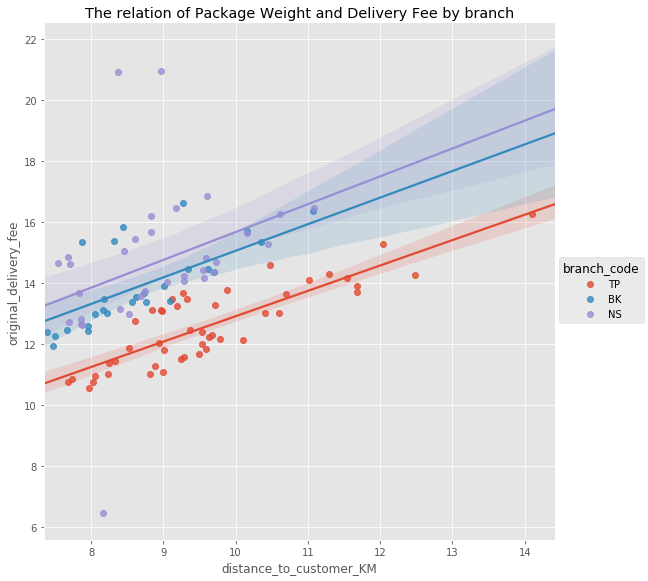

In [113]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 0)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">

Remove outliers related to branch `BK`, `TP` and `NS`.

In [114]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 0) & \
            ((outlier['original_delivery_fee'] > 20) | (outlier['original_delivery_fee'] < 8))]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
184  ORDZ08062 2018-01-19      Friday                 0  11:32:57  Breakfast   
287  ORDI03867 2018-01-31   Wednesday                 0  09:00:50  Breakfast   
420  ORDC00027 2018-01-09     Tuesday                 0  11:12:40  Breakfast   
428  ORDK08879 2018-01-10   Wednesday                 0  09:21:07  Breakfast   

     time_of_day_type branch_code  distance_to_customer_KM  \
184                 0          NS                    8.159   
287                 0          NS                    8.968   
420                 0          NS                    8.380   
428                 0          BK                    7.167   

     original_delivery_fee  
184               6.434634  
287              20.971559  
420              20.911000  
428               7.136560

In [115]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

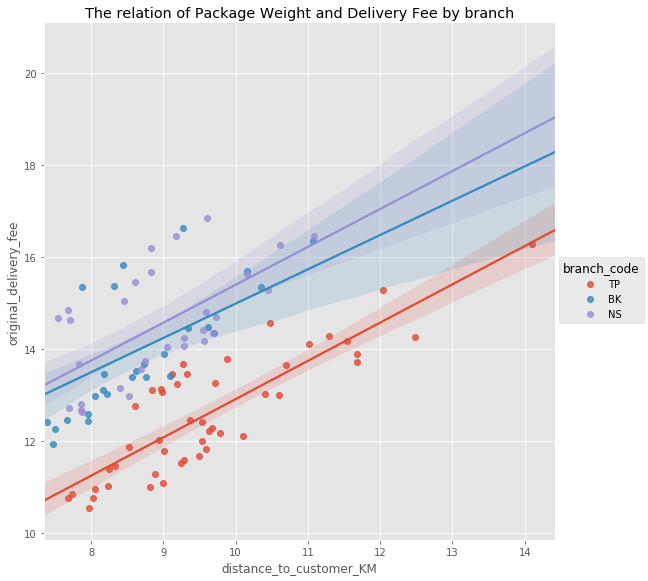

In [116]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 0)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

#### 4.4.2 Weekday afternoon orders

<Figure size 1080x576 with 0 Axes>

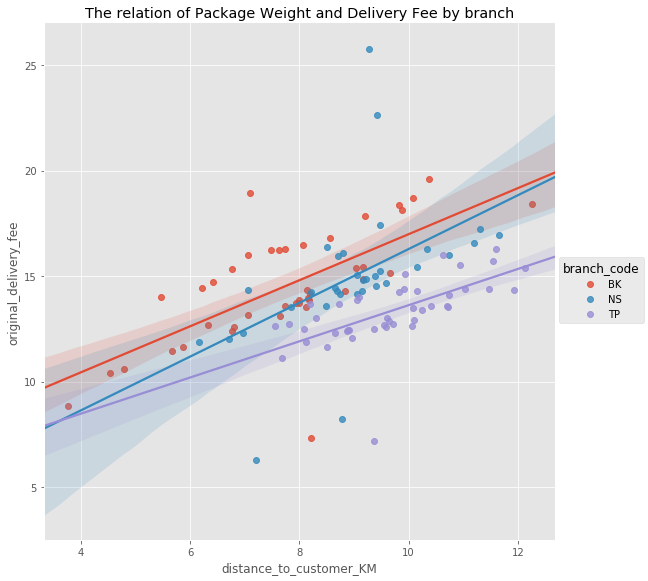

In [117]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 1)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `BK`

In [118]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 1) & \
            (outlier["branch_code"] == 'BK') & (outlier['original_delivery_fee'] < 7.5)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
368  ORDA09421 2018-01-09     Tuesday                 0  15:16:03      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
368                 1          BK                    8.211   

     original_delivery_fee  
368               7.304468

In [119]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

In [120]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 1) & \
            (outlier["branch_code"] == 'BK') & (outlier['original_delivery_fee'] > 17.5) & \
            (outlier['distance_to_customer_KM'] > 6) & (outlier['distance_to_customer_KM'] < 8)]
target

order_id       date day_of_week  day_of_week_type      time order_type  \
279  ORDX00063 2018-01-24   Wednesday                 0  12:43:56      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
279                 1          BK                    7.088   

     original_delivery_fee  
279              18.925226

In [121]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `NS` and `TP`

In [122]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 1) & \
            ((outlier["branch_code"] == 'NS') | (outlier["branch_code"] == 'TP')) & \
            ((outlier['original_delivery_fee'] > 20) | (outlier['original_delivery_fee'] < 10))]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
23   ORDB06462 2018-01-18    Thursday                 0  15:36:20      Lunch   
324  ORDI04327 2018-01-11    Thursday                 0  15:16:03      Lunch   
432  ORDZ05129 2018-01-04    Thursday                 0  15:05:54      Lunch   
441  ORDC06522 2018-01-02     Tuesday                 0  15:05:54      Lunch   
464  ORDI04546 2018-01-29      Monday                 0  15:56:37      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
23                  1          TP                    9.367   
324                 1          NS                    9.271   
432                 1          NS                    8.787   
441                 1          NS                    7.207   
464                 1          NS                    9.413   

     original_delivery_fee  
23                7.172313  
324              25.773034  
432               8.248845  
441               6.295103  
464              22.628743

In [123]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

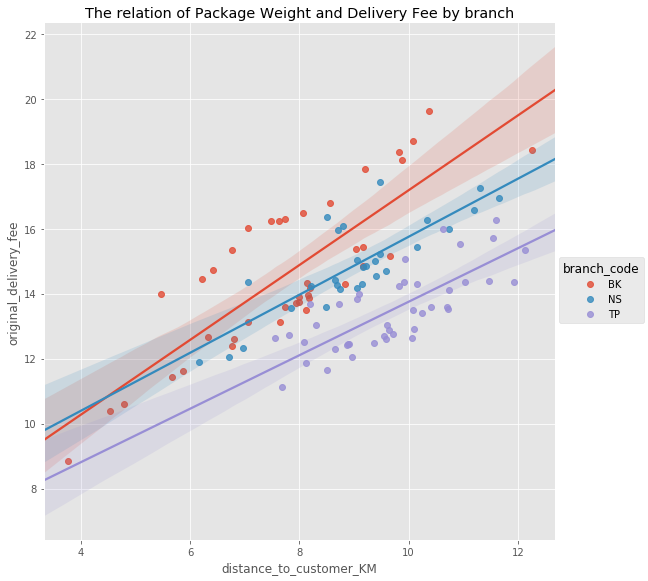

In [124]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 1)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

#### 4.4.3 Weekday evening orders

<Figure size 1080x576 with 0 Axes>

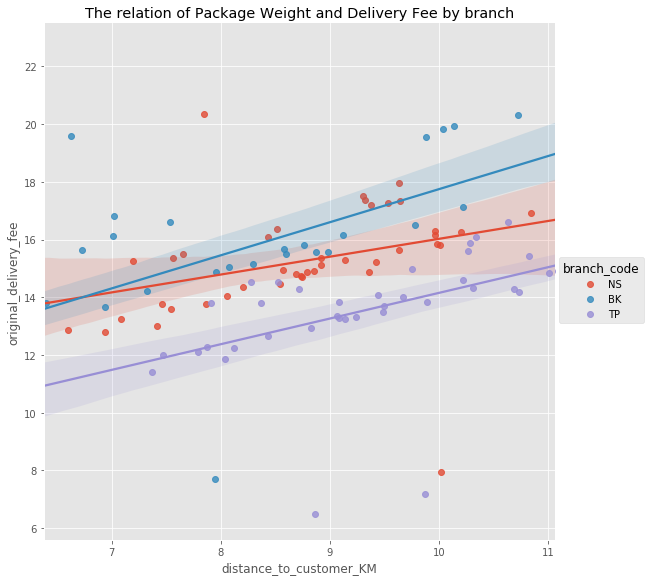

In [125]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">
    
Remove outliers that has the delivery_fee of under `10`.

In [126]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 2) & \
             (outlier['original_delivery_fee'] < 10)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
30   ORDZ09791 2018-01-09     Tuesday                 0  18:18:35     Dinner   
289  ORDJ08951 2018-01-25    Thursday                 0  16:47:19     Dinner   
428  ORDX05638 2018-01-23     Tuesday                 0  17:48:10     Dinner   
444  ORDY01025 2018-01-10   Wednesday                 0  16:16:54     Dinner   

     time_of_day_type branch_code  distance_to_customer_KM  \
30                  2          NS                   10.017   
289                 2          TP                    9.871   
428                 2          BK                    7.946   
444                 2          TP                    8.862   

     original_delivery_fee  
30                7.942161  
289               7.200783  
428               7.695234  
444               6.506790

In [127]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Remove other outliers.

In [128]:
target = outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 2) & \
                    (outlier['distance_to_customer_KM'] < 8) & (outlier['distance_to_customer_KM'] > 6) & \
                    (outlier['original_delivery_fee'] > 18)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
118  ORDK06617 2018-01-30     Tuesday                 0  17:58:18     Dinner   
231  ORDZ08254 2018-01-17   Wednesday                 0  16:37:10     Dinner   

     time_of_day_type branch_code  distance_to_customer_KM  \
118                 2          BK                    6.623   
231                 2          NS                    7.845   

     original_delivery_fee  
118              19.589803  
231              20.355079

In [129]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

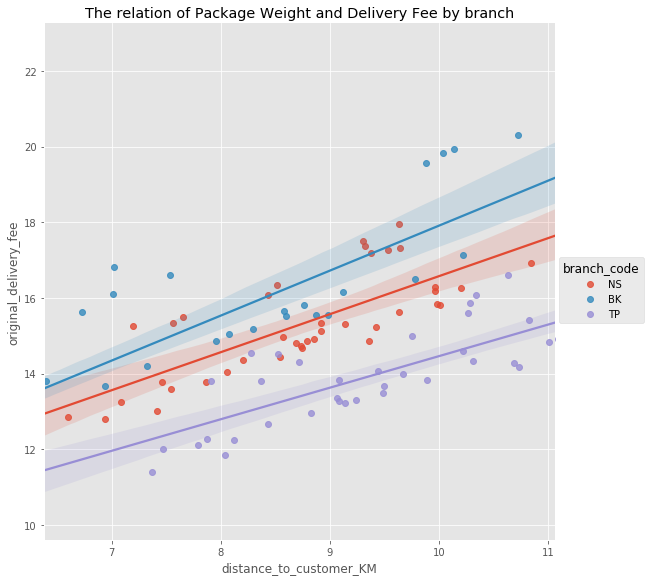

In [130]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 0) & (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

#### 4.4.4 Weekend morning orders

<Figure size 1080x576 with 0 Axes>

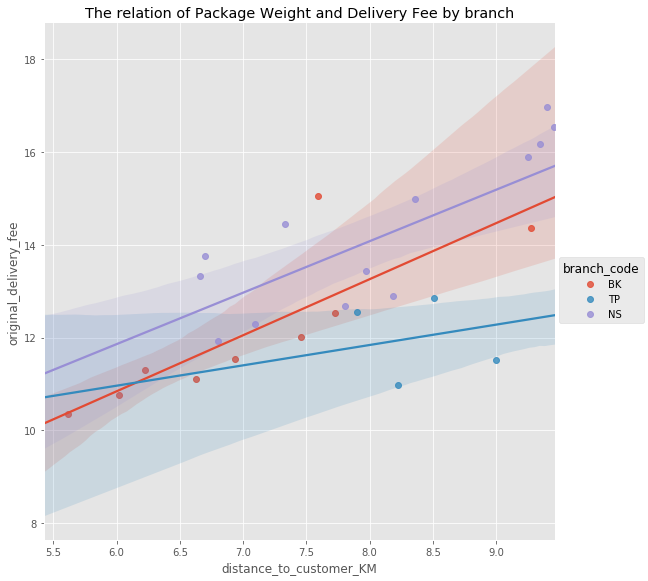

In [131]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 0)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">
    
Remove the outlier that belongs to the branch `BK`.

In [132]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 0) & \
             (outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 15)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
11  ORDK06259 2018-01-21      Sunday                 1  08:30:25  Breakfast   

    time_of_day_type branch_code  distance_to_customer_KM  \
11                 0          BK                    7.591   

    original_delivery_fee  
11              15.058317

In [133]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

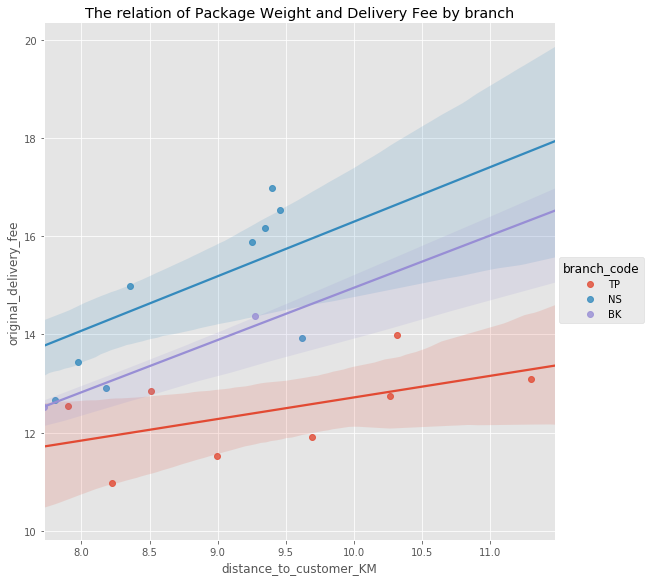

In [134]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 0)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

#### 4.4.5 Weekend afternoon orders

<Figure size 1080x576 with 0 Axes>

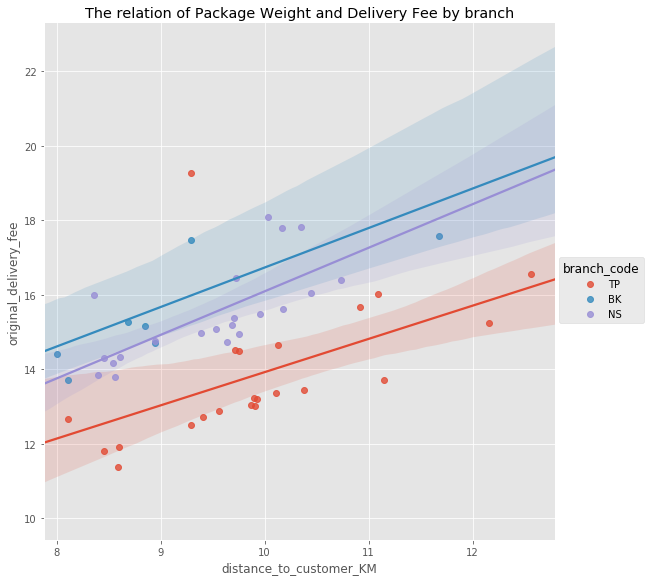

In [135]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `BK`.

In [136]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1) & \
                    (outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 12) & \
                    (outlier['distance_to_customer_KM'] < 5)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
251  ORDX09269 2018-01-20    Saturday                 1  12:33:48      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
251                 1          BK                    4.755   

     original_delivery_fee  
251              12.446186

In [137]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

In [138]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1) & \
                    (outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 18)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
452  ORDK02345 2018-01-28      Sunday                 1  15:56:37      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
452                 1          BK                    7.616   

     original_delivery_fee  
452              19.631568

In [139]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

In [140]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1) & \
                    (outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 17) & \
                    (outlier['distance_to_customer_KM'] > 9) & (outlier['distance_to_customer_KM'] < 10)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
351  ORDX09065 2018-01-14      Sunday                 1  14:25:21      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
351                 1          BK                    9.293   

     original_delivery_fee  
351              17.471669

In [141]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `TP`.

In [142]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1) & \
                    (outlier['branch_code'] == 'TP') & (outlier['original_delivery_fee'] > 18)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
311  ORDY02296 2018-01-07      Sunday                 1  12:03:22      Lunch   

     time_of_day_type branch_code  distance_to_customer_KM  \
311                 1          TP                    9.294   

     original_delivery_fee  
311                19.2638

In [143]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

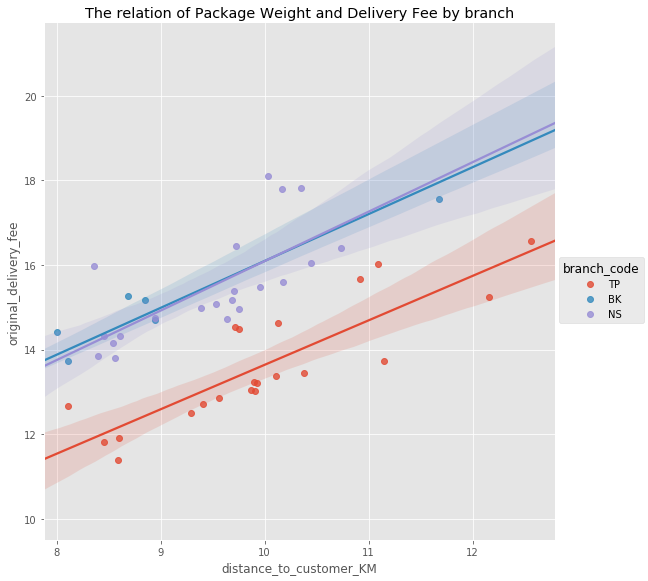

In [144]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 1)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

#### 4.4.6 Weekend evening orders

<Figure size 1080x576 with 0 Axes>

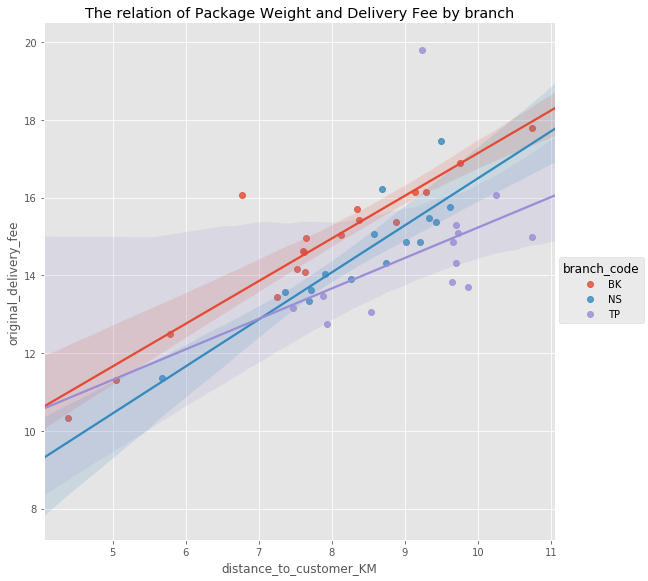

In [145]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `BK`.

In [146]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 2) & \
                    (outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 16) & \
                    (outlier['distance_to_customer_KM'] < 7)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
421  ORDA03756 2018-01-27    Saturday                 1  17:58:18     Dinner   

     time_of_day_type branch_code  distance_to_customer_KM  \
421                 2          BK                    6.776   

     original_delivery_fee  
421              16.054039

In [147]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Remove outliers related to branch `TP`.

In [148]:
target = outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 2) & \
                    (outlier['branch_code'] == 'TP') & (outlier['original_delivery_fee'] > 18)]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
434  ORDY06730 2018-01-21      Sunday                 1  18:38:52     Dinner   

     time_of_day_type branch_code  distance_to_customer_KM  \
434                 2          TP                    9.232   

     original_delivery_fee  
434              19.803392

In [149]:
outlier.drop(target.index, inplace=True)

outlier.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-warning">
    
Check the boxplot to make sure that outliers are removed.

<Figure size 1080x576 with 0 Axes>

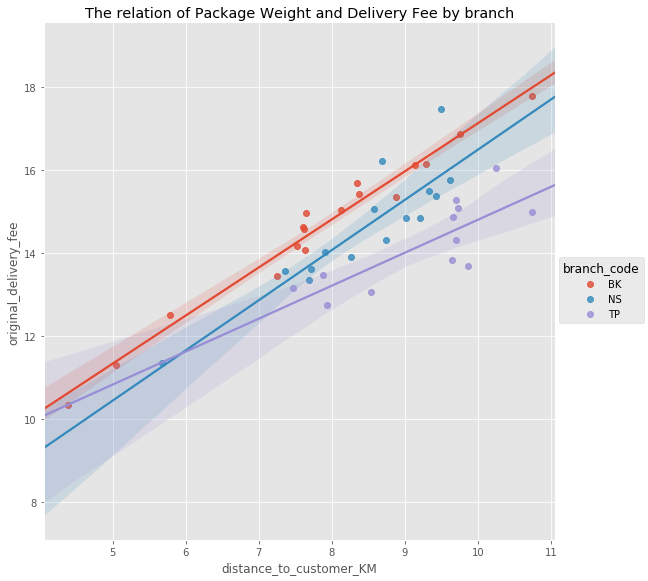

In [151]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["day_of_week_type"] == 1) & (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

### 4.5 Final check on outliers
Final check on the data to see where there are still outliers existing.

<Figure size 1080x576 with 0 Axes>

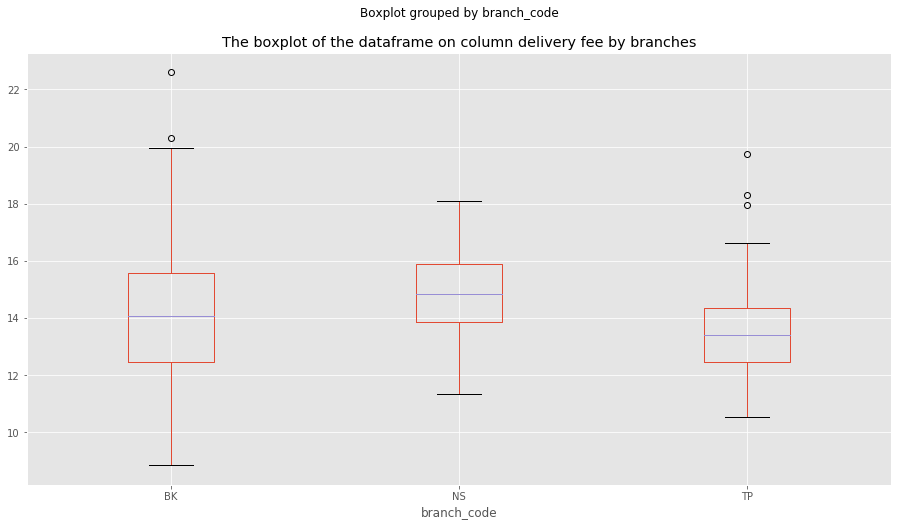

In [152]:
plt.figure()
outlier.boxplot(column='original_delivery_fee', by='branch_code')
plt.title("The boxplot of the dataframe on column delivery fee by branches")
plt.show()

Locate the 5 outliers shown above, we need to inspect these 5 rows to analyze whether we should remove these "apears-to-be" outliers

In [153]:
target = outlier.loc[((outlier['branch_code'] == 'BK') & (outlier['original_delivery_fee'] > 20)) | \
                    ((outlier['branch_code'] == 'TP') & (outlier['original_delivery_fee'] > 17))]

target

order_id       date day_of_week  day_of_week_type      time order_type  \
266  ORDY09380 2018-01-29      Monday                 0  20:00:00     Dinner   
278  ORDB02918 2018-01-12      Friday                 0  12:23:39      Lunch   
307  ORDK09575 2018-01-19      Friday                 0  16:37:10     Dinner   
343  ORDK10010 2018-01-08      Monday                 0  19:19:26     Dinner   
416  ORDJ09932 2018-01-19      Friday                 0  16:37:10     Dinner   

     time_of_day_type branch_code  distance_to_customer_KM  \
266                 2          TP                   13.044   
278                 1          TP                   13.777   
307                 2          BK                   15.186   
343                 2          BK                   10.719   
416                 2          TP                   16.645   

     original_delivery_fee  
266              18.293276  
278              17.954802  
307              22.595931  
343              20.304665  
416              19.739515

For row number `307` and `343`, we inspect with the following plot.

<Figure size 1080x576 with 0 Axes>

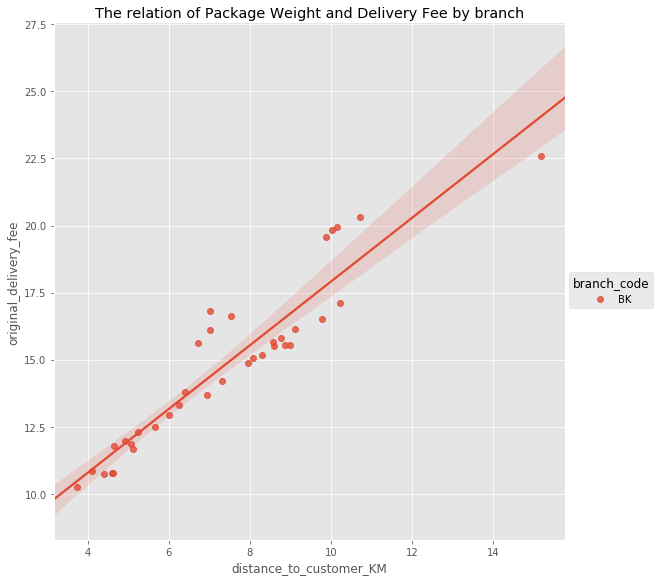

In [155]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["branch_code"] == 'BK') & (outlier["day_of_week_type"] == 0) & \
                     (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

For row number `266` and `416`, we inspect with the following plot.

<Figure size 1080x576 with 0 Axes>

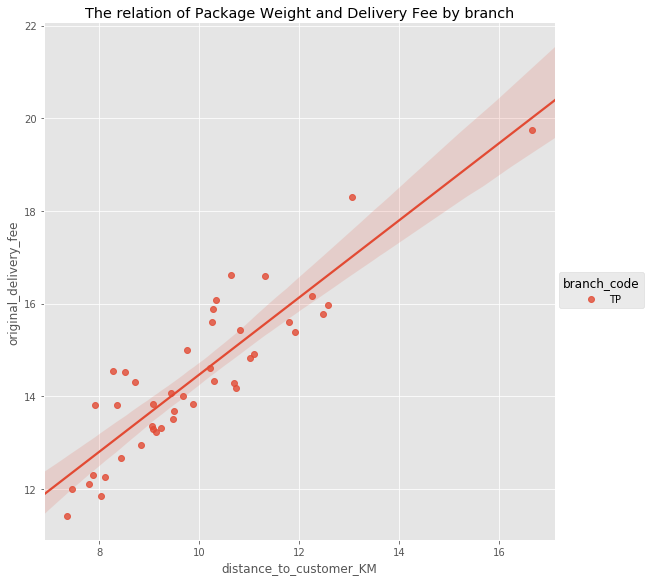

In [157]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["branch_code"] == 'TP') & (outlier["day_of_week_type"] == 0) & \
                     (outlier["time_of_day_type"] == 2)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

For row number `278`, we inspect with the following plot.

<Figure size 1080x576 with 0 Axes>

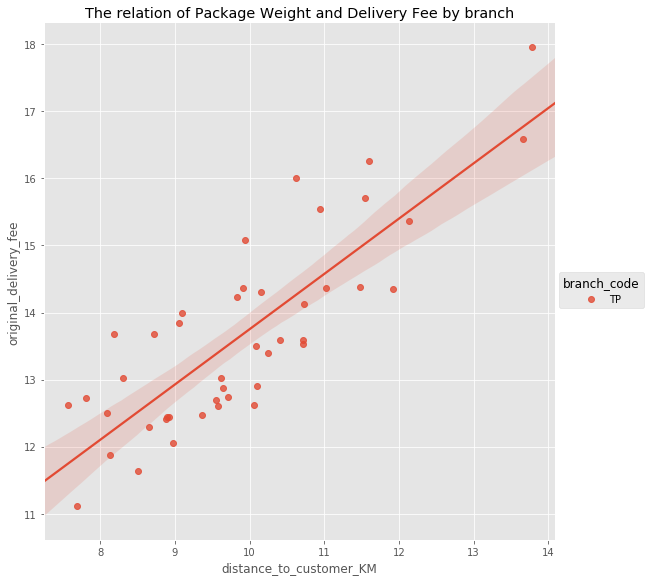

In [159]:
plt.figure()
sns.pairplot(
    x_vars="distance_to_customer_KM",
    y_vars="original_delivery_fee",
    data=outlier.loc[(outlier["branch_code"] == 'TP') & (outlier["day_of_week_type"] == 0) & \
                     (outlier["time_of_day_type"] == 1)],
    hue="branch_code",
    size=8,
    kind="reg")
plt.title("The relation of Package Weight and Delivery Fee by branch")
plt.show()

As a result, it can be seen that those "apears-to-be" outliers do not need to be removed because it fits the linear regression of the result

## 5. Missing values
In this section, the missing values in the dataset will be found and fix.

### 5.1 The basic information of the data

In [264]:
df = pd.read_csv('Group067_missing_data.csv') 
df.shape

(500, 12)

In [265]:
df.head(50)

order_id        date      time order_type branch_code  \
0   ORDB10400  2018-07-16  14:25:21      Lunch         NaN   
1   ORDX10236  2018-11-09  18:18:35     Dinner         NaN   
2   ORDZ02536  2018-04-28  11:53:14  Breakfast          NS   
3   ORDJ08487  2018-01-22  08:40:33  Breakfast          TP   
4   ORDX03714  2018-06-06  13:04:13      Lunch          BK   
5   ORDB08487  2018-12-08  19:19:26     Dinner         NaN   
6   ORDX03277  2018-07-26  14:45:38      Lunch          BK   
7   ORDA07850  2018-05-15  12:23:39      Lunch          BK   
8   ORDZ02254  2018-06-28  13:54:55      Lunch          NS   
9   ORDC08150  2018-02-26  09:51:32  Breakfast          NS   
10  ORDX02438  2018-04-11  11:12:40  Breakfast         NaN   
11  ORDZ07817  2018-09-11  16:16:54     Dinner          NS   
12  ORDI00760  2018-09-03  16:06:45     Dinner         NaN   
13  ORDJ05756  2018-12-30  20:00:00     Dinner          TP   
14  ORDJ04010  2018-12-01  19:09:17     Dinner         NaN   
15  ORDB03846  2018-09-01  16:06:45     Dinner          TP   
16  ORDZ07348  2018-01-07  08:10:08  Breakfast         NaN   
17  ORDK09187  2018-12-07  19:19:26     Dinner          BK   
18  ORDI04951  2018-11-01  18:08:27     Dinner          NS   
19  ORDB07581  2018-10-18  17:38:01     Dinner          TP   
20  ORDJ07613  2018-05-25  12:43:56      Lunch          TP   
21  ORDC05998  2018-11-27  18:59:09     Dinner         NaN   
22  ORDK10410  2018-10-27  17:58:18     Dinner          BK   
23  ORDK01539  2018-06-19  13:34:38      Lunch         NaN   
24  ORDJ10119  2018-03-12  10:11:49  Breakfast          TP   
25  ORDK01380  2018-04-18  11:32:57  Breakfast          BK   
26  ORDJ02072  2018-08-24  15:46:28      Lunch          TP   
27  ORDC01957  2018-05-30  12:54:05      Lunch          NS   
28  ORDZ10503  2018-07-16  14:25:21      Lunch          NS   
29  ORDB06067  2018-06-03  13:04:13      Lunch          TP   
30  ORDB02306  2018-12-08  19:19:26     Dinner          TP   
31  ORDB00210  2018-05-21  12:33:48      Lunch          TP   
32  ORDB06875  2018-11-25  18:49:00     Dinner          TP   
33  ORDY02820  2018-10-05  17:07:36     Dinner          TP   
34  ORDC06488  2018-11-11  18:28:43     Dinner          NS   
35  ORDA01896  2018-07-16  14:25:21      Lunch          BK   
36  ORDX10080  2018-11-11  18:28:43     Dinner          BK   
37  ORDC10338  2018-06-29  13:54:55      Lunch         NaN   
38  ORDC09855  2018-08-16  15:26:11      Lunch          NS   
39  ORDB04968  2018-04-04  11:02:32  Breakfast          TP   
40  ORDA09816  2018-05-11  12:13:31      Lunch          BK   
41  ORDJ04839  2018-10-05  17:07:36     Dinner          TP   
42  ORDY01290  2018-12-24  19:49:51     Dinner          TP   
43  ORDK01090  2018-11-22  18:49:00     Dinner          BK   
44  ORDA09977  2018-12-27  20:00:00     Dinner          BK   
45  ORDB00685  2018-10-23  17:48:10     Dinner          TP   
46  ORDK05774  2018-01-15  08:20:16  Breakfast          BK   
47  ORDB02848  2018-02-07  09:10:59  Breakfast         NaN   
48  ORDX02043  2018-01-12  08:20:16  Breakfast          BK   
49  ORDB06647  2018-11-30  18:59:09     Dinner          TP   

                                          order_items  order_price  \
0        [('Salad', 9), ('Fries', 6), ('Burger', 10)]       536.80   
1   [('Fish&Chips', 4), ('Shrimp', 3), ('Salmon', ...       521.50   
2                      [('Cereal', 2), ('Coffee', 3)]        64.50   
3   [('Cereal', 4), ('Coffee', 6), ('Pancake', 10)...       393.50   
4   [('Fries', 7), ('Chicken', 5), ('Steak', 8), (...       855.40   
5   [('Fish&Chips', 8), ('Pasta', 8), ('Shrimp', 2...       854.00   
6   [('Burger', 2), ('Steak', 3), ('Salad', 6), ('...       604.20   
7   [('Salad', 6), ('Steak', 4), ('Fries', 6), ('B...       665.20   
8   [('Steak', 1), ('Burger', 5), ('Fries', 4), ('...       594.80   
9                    [('Coffee', 8), ('Pancake', 10)]       302.50   
10                    [('Pancake', 6), ('Coffee', 2)]       160.50   
11

In [226]:
#check the sum of the mising values in the dataset
df.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

The result shows that there aree three columns has missing data problem,the numbers of each column shows as below: 
* branch_code:100
* distance_to_customer_KM:50
* deliivery_fee: 50

### 5.2 branch_code

In [227]:
branch_null=df.loc[df.branch_code.isnull()]
branch_null.shape

(100, 12)

Through the analysis in the dirty file, we know the bran_code has strong connection with the order_id, the process already shows in the privouse section, we used the clue directly.The clue has shows as below:

* NS   :                ORDC,ORDI,ORDZ
* TP   :               ORDB,ORDJ,ORDY
* BK   :               ORDX,ORDK,ORDA

#### 5.2.1 NS branch

In [228]:
patten_ns1 =re.compile(r'(ORDC\w{5})')
patten_ns2 =re.compile(r'(ORDI\w{5})')
patten_ns3 =re.compile(r'(ORDZ\w{5})')
branch_ns1=patten_ns1.findall(str(branch_null['order_id']))
branch_ns2=patten_ns2.findall(str(branch_null['order_id']))
branch_ns3=patten_ns3.findall(str(branch_null['order_id']))

using the regular expression to track the order_id for each branch

In [229]:
ns_null=branch_null.loc[(branch_null.order_id.isin(branch_ns1))|(branch_null.order_id.isin(branch_ns2))|(branch_null.order_id.isin(branch_ns3)),['order_id','branch_code']]

Found the null value's index for each branch

In [230]:
df['branch_code'].loc[ns_null.branch_code.index]='NS'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


follow the order_id change the null value to each branch code

In [231]:
df.isnull().sum()
#check the sum of the null values

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                83
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

#### 5.2.2 TP branch

In [232]:
patten_tp1 =re.compile(r'(ORDJ\w{5})')
patten_tp2 =re.compile(r'(ORDB\w{5})')
patten_tp3 =re.compile(r'(ORDY\w{5})')
branch_tp1=patten_tp1.findall(str(branch_null['order_id']))
branch_tp2=patten_tp2.findall(str(branch_null['order_id']))
branch_tp3=patten_tp3.findall(str(branch_null['order_id']))

In [233]:
tp_null=branch_null.loc[branch_null.order_id.isin(branch_tp1)|branch_null.order_id.isin(branch_tp2)|branch_null.order_id.isin(branch_tp3),['order_id','branch_code']]
tp_null

order_id branch_code
0    ORDB10400         NaN
5    ORDB08487         NaN
14   ORDJ04010         NaN
47   ORDB02848         NaN
55   ORDY08651         NaN
64   ORDB07924         NaN
69   ORDB03980         NaN
100  ORDJ10506         NaN
102  ORDB03263         NaN
133  ORDY08436         NaN
373  ORDB05593         NaN
383  ORDJ07284         NaN
386  ORDB01175         NaN
401  ORDJ00630         NaN
404  ORDB04319         NaN

In [234]:
df['branch_code'].loc[tp_null.branch_code.index]='TP'

In [235]:
df.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                68
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

#### 5.2.3 BK branch

In [236]:
patten_bk1 =re.compile(r'(ORDA\w{5})')
patten_bk2 =re.compile(r'(ORDK\w{5})')
patten_bk3 =re.compile(r'(ORDX\w{5})')
branch_bk1=patten_bk1.findall(str(branch_null['order_id']))
branch_bk2=patten_bk2.findall(str(branch_null['order_id']))
branch_bk3=patten_bk3.findall(str(branch_null['order_id']))

In [237]:
bk_null=branch_null.loc[branch_null.order_id.isin(branch_bk1)|branch_null.order_id.isin(branch_bk2)|branch_null.order_id.isin(branch_bk3),['order_id','branch_code']]
bk_null

order_id branch_code
1    ORDX10236         NaN
10   ORDX02438         NaN
23   ORDK01539         NaN
77   ORDK06045         NaN
79   ORDK03170         NaN
84   ORDA02884         NaN
91   ORDK07699         NaN
122  ORDX03611         NaN
128  ORDK05255         NaN
134  ORDK05976         NaN
136  ORDX05071         NaN
355  ORDA08712         NaN
364  ORDX06523         NaN
370  ORDX01859         NaN
384  ORDK03946         NaN
392  ORDK06140         NaN
415  ORDK10478         NaN
421  ORDX04733         NaN
423  ORDA03362         NaN
424  ORDA02597         NaN
426  ORDA10376         NaN
429  ORDK04137         NaN
465  ORDK07991         NaN
469  ORDK07283         NaN
470  ORDA05833         NaN
482  ORDX10192         NaN
487  ORDA04703         NaN
493  ORDA06551         NaN

In [238]:
df['branch_code'].loc[bk_null.branch_code.index]='BK'
df

order_id        date      time order_type branch_code  \
0    ORDB10400  2018-07-16  14:25:21      Lunch          TP   
1    ORDX10236  2018-11-09  18:18:35     Dinner          BK   
2    ORDZ02536  2018-04-28  11:53:14  Breakfast          NS   
3    ORDJ08487  2018-01-22  08:40:33  Breakfast          TP   
4    ORDX03714  2018-06-06  13:04:13      Lunch          BK   
5    ORDB08487  2018-12-08  19:19:26     Dinner          TP   
6    ORDX03277  2018-07-26  14:45:38      Lunch          BK   
7    ORDA07850  2018-05-15  12:23:39      Lunch          BK   
8    ORDZ02254  2018-06-28  13:54:55      Lunch          NS   
9    ORDC08150  2018-02-26  09:51:32  Breakfast          NS   
10   ORDX02438  2018-04-11  11:12:40  Breakfast          BK   
11   ORDZ07817  2018-09-11  16:16:54     Dinner          NS   
12   ORDI00760  2018-09-03  16:06:45     Dinner          NS   
13   ORDJ05756  2018-12-30  20:00:00     Dinner          TP   
14   ORDJ04010  2018-12-01  19:09:17     Dinner          TP   
15   ORDB03846  2018-09-01  16:06:45     Dinner          TP   
16   ORDZ07348  2018-01-07  08:10:08  Breakfast          NS   
17   ORDK09187  2018-12-07  19:19:26     Dinner          BK   
18   ORDI04951  2018-11-01  18:08:27     Dinner          NS   
19   ORDB07581  2018-10-18  17:38:01     Dinner          TP   
20   ORDJ07613  2018-05-25  12:43:56      Lunch          TP   
21   ORDC05998  2018-11-27  18:59:09     Dinner          NS   
22   ORDK10410  2018-10-27  17:58:18     Dinner          BK   
23   ORDK01539  2018-06-19  13:34:38      Lunch          BK   
24   ORDJ10119  2018-03-12  10:11:49  Breakfast          TP   
25   ORDK01380  2018-04-18  11:32:57  Breakfast          BK   
26   ORDJ02072  2018-08-24  15:46:28      Lunch          TP   
27   ORDC01957  2018-05-30  12:54:05      Lunch          NS   
28   ORDZ10503  2018-07-16  14:25:21      Lunch          NS   
29   ORDB06067  2018-06-03  13:04:13      Lunch          TP   
..         ...         ...       ...        ...         ...   
470  ORDA05833  2018-03-10  10:11:49  Breakfast          BK   
471  ORDA10981  2018-08-18  15:36:20      Lunch          BK   
472  ORDA08803  2018-09-05  16:06:45     Dinner          BK   
473  ORDI06509  2018-02-19  09:31:16  Breakfast          NS   
474  ORDI00838  2018-08-29  15:56:37      Lunch          NS   
475  ORDB04383  2018-11-21  18:49:00     Dinner          TP   
476  ORDY01106  2018-03-14  10:21:58  Breakfast          TP   
477  ORDZ03060  2018-06-04  13:04:13      Lunch          NS   
478  ORDI09149  2018-10-07  17:17:44     Dinner          NS   
479  ORDI04409  2018-08-08  15:16:03      Lunch          NS   
480  ORDA05059  2018-07-16  14:25:21      Lunch          BK   
481  ORDA05485  2018-11-04  18:08:27     Dinner          BK   
482  ORDX10192  2018-03-09  10:11:49  Breakfast          BK   
483  ORDZ02474  2018-03-28  10:52:23  Breakfast          NS   
484  ORDC09569  2018-10-08  17:17:44     Dinner          NS   
485  ORDI03827  2018-09-11  16:27:02     Dinner          NS   
486  ORDB04048  2018-07-03  14:05:04      Lunch          TP   
487  ORDA04703  2018-03-26  10:42:15  Breakfast          BK   
488  ORDZ07024  2018-10-12  17:27:53     Dinner          NS   
489  ORDK10662  2018-01-24  08:40:33  Breakfast          BK   
490  ORDJ02536  2018-07-27  14:45:38      Lunch          TP   
491  ORDK10783  2018-08-30  15:56:37      Lunch          BK   
492  ORDX00015  2018-10-01  16:57:27     Dinner          BK   
493  ORDA06551  2018-09-12  16:27:02     Dinner          BK   
494  ORDJ04684  2018-08-23  15:46:28      Lunch          TP   
495  ORDI02953  2018-07-02  13:54:55      Lunch          NS   
496  ORDC04894  2018-03-23  10:42:15  Breakfast          NS   
497  ORDC06871  2018-10-12  17:27:53     Dinner          NS   
498  ORDC04815  2018-07-25  14:45:38      Lunch          NS   
499  ORDK10724  2018-03-03  10:01:41  Breakfast          BK   

                                           order_items  order_price  \
0         [('Salad', 9), ('F

In [239]:
df.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                40
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

### 5.3 delivery_fee
The sepcial requirement for deliver_fee is the different price between normal customer and loyalty customer.For this reason, the first step is to sepread these two kinds of customers.

In [266]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.linalg import solve
from datetime import datetime
from datetime import timedelta

In [267]:
df.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

In [268]:
df

order_id        date      time order_type branch_code  \
0    ORDB10400  2018-07-16  14:25:21      Lunch         NaN   
1    ORDX10236  2018-11-09  18:18:35     Dinner         NaN   
2    ORDZ02536  2018-04-28  11:53:14  Breakfast          NS   
3    ORDJ08487  2018-01-22  08:40:33  Breakfast          TP   
4    ORDX03714  2018-06-06  13:04:13      Lunch          BK   
5    ORDB08487  2018-12-08  19:19:26     Dinner         NaN   
6    ORDX03277  2018-07-26  14:45:38      Lunch          BK   
7    ORDA07850  2018-05-15  12:23:39      Lunch          BK   
8    ORDZ02254  2018-06-28  13:54:55      Lunch          NS   
9    ORDC08150  2018-02-26  09:51:32  Breakfast          NS   
10   ORDX02438  2018-04-11  11:12:40  Breakfast         NaN   
11   ORDZ07817  2018-09-11  16:16:54     Dinner          NS   
12   ORDI00760  2018-09-03  16:06:45     Dinner         NaN   
13   ORDJ05756  2018-12-30  20:00:00     Dinner          TP   
14   ORDJ04010  2018-12-01  19:09:17     Dinner         NaN   
15   ORDB03846  2018-09-01  16:06:45     Dinner          TP   
16   ORDZ07348  2018-01-07  08:10:08  Breakfast         NaN   
17   ORDK09187  2018-12-07  19:19:26     Dinner          BK   
18   ORDI04951  2018-11-01  18:08:27     Dinner          NS   
19   ORDB07581  2018-10-18  17:38:01     Dinner          TP   
20   ORDJ07613  2018-05-25  12:43:56      Lunch          TP   
21   ORDC05998  2018-11-27  18:59:09     Dinner         NaN   
22   ORDK10410  2018-10-27  17:58:18     Dinner          BK   
23   ORDK01539  2018-06-19  13:34:38      Lunch         NaN   
24   ORDJ10119  2018-03-12  10:11:49  Breakfast          TP   
25   ORDK01380  2018-04-18  11:32:57  Breakfast          BK   
26   ORDJ02072  2018-08-24  15:46:28      Lunch          TP   
27   ORDC01957  2018-05-30  12:54:05      Lunch          NS   
28   ORDZ10503  2018-07-16  14:25:21      Lunch          NS   
29   ORDB06067  2018-06-03  13:04:13      Lunch          TP   
..         ...         ...       ...        ...         ...   
470  ORDA05833  2018-03-10  10:11:49  Breakfast         NaN   
471  ORDA10981  2018-08-18  15:36:20      Lunch          BK   
472  ORDA08803  2018-09-05  16:06:45     Dinner          BK   
473  ORDI06509  2018-02-19  09:31:16  Breakfast          NS   
474  ORDI00838  2018-08-29  15:56:37      Lunch         NaN   
475  ORDB04383  2018-11-21  18:49:00     Dinner          TP   
476  ORDY01106  2018-03-14  10:21:58  Breakfast          TP   
477  ORDZ03060  2018-06-04  13:04:13      Lunch          NS   
478  ORDI09149  2018-10-07  17:17:44     Dinner          NS   
479  ORDI04409  2018-08-08  15:16:03      Lunch          NS   
480  ORDA05059  2018-07-16  14:25:21      Lunch          BK   
481  ORDA05485  2018-11-04  18:08:27     Dinner          BK   
482  ORDX10192  2018-03-09  10:11:49  Breakfast         NaN   
483  ORDZ02474  2018-03-28  10:52:23  Breakfast          NS   
484  ORDC09569  2018-10-08  17:17:44     Dinner          NS   
485  ORDI03827  2018-09-11  16:27:02     Dinner          NS   
486  ORDB04048  2018-07-03  14:05:04      Lunch          TP   
487  ORDA04703  2018-03-26  10:42:15  Breakfast         NaN   
488  ORDZ07024  2018-10-12  17:27:53     Dinner         NaN   
489  ORDK10662  2018-01-24  08:40:33  Breakfast          BK   
490  ORDJ02536  2018-07-27  14:45:38      Lunch          TP   
491  ORDK10783  2018-08-30  15:56:37      Lunch          BK   
492  ORDX00015  2018-10-01  16:57:27     Dinner          BK   
493  ORDA06551  2018-09-12  16:27:02     Dinner         NaN   
494  ORDJ04684  2018-08-23  15:46:28      Lunch          TP   
495  ORDI02953  2018-07-02  13:54:55      Lunch          NS   
496  ORDC04894  2018-03-23  10:42:15  Breakfast          NS   
497  ORDC06871  2018-10-12  17:27:53     Dinner          NS   
498  ORDC04815  2018-07-25  14:45:38      Lunch          NS   
499  ORDK10724  2018-03-03  10:01:41  Breakfast          BK   

                                           order_items  order_price  \
0         [('Salad', 9), ('F

In [269]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%M-%d')

In [270]:
df.dtypes

order_id                           object
date                       datetime64[ns]
time                               object
order_type                         object
branch_code                        object
order_items                        object
order_price                       float64
customer_lat                      float64
customer_lon                      float64
customerHasloyalty?                 int64
distance_to_customer_KM           float64
delivery_fee                      float64
dtype: object

In [271]:
df['day_of_week'] = df['date'].dt.weekday_name
df['date'] = pd.to_datetime(df['date']).dt.normalize()

In [272]:
def weekend_weekdays_function(day_of_week):
    if day_of_week in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 0
    else:
        return 1

In [273]:
df["day_of_week_type"] = df["day_of_week"].apply(weekend_weekdays_function)

Add the time of the day class value to the data.

In [274]:
def time_class_function(order_type):
    if order_type == 'Breakfast':
        return 0
    elif order_type == 'Lunch':
        return 1
    else:
        return 2

In [275]:
df["time_of_day_type"] = df["order_type"].apply(time_class_function)

Multiply the delivery fee by 2 if the order is made with a loyalty card.

In [276]:
def multiply_member(delivery_fee):
    return 2 * delivery_fee

df.loc[(df["customerHasloyalty?"] == 1) & \
       ~(df["delivery_fee"].isnull()), "delivery_fee"] = df.loc[(df["customerHasloyalty?"] == 1) & \
                                                                ~(df["delivery_fee"].isnull()), "delivery_fee"].apply(multiply_member)


In [277]:
df.head(10)

order_id       date      time order_type branch_code  \
0  ORDB10400 2018-01-16  14:25:21      Lunch         NaN   
1  ORDX10236 2018-01-09  18:18:35     Dinner         NaN   
2  ORDZ02536 2018-01-28  11:53:14  Breakfast          NS   
3  ORDJ08487 2018-01-22  08:40:33  Breakfast          TP   
4  ORDX03714 2018-01-06  13:04:13      Lunch          BK   
5  ORDB08487 2018-01-08  19:19:26     Dinner         NaN   
6  ORDX03277 2018-01-26  14:45:38      Lunch          BK   
7  ORDA07850 2018-01-15  12:23:39      Lunch          BK   
8  ORDZ02254 2018-01-28  13:54:55      Lunch          NS   
9  ORDC08150 2018-01-26  09:51:32  Breakfast          NS   

                                         order_items  order_price  \
0       [('Salad', 9), ('Fries', 6), ('Burger', 10)]        536.8   
1  [('Fish&Chips', 4), ('Shrimp', 3), ('Salmon', ...        521.5   
2                     [('Cereal', 2), ('Coffee', 3)]         64.5   
3  [('Cereal', 4), ('Coffee', 6), ('Pancake', 10)...        393.5   
4  [('Fries', 7), ('Chicken', 5), ('Steak', 8), (...        855.4   
5  [('Fish&Chips', 8), ('Pasta', 8), ('Shrimp', 2...        854.0   
6  [('Burger', 2), ('Steak', 3), ('Salad', 6), ('...        604.2   
7  [('Salad', 6), ('Steak', 4), ('Fries', 6), ('B...        665.2   
8  [('Steak', 1), ('Burger', 5), ('Fries', 4), ('...        594.8   
9                   [('Coffee', 8), ('Pancake', 10)]        302.5   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.814308    144.943170                    0                    9.822   
1    -37.819312    145.006512                    0                      NaN   
2    -37.802099    144.959614                    0                    7.255   
3    -37.814952    144.957484                    0                    8.294   
4    -37.821364    144.962839                    0                    8.176   
5    -37.818288    144.966146                    0                    7.704   
6    -37.799960    144.968097                    0                    7.767   
7    -37.818804    144.962375                    0                    7.899   
8    -37.811940    144.956533                    0                    8.123   
9    -37.814820    144.959212                    0                    5.692   

   delivery_fee day_of_week  day_of_week_type  time_of_day_type  
0     12.986318     Tuesday                 0                 1  
1     10.730398     Tuesday                 0                 2  
2     14.084923      Sunday                 1                 0  
3           NaN      Monday                 0                 0  
4     14.200826    Saturday                 1                 1  
5     13.454620      Monday                 0                 2  
6     13.488260      Friday                 0                 1  
7     13.426768      Monday                 0                 1  
8     13.797914      Sunday                 1                 1  
9     10.765529      Friday                 0                 0

#### 5.3.1 Restaurant TP

<div class="alert alert-block alert-warning">

**`AS my teammate does not complete inputting missing values for distance, to avoid null values in the columns of distance_to_customer_KM, in the following block I did not select rows which has NULL as the value of distance_to_customer_KM. This may cause the linear regression model to be less accurate`**

In [278]:
null_delivery_fee = df.loc[(df["branch_code"] == 'TP') & (df["delivery_fee"].isnull())]
not_null_fee = df.loc[(df["branch_code"] == 'TP') & ~(df["delivery_fee"].isnull()) & ~(df["distance_to_customer_KM"].isnull())]


In [279]:
# Find the most suitable model.
def test_model(data):
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    
    # Generate training and test sets using system functions
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
    reg_dict = {}
    
    # Test data regression model in different degrees
    for i in range(1, 6):
        reg = LinearRegression()
        pol = PolynomialFeatures(degree=i)
        
        # Trasform to polynomial
        X_train_pol = pol.fit_transform(X_train)
        X_test_pol = pol.transform(X_test)
        
        # Training
        reg.fit(X_train_pol, Y_train)
        
        # predicting
        Y_pred = reg.predict(X_test_pol)
        
        # Compute and print R^2 and MSE
        print("----------------")
        print("Model ", i)
        print("R squared value is: ", reg.score(X_test_pol, Y_test))
        mse = mean_squared_error(Y_test, Y_pred)
        print("Mean Squared Error is: ", mse)

In [280]:
test_model(not_null_fee)

----------------
Model  1
R squared value is:  0.8319271160064111
Mean Squared Error is:  0.4149794354207519
----------------
Model  2
R squared value is:  0.8303429166315511
Mean Squared Error is:  0.41889089422691084
----------------
Model  3
R squared value is:  0.8188744333875724
Mean Squared Error is:  0.4472070900857279
----------------
Model  4
R squared value is:  0.8040158059267659
Mean Squared Error is:  0.4838937029902104
----------------
Model  5
R squared value is:  0.6092176539659666
Mean Squared Error is:  0.964859015186447


- build the linear regression model

In [281]:
# Build the regression model for missing imputation
def build_model(data):
    # Create dataset
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    reg = LinearRegression()
    reg.fit(X, Y)
    return reg

- Display all the coeffficients.

In [282]:
reg = build_model(not_null_fee)
print(
    dict(
        zip([
            "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
        ], reg.coef_)))
print(reg.intercept_)

{'day_of_week_type': -0.01746099490486736, 'time_of_day_type': 0.8456168660603199, 'distance_to_customer_KM': 0.7763550309707068}
5.096828132550332


- Input values using the data model to all missing values belongs to restaurant TP.

In [283]:
df.loc[(df["branch_code"] == 'TP') & (df["delivery_fee"].isnull()), "delivery_fee"] = reg.predict(
    df.loc[(df["branch_code"] == 'TP') & df["delivery_fee"].isnull(), [
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values)

#### 5.3.2 Restaurant NS

In [286]:
null_delivery_fee = df.loc[(df["branch_code"] == 'NS') & (df["delivery_fee"].isnull())]
not_null_fee = df.loc[(df["branch_code"] == 'NS') & ~(df["delivery_fee"].isnull()) & ~(df["distance_to_customer_KM"].isnull())]


In [287]:
# Find the most suitable model.
def test_model_NS(data):
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    
    # Generate training and test sets using system functions
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
    reg_dict = {}
    
    # Test data regression model in different degrees
    for i in range(1, 6):
        reg = LinearRegression()
        pol = PolynomialFeatures(degree=i)
        
        # Trasform to polynomial
        X_train_pol = pol.fit_transform(X_train)
        X_test_pol = pol.transform(X_test)
        
        # Training
        reg.fit(X_train_pol, Y_train)
        
        # predicting
        Y_pred = reg.predict(X_test_pol)
        
        # Compute and print R^2 and MSE
        print("----------------")
        print("Model ", i)
        print("R squared value is: ", reg.score(X_test_pol, Y_test))
        mse = mean_squared_error(Y_test, Y_pred)
        print("Mean Squared Error is: ", mse)

In [288]:
test_model_NS(not_null_fee)

----------------
Model  1
R squared value is:  0.6986474933604997
Mean Squared Error is:  0.9545989384290952
----------------
Model  2
R squared value is:  0.6605093562821721
Mean Squared Error is:  1.075409697810589
----------------
Model  3
R squared value is:  0.5183389738407626
Mean Squared Error is:  1.525764989916989
----------------
Model  4
R squared value is:  -1.096027379186081
Mean Squared Error is:  6.6396179457797935
----------------
Model  5
R squared value is:  -11.386712784407477
Mean Squared Error is:  39.2375792936961


- build the linear regression model

In [289]:
# Build the regression model for missing imputation
def build_model_NS(data):
    # Create dataset
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    reg = LinearRegression()
    reg.fit(X, Y)
    return reg

- Display all the coeffficients.

In [290]:
reg = build_model_NS(not_null_fee)
print(
    dict(
        zip([
            "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
        ], reg.coef_)))
print(reg.intercept_)

{'day_of_week_type': 0.3427309722409283, 'time_of_day_type': 0.36906935754913106, 'distance_to_customer_KM': 1.0151834803372006}
5.4458260133756


- Input values using the data model to all missing values belongs to restaurant NS.

In [292]:
df.loc[(df["branch_code"] == 'NS') & (df["delivery_fee"].isnull()), "delivery_fee"] = reg.predict(
    df.loc[(df["branch_code"] == 'NS') & df["delivery_fee"].isnull(), [
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values)

#### 5.3.2 Restaurant BK

In [293]:
null_delivery_fee = df.loc[(df["branch_code"] == 'BK') & (df["delivery_fee"].isnull())]
not_null_fee = df.loc[(df["branch_code"] == 'BK') & ~(df["delivery_fee"].isnull()) & ~(df["distance_to_customer_KM"].isnull())]


In [294]:
# Find the most suitable model.
def test_model_BK(data):
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    
    # Generate training and test sets using system functions
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
    reg_dict = {}
    
    # Test data regression model in different degrees
    for i in range(1, 6):
        reg = LinearRegression()
        pol = PolynomialFeatures(degree=i)
        
        # Trasform to polynomial
        X_train_pol = pol.fit_transform(X_train)
        X_test_pol = pol.transform(X_test)
        
        # Training
        reg.fit(X_train_pol, Y_train)
        
        # predicting
        Y_pred = reg.predict(X_test_pol)
        
        # Compute and print R^2 and MSE
        print("----------------")
        print("Model ", i)
        print("R squared value is: ", reg.score(X_test_pol, Y_test))
        mse = mean_squared_error(Y_test, Y_pred)
        print("Mean Squared Error is: ", mse)

In [295]:
test_model_BK(not_null_fee)

----------------
Model  1
R squared value is:  0.7529253422437273
Mean Squared Error is:  1.3939732613850173
----------------
Model  2
R squared value is:  0.7246330240991027
Mean Squared Error is:  1.5535960060013796
----------------
Model  3
R squared value is:  0.6929176506136371
Mean Squared Error is:  1.732531324641747
----------------
Model  4
R squared value is:  0.4510801685731221
Mean Squared Error is:  3.096956906069467
----------------
Model  5
R squared value is:  -1.7931865415282917
Mean Squared Error is:  15.758910235107182


- build the linear regression model

In [296]:
# Build the regression model for missing imputation
def build_model_BK(data):
    # Create dataset
    X = data[[
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values
    Y = data["delivery_fee"].values
    reg = LinearRegression()
    reg.fit(X, Y)
    return reg

- Display all the coeffficients.

In [297]:
reg = build_model_BK(not_null_fee)
print(
    dict(
        zip([
            "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
        ], reg.coef_)))
print(reg.intercept_)

{'day_of_week_type': 0.046935881859780655, 'time_of_day_type': 1.1506599927069983, 'distance_to_customer_KM': 1.1269575684065383}
4.279345266769388


- Input values using the data model to all missing values belongs to restaurant NS.

In [298]:
df.loc[(df["branch_code"] == 'BK') & (df["delivery_fee"].isnull()), "delivery_fee"] = reg.predict(
    df.loc[(df["branch_code"] == 'BK') & df["delivery_fee"].isnull(), [
        "day_of_week_type", "time_of_day_type", "distance_to_customer_KM"
    ]].values)

In [299]:
df.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                 0
day_of_week                  0
day_of_week_type             0
time_of_day_type             0
dtype: int64